<a href="https://colab.research.google.com/github/gringonivoli/diplo2020-mentoria-prediccion-lluvias-extremas/blob/master/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mentoría "Predicción de lluvias extremas"

# TP 2: Análisis y Curación de Datos

In [2]:
!pip install hydrostats
!pip install pandas plotnine
!pip install bias-correction
!pip install tzlocal
!pip install plotnine

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import pylab as py 
import hydrostats as hs
import seaborn as sns
from scipy import stats
import datetime 
from plotnine import *
import tzlocal  
from bias_correction import BiasCorrection


Datos = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2020_Mentoria_LluviasExtremas/master/dataset/datos_diarios_cordoba.csv", parse_dates = True, index_col="fecha")
id_Datos = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2020_Mentoria_LluviasExtremas/master/dataset/metadatos_estaciones.csv")


  Created wheel for hydrostats: filename=hydrostats-0.78-cp36-none-any.whl size=33263 sha256=486095625ae3e5621df19783ae283683cc5e82f42eabb839c654dae9eca7a783
  Stored in directory: /root/.cache/pip/wheels/cd/4a/fc/a9aca96879ae374d7816db96e72b6bf5d0ac88d064f362064f
  Created wheel for HydroErr: filename=HydroErr-1.24-cp36-none-any.whl size=20206 sha256=42b112e1c3dd7bd0e1f35b9e8b2d7999cf11467d718f2fdbc0f660d5778acd85
  Stored in directory: /root/.cache/pip/wheels/b0/6a/72/a08200d2b6d8453d4021a86d8d6e49c0b1c72ed023127789a2
Successfully built hydrostats HydroErr


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Filtrar estaciones de la cuenca del Carcaraña
nombre = ['Pilar Obs.', 'Rio Cuarto Aero', 'Marcos Juarez INTA', 'La Florida']
stations_filtered = id_Datos[id_Datos.nombre.isin(nombre)].loc[:, ('omm_id', 'nombre')]
omm_id = stations_filtered.omm_id.unique()

## CONSIGNA TP2:

En este TP, nos enfocaremos en la cuenca del río Carcarañá. Por lo tanto, las estaciones que utilizaremos del dataset anterior son las siguientes:
- Pilar
- Rio Cuarto
- Marcos Juarez
- La Florida
- Pueblo Andino
En todos los casos, considerar el año hidrológico como del 1/julio al 30/junio.


## 1. Análisis y curación de datos de una API - formato JSON

Referencias: https://darksky.net/dev/docs

  1. Extraer los datos para las coordenadas de las estaciones antes indicadas.
  2. ¿Cuántos años de datos hay?
  3. ¿Existen valores faltantes? Cuantificarlos.
  3. Generar un nuevo dataset a partir de los datos (time, summary, precipAccumulation, temperature, humidity, pressure, windSpeed, uvIndex, temperatureMin, temperatureMax.
  4. Hacer las conversiones de unidades necesarias a estos datos para poder compararlos con el dataset "datos_diarios_cordoba.csv".
  5. Comparar los estadísticos de estos datasets con los de cada estación.


## 2. Análisis y curación de datos de un Excel y un TXT

Referencias TerraClimate: http://www.climatologylab.org/terraclimate.html

  1. Leer los datos de "TerraClimate.csv" y determinar para cada variable los valores promedios anuales (correspondiente a cada año hidrológico).
  2. Hacer las conversiones de unidades necesarias para poder compararlos con cada estación.
  3. Determinar para las estaciones de la cuenca del Carcarañá, los valores promedios anuales (año hidrológico) y comparar los estadísticos de este dataset con los de "datos_diarios_cordoba.csv".
  4. Utilizar el dataset de TerraClimate para rellenar los datos faltantes en "datos_diarios_cordoba.csv" y guardar como un dataset nuevo. Hacer esto para todas las variables salvo para lluvia.
  5. Agregar las demás variables del dataset de TerraClimate al creado en el punto 4. 


## 3. Análisis y curación de datos de un Excel y un TXT

Referencias CHIRPS: https://disasters.nasa.gov/instruments/imerg

  1. En cada año hidrológico, leer los datos de "CHIRPS.txt" y determinar la Precipitaciones Máximas Diarias Anuales (PMDA) y las Precipitaciones Totales Anuales para cada estación.
  2. Graficar y comparar los estadísticos de estos datasets con los de cada estación (dataset "datos_diarios_cordoba.csv").
  3. ¿Es posible rellenar la serie del dataset "datos_diarios_cordoba.csv"?
  4. Agregar los nuevos features al dataset creado en el punto 5 de la parte 2 y exportar el dataset nuevo en formato csv.
  5. A partir del dataset del punto 4, elaborar matrices de correlación entre las diferentes variables y las series de Precipitaciones Máximas Diarias Anuales (PMDA) para cada estación.


## 4. Análisis y curación de Índices Climáticos en Excel

Referencias: https://psl.noaa.gov/data/climateindices/list/

  1. Leer el archivo "indices_clim.xlsx" y evaluar la cantidad de valores faltantes.
  2. Convertir los datos faltantes en NaN.
  3. Hacer matrices de correlación entre los diferentes índices climáticos y las series de Precipitaciones Máximas Diarias Anuales (PMDA) en las diferentes estaciones. Hacer esto para cada año hidrológico.
  4. Repetir lo mismo para la serie de caudales máximos diarios anuales (QMDA) en Pueblo Andino.

## Ayuda Parte 1

In [ ]:
#import datetime 
import requests
import time
import pandas as pd
import numpy as np

In [ ]:
baseUrl = "https://api.darksky.net/forecast/<key>/<longitude>,<latitude>,<date>?exclude=flags,hourly&units=si"

In [ ]:
#Tiempo en formato UNIX, cuenta los segundos desde el 1ro de Enero del 1970 en GMT
#Las coordenadas actuales son las de Marcos Juarez
replacedUrl = baseUrl.replace("<key>", "9349598e9f11f5eddceb6791daa6d787").replace("<longitude>", "-64.533333").replace("<latitude>", "-32.066667").replace("<date>", "1551818800")


In [ ]:
r = requests.get(replacedUrl)

In [ ]:
# Leer json 
# data = pd.read_json(replacedUrl)
data = r.json()

In [ ]:
data

{'currently': {'apparentTemperature': -3.99,
  'cloudCover': 1,
  'dewPoint': -0.68,
  'humidity': 0.88,
  'icon': 'cloudy',
  'ozone': 258.7,
  'precipIntensity': 0,
  'precipProbability': 0,
  'pressure': 993.3,
  'summary': 'Overcast',
  'temperature': 1.06,
  'time': 1551818800,
  'uvIndex': 0,
  'visibility': 16.093,
  'windBearing': 331,
  'windGust': 7.01,
  'windSpeed': 5.77},
 'daily': {'data': [{'apparentTemperatureHigh': -3.99,
    'apparentTemperatureHighTime': 1551819180,
    'apparentTemperatureLow': -6.4,
    'apparentTemperatureLowTime': 1551857040,
    'apparentTemperatureMax': -3.99,
    'apparentTemperatureMaxTime': 1551819180,
    'apparentTemperatureMin': -5.92,
    'apparentTemperatureMinTime': 1551783840,
    'cloudCover': 1,
    'dewPoint': -1.97,
    'humidity': 0.82,
    'icon': 'rain',
    'moonPhase': 0.98,
    'ozone': 258.9,
    'precipIntensity': 0.1021,
    'precipIntensityMax': 0.9933,
    'precipIntensityMaxTime': 1551831480,
    'precipProbability': 0

## 1.1 1.	Extraer los datos para las coordenadas de las estaciones antes indicadas.

In [ ]:
def get_datetime(date: str, format: str = '%Y/%m/%d'):
    return datetime.datetime.strptime(date, '%Y/%m/%d')


def get_url(lat: str, long: str, timestamp_: str, key: str = '9349598e9f11f5eddceb6791daa6d787'):
    return baseUrl.replace("<key>", key).replace("<longitude>", str(long)).replace("<latitude>", str(lat)).replace("<date>", str(int(timestamp_)))


def get_data_from_api(lat: str, long: str, timestamp_: str, key: str = '9349598e9f11f5eddceb6791daa6d787'):
    url = get_url(lat, long, timestamp_, key)
    response = requests.get(url)
    return response.json()


def get_date_without_data(lat: str, long: str):
    date_ = get_datetime('2020/07/01')
    has_data = True
    i = 0
    while has_data and i < 100:
        data = get_data_from_api(lat, long, date_.timestamp())
        currently_data = data.get('currently')
        if not currently_data or (currently_data and len(currently_data) <= 2):
            print(f'Sin datos, {date_}')
            has_data = False
        else:
            i += 1
            date_ = date_ - datetime.timedelta(days=30)
        
    return date_

def get_first_date_with_data(lat: str, long: str, date_: datetime):
    has_data = False
    now_date = datetime.datetime.now()
    while not has_data and date_ <= now_date:
        data = get_data_from_api(lat, long, date_.timestamp())
        currently_data = data.get('currently')
        if currently_data and len(currently_data) > 2:
            print(f'Hay datos desde, {date_}')
            has_data = True
        else:
            date_ = date_ + datetime.timedelta(days=1)
            
    return date_
        
    

def get_station_data(lat: str, long: str, date_: datetime, station: str):
    data = get_data_from_api(lat=lat, long=long, timestamp_=date_.timestamp())
    df = pd.DataFrame()
    if data.get('currently') and data['daily']['data'][0]:
        d = data['currently'].copy()
        d.update(data['daily']['data'][0])
        df = pd.DataFrame(d.items())
        df['index'] = 1
        df = df.set_index('index')
        df = df.pivot(columns=0, values=1).reset_index()
        df['nombre'] = station
            
    return df

def get_all_data_station(lat: str, long: str, from_: datetime, station: str):
    dataset = pd.DataFrame()
    current_date = datetime.datetime.now()
    while from_ < current_date:
        df = get_station_data(lat=row.lat_dec, long=row.lon_dec, date_=from_, station=row.nombre)
        dataset = pd.concat([dataset, df], sort=False)
        from_ += datetime.timedelta(days=1)
        
    return dataset

In [ ]:
estaciones = ['Pilar Obs.',] #'Rio Cuarto Aero', 'Marcos Juarez INTA', 'La Florida', 'Pueblo Andino']
columns = ['time', 'summary', 'precipAccumulation', 'temperature', 'humidity', 'pressure', 'windSpeed', 'uvIndex', 'temperatureMin', 'temperatureMax']
dataset = pd.DataFrame(columns=columns)
for index, row in id_Datos.iterrows():
    if row.nombre in estaciones:
        print(f'Estación {row.nombre}')
        date_without_data = get_date_without_data(lat=row.lat_dec, long=row.lon_dec)
        first_date_with_data = get_first_date_with_data(lat=row.lat_dec, long=row.lon_dec, date_=date_without_data)
        df = get_all_data_station(lat=row.lat_dec, long=row.lon_dec, from_=first_date_with_data, station=row.nombre)
        if not df.empty:
            dataset = pd.concat([dataset, df], sort=False)
    
dataset[columns].head()



Estación Pilar Obs.
Sin datos, 2018-12-09 00:00:00
Hay datos desde, 2018-12-31 00:00:00


time  ... temperatureMax
0  1546135200  ...            NaN
0  1546221600  ...              1
0  1546308000  ...           0.92
0  1546394400  ...           0.74
0  1546480800  ...          -0.11

[5 rows x 10 columns]

In [ ]:
# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
#dataset['time_int'] = dataset['time'].astype(float)
#type(dataset.time)

result_s = pd.to_datetime(dataset.time,unit='s')
str(result_s)

#unix_timestamp = dataset.time_int
#local_timezone = tzlocal.get_localzone() # get pytz timezone
#local_time = datetime.fromtimestamp(unix_timestamp, local_timezone)


'0   2018-12-30 02:00:00\n0   2018-12-31 02:00:00\n0   2019-01-01 02:00:00\n0   2019-01-02 02:00:00\n0   2019-01-03 02:00:00\n            ...        \n0   2020-08-22 02:00:00\n0   2020-08-23 02:00:00\n0   2020-08-24 02:00:00\n0   2020-08-25 02:00:00\n0   2020-08-26 02:00:00\nName: time, Length: 606, dtype: datetime64[ns]'

In [ ]:
# cambiar el nombre del csv por el nombre correspondiente a la estacion
# dataset.to_csv('darksky_pilarobs.csv')

In [ ]:
columns = ['time', 'summary', 'precipAccumulation', 'temperature', 'humidity', 'pressure', 'windSpeed', 'uvIndex', 'temperatureMin', 'temperatureMax']
pilar_darksky_data = pd.read_csv('https://raw.githubusercontent.com/gringonivoli/diplo2020-mentoria-prediccion-lluvias-extremas/master/darksky_data/darksky_pilarobs.csv')
rio_cuarto_darksky_data = pd.read_csv('https://raw.githubusercontent.com/gringonivoli/diplo2020-mentoria-prediccion-lluvias-extremas/master/datasetTP2/darksky_riocuarto.csv')

darksky_all_dataset = pd.concat([pilar_darksky_data, rio_cuarto_darksky_data])
darksky_all_dataset['date'] = pd.to_datetime(darksky_all_dataset.time, unit = 's')
darksky_all_dataset.tail()

Unnamed: 0        time  ...           nombre                date
601           0  1596852000  ...  Rio Cuarto Aero 2020-08-08 02:00:00
602           0  1596938400  ...  Rio Cuarto Aero 2020-08-09 02:00:00
603           0  1597024800  ...  Rio Cuarto Aero 2020-08-10 02:00:00
604           0  1597111200  ...  Rio Cuarto Aero 2020-08-11 02:00:00
605           0  1597197600  ...  Rio Cuarto Aero 2020-08-12 02:00:00

[5 rows x 46 columns]

## 1.2

In [ ]:
estaciones = ['Pilar Obs.', 'Rio Cuarto Aero', 'Marcos Juarez INTA', 'La Florida', 'Pueblo Andino']
for estacion in estaciones:
  estacion_dataset = darksky_all_dataset[darksky_all_dataset['nombre'] == estacion]
  if not estacion_dataset.empty:
    first_year  = estacion_dataset.time.min()
    last_year = estacion_dataset.time.max()
    print(f'La estación {estacion} tiene datos desde {datetime.datetime.fromtimestamp(first_year)} hasta {datetime.datetime.fromtimestamp(last_year)}')
    
    

La estación Pilar Obs. tiene datos desde 2018-12-16 02:00:00 hasta 2019-11-15 02:00:00
La estación Rio Cuarto Aero tiene datos desde 2018-12-16 02:00:00 hasta 2020-08-12 02:00:00


## 1.3

In [ ]:
darksky_all_dataset.isnull().sum()

Unnamed: 0                      0
time                            0
summary                         0
precipAccumulation             84
temperature                     0
humidity                        0
pressure                        0
windSpeed                       0
uvIndex                         0
temperatureMin                  0
temperatureMax                  0
index                           0
apparentTemperature             0
apparentTemperatureHigh         0
apparentTemperatureHighTime     0
apparentTemperatureLow          0
apparentTemperatureLowTime      0
apparentTemperatureMax          0
apparentTemperatureMaxTime      0
apparentTemperatureMin          0
apparentTemperatureMinTime      0
cloudCover                      0
dewPoint                        0
icon                            0
moonPhase                       0
ozone                           0
precipIntensity                 0
precipIntensityMax              0
precipIntensityMaxTime          0
precipProbabil

## 1.4

In [ ]:
columns = ['date', 'nombre', 'summary', 'precipAccumulation', 'temperature', 'humidity', 'pressure', 'windSpeed', 'uvIndex', 'temperatureMin', 'temperatureMax']
darksky_dataset = darksky_all_dataset[columns]
darksky_dataset.head()

date      nombre  ... temperatureMin  temperatureMax
0 2018-12-16 02:00:00  Pilar Obs.  ...          -1.16            2.47
1 2018-12-17 02:00:00  Pilar Obs.  ...          -2.19            2.10
2 2018-12-18 02:00:00  Pilar Obs.  ...          -2.42            0.75
3 2018-12-19 02:00:00  Pilar Obs.  ...          -3.46            0.48
4 2018-12-20 02:00:00  Pilar Obs.  ...          -3.41            0.78

[5 rows x 11 columns]

Pese a haber seleccionado el Sistema Internacional de unidades en la configuración de la API, los valores de las variables son muy extraños y carencen de sentido físico. Por ejemplo, temperaturas negativas durante varios en el mes de diciembre, dentro del perlíodo libre de heladas, carecen de sentido. Aún si se consideran los valores en distintas escalas, F° o C°, la situación sigue siendo la misma. Por este motivo, no se realiza la comparación con los datos observados. 

# 2. Análisis y curación de datos de un Excel y un TXT: Principalmente temperatura

## 2.1. Leer los datos de "TerraClimate.csv" y determinar para cada variable los valores promedios anuales (correspondiente a cada año hidrológico)

In [ ]:
# Importar datos de Terra Climate
dataset_terraclimate = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2020_Mentoria_LluviasExtremas/master/dataset/TerraClimate.csv")

# Corregir ambigüedad en el formato de fechas
col = 'Date'
dataset_terraclimate[col] = pd.to_datetime(dataset_terraclimate[col])
future = dataset_terraclimate[col] > datetime.datetime(2050, 1, 1)
dataset_terraclimate.loc[future, col] -= datetime.timedelta(days=365.25*100)

start_date = "1961-01-01"
end_date = "2019-12-01"

after_start_date = dataset_terraclimate.loc[:,"Date"] >= start_date
before_end_date = dataset_terraclimate.loc[:,"Date"] <= end_date
between_two_dates = after_start_date & before_end_date
dataset_terraclimate = dataset_terraclimate.loc[between_two_dates]

# Borrar objetos ya utilizados
del(start_date, end_date, after_start_date, before_end_date, between_two_dates, future, col)


# Listar variable en el dataset de TerraClimate
list(dataset_terraclimate.columns) 



['Date',
 'Lluvia_mm',
 'ETreal_mm',
 'HumedadSuelo_mm',
 'RadSolar_Wpm2',
 'Temp_Min',
 'Temp_Max',
 'PresionVapor_hPa',
 'VelViento_mps',
 'IndicePalmer_porc',
 'id',
 'omm_id',
 'nombre']

In [ ]:
dataset_terraclimate.head()

Date  Lluvia_mm  ETreal_mm  ...  id  omm_id      nombre
36 1961-01-01      133.0     1258.0  ...   5   87349  Pilar Obs.
37 1961-02-01      104.0      989.0  ...   5   87349  Pilar Obs.
38 1961-03-01      173.0     1161.0  ...   5   87349  Pilar Obs.
39 1961-04-01       32.0      571.0  ...   5   87349  Pilar Obs.
40 1961-05-01       68.0      631.0  ...   5   87349  Pilar Obs.

[5 rows x 13 columns]



*   Lluvia_mm: Precipitation accumulation. Units: mm. Range: [0, 7245]
*   ETreal_mm: Actual evapotranspiration, derived using a one-dimensional soil water balance model. Units: mm. Range: [0, 3140]. Scale: 0.1
*   HumedadSuelo_mm: Soil moisture, derived using a one-dimensional soil water balance model. Units: mm. Range: [0, 8882]. Scale: 0.1
*   RadSolar_Wpm2: Downward surface shortwave radiation. Units: W/m^2. Range: [0, 5477]. Scale: 0.1
*   Temp_Min: Minimum temperature. Units: °C. Range: [-770, 387]. Scale: 0.1
*   Temp_Max: Maximum temperature. Units: °C. Range: [-670, 576]. Scale: 0.1
*   PresionVapor_hPa: Vapor pressure. Units: kPa. Range: [0, 14749]. Scale: 0.001
*   VelViento_mps: Wind-speed at 10m. Units: m/s. Range: [0,	2923]. Scale: 0.01
*   IndicePalmer_porc: Palmer Drought Severity Index. Units: . Range: [-4317, 3418]. Scale: 0.01



In [9]:
# Definicion de funcion para calcular anno hidrológico
def get_hydro_year(date_, start_month=7):
    year = date_.strftime('%Y')
    month = date_.strftime('%m')
    offset = 1 if int(month) >= start_month - 1 else 0
    hydro_year = int(year) + offset - 1
    return hydro_year

In [ ]:
# Agregar año hidrologico
dataset_with_hydro_year = dataset_terraclimate.copy()
dataset_with_hydro_year.reset_index(inplace=True)
dataset_with_hydro_year['hydro_year'] = dataset_with_hydro_year['Date'].apply(lambda fecha: get_hydro_year(fecha))

In [ ]:
# Agrupar valor por año hidsrológico. No hay faltantes por lo que no hay necesidad de corregir por la falta de datos.
dataset_yearly = dataset_with_hydro_year.groupby(['hydro_year', 'omm_id']).agg({'Lluvia_mm':'sum', 
                                                                                'ETreal_mm':'sum', 
                                                                                'HumedadSuelo_mm':'mean', 
                                                                                'RadSolar_Wpm2':'mean', 
                                                                                'Temp_Max':'mean', 
                                                                                'Temp_Min':'mean',
                                                                                'PresionVapor_hPa':'mean', 
                                                                                'VelViento_mps':'mean', 
                                                                                'IndicePalmer_porc':'mean'})

dataset_yearly.groupby('omm_id').describe()

Lluvia_mm                          ... IndicePalmer_porc                    
           count        mean         std  ...               50%       75%       max
omm_id                                    ...                                      
1           60.0  670.016667  120.428682  ...         -0.122500  1.382500  5.226667
87349       60.0  776.383333  152.034239  ...         -0.022500  1.757708  4.646667
87453       60.0  752.050000  138.606188  ...          0.190833  1.345000  6.708333
87466       60.0  907.950000  176.947701  ...          0.272917  1.655208  4.470833

[4 rows x 72 columns]

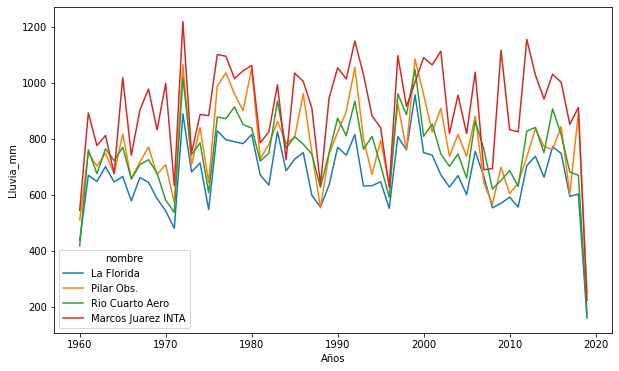

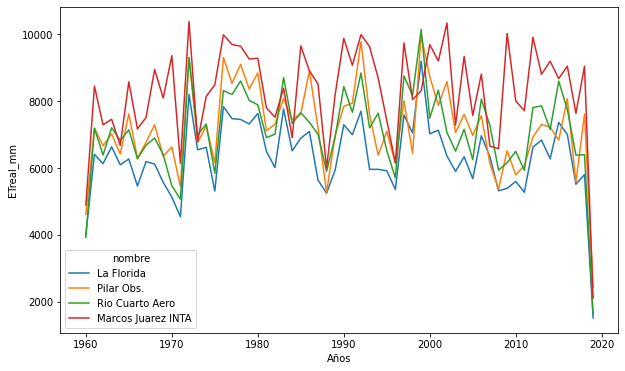

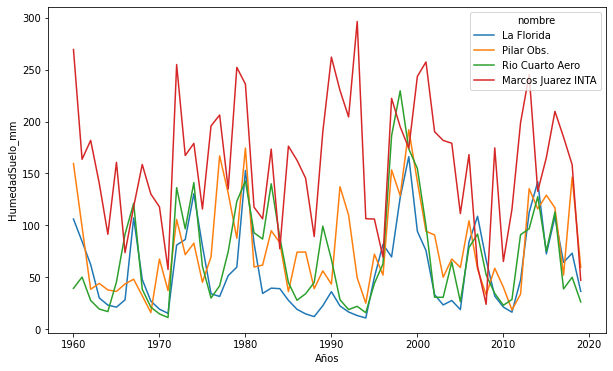

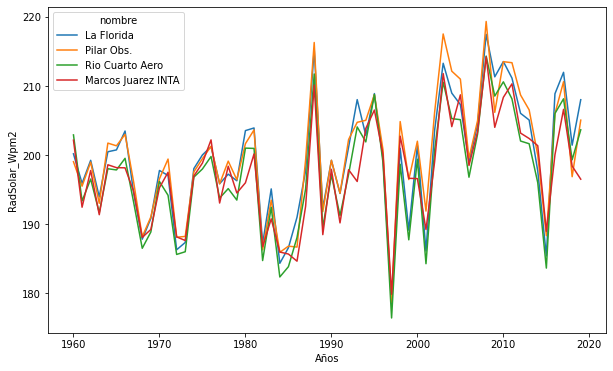

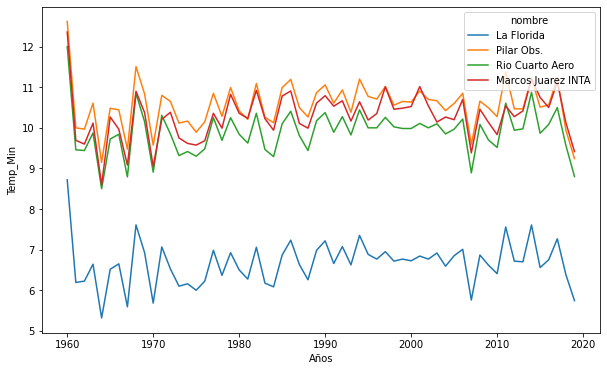

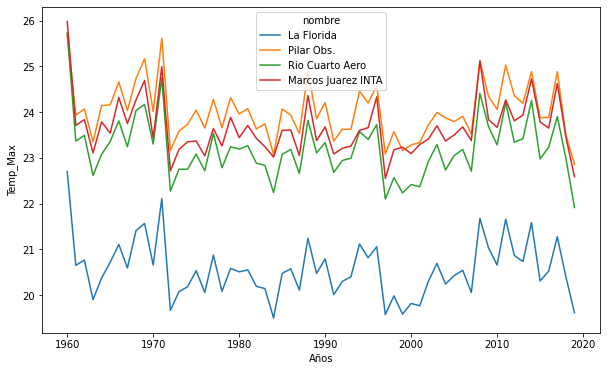

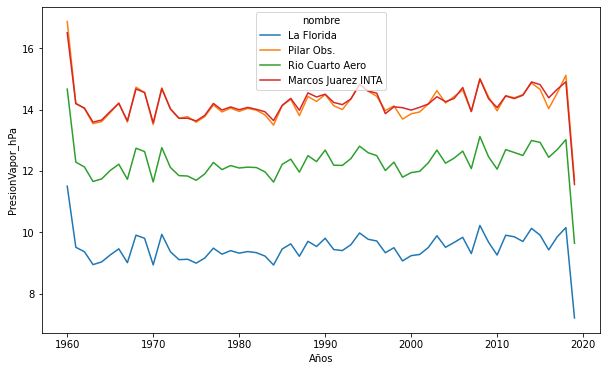

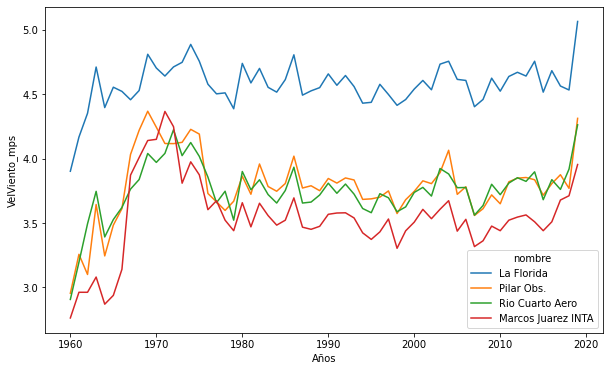

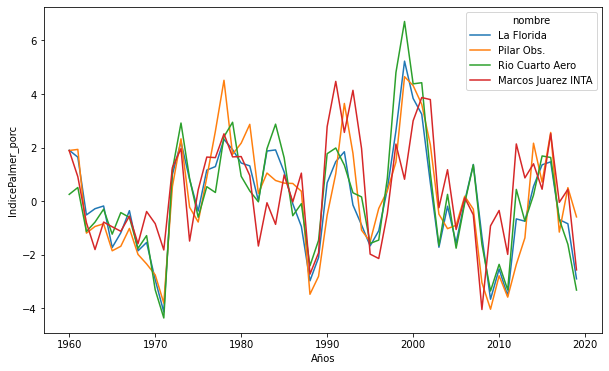

In [ ]:
# Explorar las series temporales por año hidrológico
variables = ['Lluvia_mm', 'ETreal_mm', 'HumedadSuelo_mm', 'RadSolar_Wpm2', 'Temp_Min', 'Temp_Max', 
             'PresionVapor_hPa', 'VelViento_mps', 'IndicePalmer_porc']


for variable in variables:
  dataset_variable = dataset_yearly.reset_index()[['hydro_year', 'omm_id', variable]]
  dataset_variable = pd.merge(dataset_variable, stations_filtered, on = 'omm_id')
  dataset_variable['omm_id'] = dataset_variable['omm_id'].astype('category')

  plt.figure(figsize=(10,6))
  ax = sns.lineplot(x="hydro_year", y= variable, hue="nombre",
                    data=dataset_variable)
  ax.set(xlabel='Años', ylabel=variable)
  plt.show()
  

  ## 2.1 Hacer las conversiones de unidades necesarias para poder compararlos con cada estación.

In [ ]:
dataset_terraclimate['ETreal_mm'] = dataset_terraclimate.ETreal_mm/10

**La variable evapotranspiración real no ha sido re-escalada y tiene la unidad en la escala original del dataset. **

Para algunas variables más discontinúas como el viento se observa una diferencia grande entre los valores correspondientes a los píxeles de las estaciones oficiales frente al píxel correspondiente a la estación la Florida. Esto se debe a que las primeras formaron parte del proceso de reanálisis por lo que corrigieron los resultados de los modelos con datos observados. El uso de este tipo de productos debe ser cuidadoso ya que se pueden inducir importantes errores al utilizar datos de reanálisis en regiones con baja densidad de estaciones meteorologicas pero en muchos casos no hay otra alternativa. 

## 2.3. Determinar para las estaciones de la cuenca del Carcarañá, los valores promedios anuales (año hidrológico) y comparar los estadísticos de este dataset con los de "datos_diarios_cordoba.csv".

In [ ]:
# Calculo de valores acumulados de precipitacion y medios de las demás variables
terraclimate_yearly = dataset_with_hydro_year.groupby(['hydro_year', 'omm_id']).agg({'Lluvia_mm':'sum', 
                                                                                'Temp_Max':'mean', 
                                                                                'Temp_Min':'mean',
                                                                                'VelViento_mps':'mean'})

# Filtrar estaciones de la cuenca del Carcaraña
terraclimate_yearly.reset_index(inplace=True)
terraclimate_yearly = terraclimate_yearly[terraclimate_yearly.omm_id.isin(stations_filtered.omm_id)]
terraclimate_yearly = pd.merge(terraclimate_yearly, stations_filtered, on = 'omm_id')

In [ ]:
# Cargar datos observados 
dataset = Datos.copy()
stations = id_Datos.copy()

dataset_filtered = dataset[dataset.omm_id.isin(stations_filtered.omm_id)]
dataset_filtered.reset_index(inplace=True)

dataset_filtered['hydro_year'] = dataset_filtered['fecha'].apply(lambda fecha: get_hydro_year(fecha))

# Agregación de datos
dataset_yearly = dataset_filtered.groupby(['hydro_year', 'omm_id']).agg(    
    prcp=('prcp', sum),    
    tmax=('tmax', 'mean'),    
    tmin = ('tmin', 'mean'),
    vmed = ('vmed', 'mean'),
    # Calculo de días válidos
    dias_validos_prcp = ('prcp', "count"),
    dias_validos_tmax = ('prcp', "count"),
    dias_validos_tmin = ('prcp', "count"),
    dias_validos_vmed = ('prcp', "count"))


dataset_yearly.reset_index(inplace=True) 
dataset_yearly.loc[dataset_yearly.dias_validos_prcp < 330, ['prcp']] = np.nan
dataset_yearly.loc[dataset_yearly.dias_validos_tmax < 330, ['tmax']] = np.nan
dataset_yearly.loc[dataset_yearly.dias_validos_tmin < 330, ['tmin']] = np.nan
dataset_yearly.loc[dataset_yearly.dias_validos_vmed < 330, ['vmed']] = np.nan
dataset_yearly = dataset_yearly.drop(columns = ['dias_validos_prcp', 'dias_validos_tmax', 'dias_validos_tmin', 'dias_validos_vmed'] )

merged_dataset_yearly = pd.merge(dataset_yearly, terraclimate_yearly,  how='left', left_on=['omm_id','hydro_year'], right_on = ['omm_id','hydro_year']).iloc[1:-1] 

# Se remueve la primera ultima fila porque estos años hidrológicos no están completos
start_year = 1961
end_year = 2017

after_start_date = merged_dataset_yearly.loc[:,"hydro_year"] >= start_year 
before_end_date = merged_dataset_yearly.loc[:,"hydro_year"] < end_year
between_two_dates = after_start_date & before_end_date
merged_dataset_yearly = merged_dataset_yearly.loc[between_two_dates]

# Se remueve la primera ultima fila porque estos años hidrológicos no están completos
start_year = 1961
end_year = 2017

after_start_date = merged_dataset_yearly.loc[:,"hydro_year"] >= start_year 
before_end_date = merged_dataset_yearly.loc[:,"hydro_year"] < end_year
between_two_dates = after_start_date & before_end_date

merged_dataset_yearly = merged_dataset_yearly.loc[between_two_dates]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Crear data frame con las variables de ambos dataset
d = {'variable_obs': ['prcp', 'tmax', 'tmin', 'vmed'], 
     'variable_terra': ['Lluvia_mm', 'Temp_Max', 'Temp_Min', 'VelViento_mps'],
     'variable_titulo': ['Precipitación acumulada anual [mm]', 'Temperatura máxima media anual [°C]', 'Temperatura mínima media anual [°C]', 'Velocidad del viento media anual [m/2]']}
variable_df = pd.DataFrame(data=d)



In [ ]:
# Crear dataframe para guardar los resultados de las metricas de comparación
dtypes = np.dtype([('variables', str), ('omm_id', int), ('g_mean_diff', float), ('pearsonr', float), ('acc', float), ('kge_2012', float),
          ('nse', float), ('ned', float), ('d', float), ('mae', float), ('me', float), ('mde', float), ('rmse', float),
          ('nrmse_range', float), ('nrmse_iqr', float), ('nrmse_mean', float), ('irmse', float)])
data = np.empty(0, dtype=dtypes)
metrics = pd.DataFrame(data)




Variable: prcp
Estación: Pilar Obs.


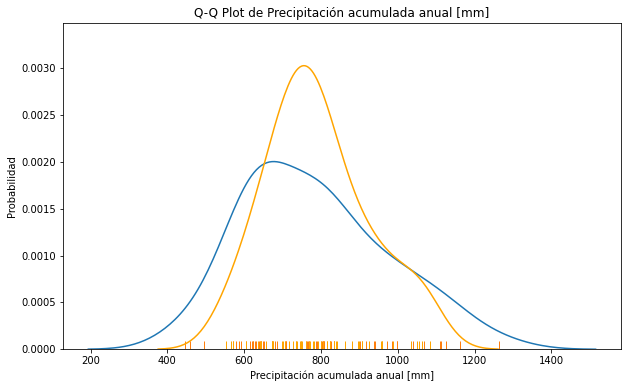

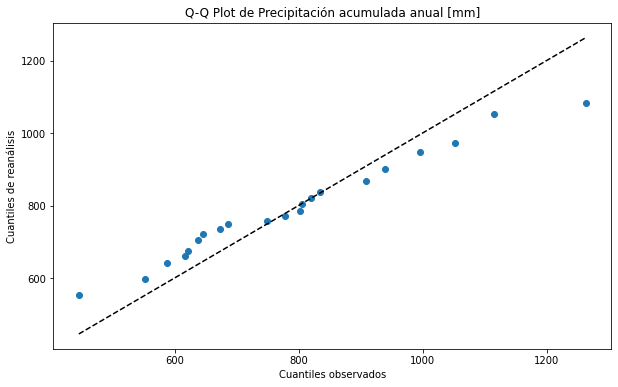

Kolmogorov_Smirnov: statistic: 0.196 p-value: 0.231
Observado: media: 783.623 mediana: 777.400 sd: 185.727
Reanálisis: media: 791.589 mediana: 771.000 sd: 130.774

Variable: prcp
Estación: Marcos Juarez INTA


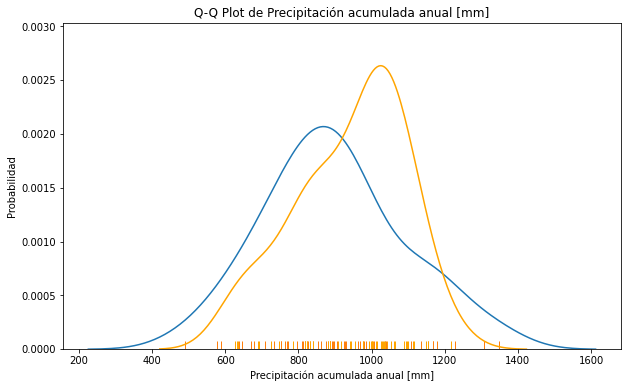

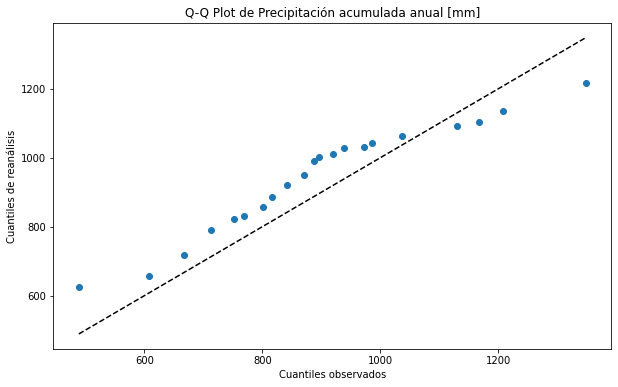

Kolmogorov_Smirnov: statistic: 0.265 p-value: 0.063
Observado: media: 896.463 mediana: 887.300 sd: 189.149
Reanálisis: media: 941.490 mediana: 992.000 sd: 147.509

Variable: prcp
Estación: Rio Cuarto Aero


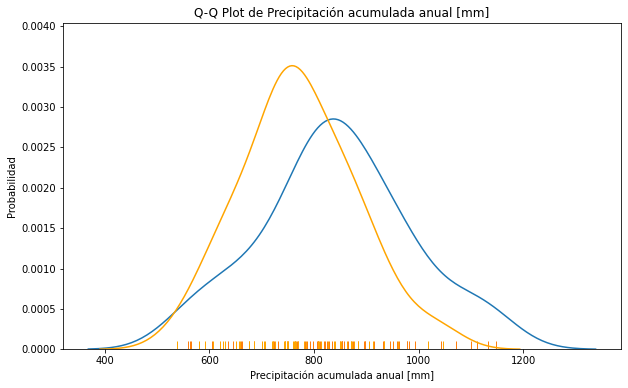

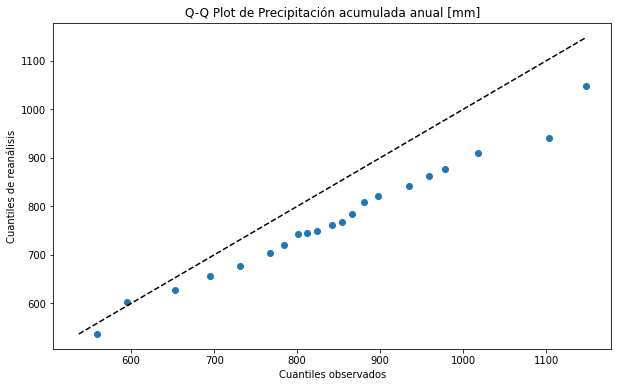

Kolmogorov_Smirnov: statistic: 0.304 p-value: 0.011
Observado: media: 842.382 mediana: 841.950 sd: 140.895
Reanálisis: media: 771.089 mediana: 762.500 sd: 108.192

Variable: prcp
Estación: La Florida


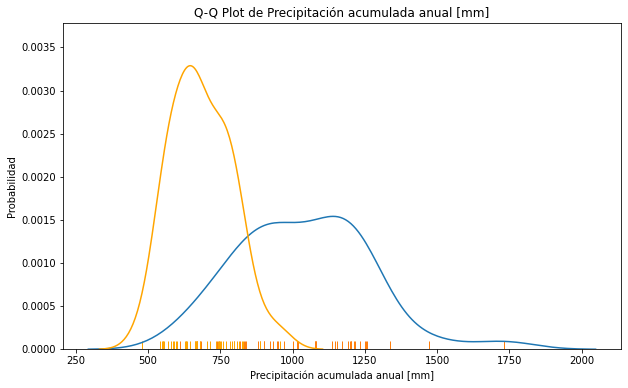

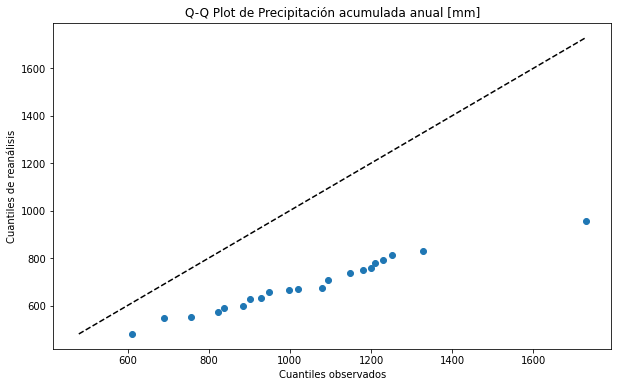

Kolmogorov_Smirnov: statistic: 0.791 p-value: 0.000
Observado: media: 1037.230 mediana: 1020.600 sd: 222.449
Reanálisis: media: 684.349 mediana: 668.000 sd: 103.381

Variable: tmax
Estación: Pilar Obs.


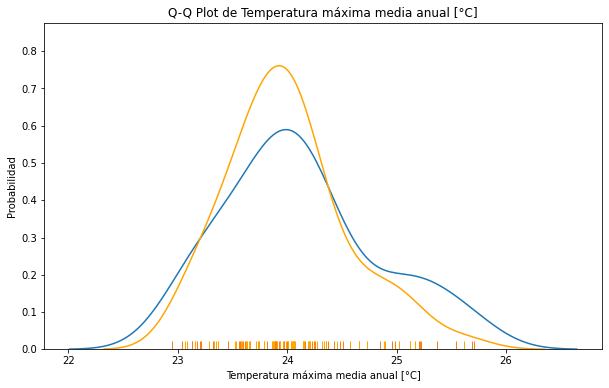

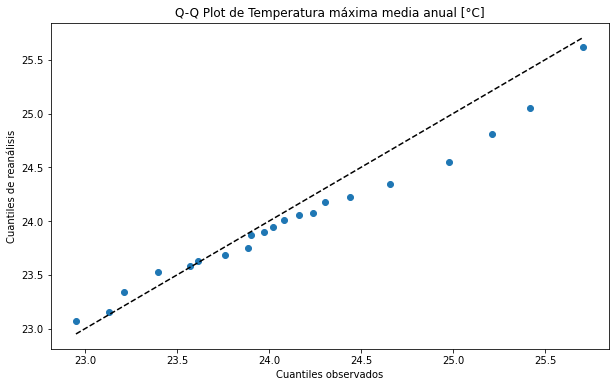

Kolmogorov_Smirnov: statistic: 0.125 p-value: 0.779
Observado: media: 24.122 mediana: 24.021 sd: 0.694
Reanálisis: media: 24.001 mediana: 23.946 sd: 0.546

Variable: tmax
Estación: Marcos Juarez INTA


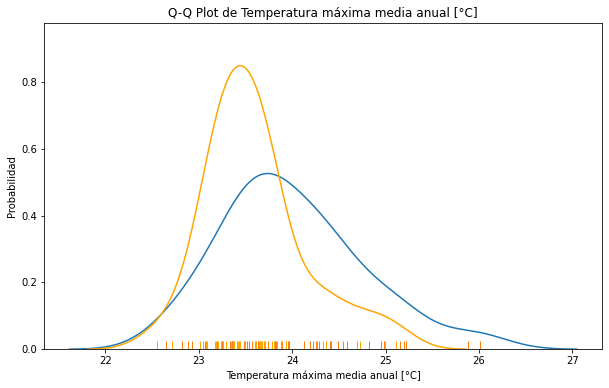

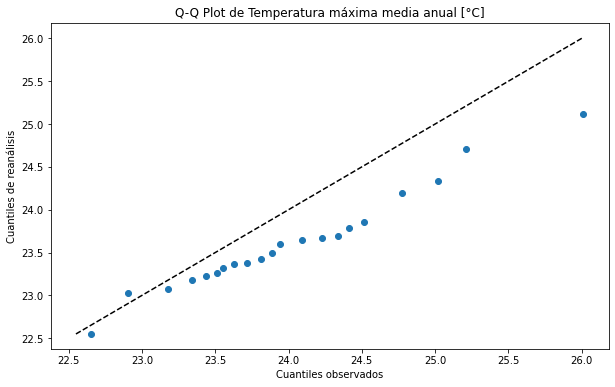

Kolmogorov_Smirnov: statistic: 0.347 p-value: 0.005
Observado: media: 24.000 mediana: 23.888 sd: 0.744
Reanálisis: media: 23.604 mediana: 23.500 sd: 0.533

Variable: tmax
Estación: Rio Cuarto Aero


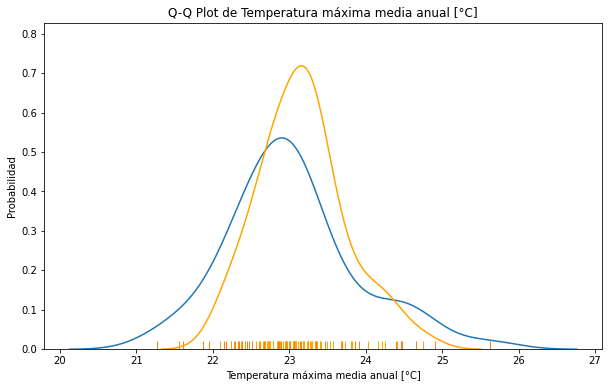

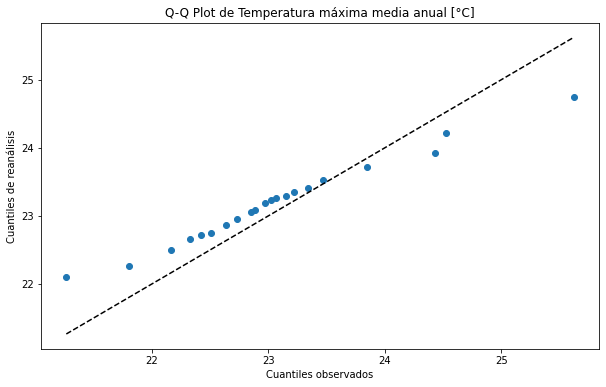

Kolmogorov_Smirnov: statistic: 0.196 p-value: 0.231
Observado: media: 23.037 mediana: 22.968 sd: 0.842
Reanálisis: media: 23.172 mediana: 23.183 sd: 0.563

Variable: tmax
Estación: La Florida
No hay datos observados para esta variable: tmax

Variable: tmin
Estación: Pilar Obs.


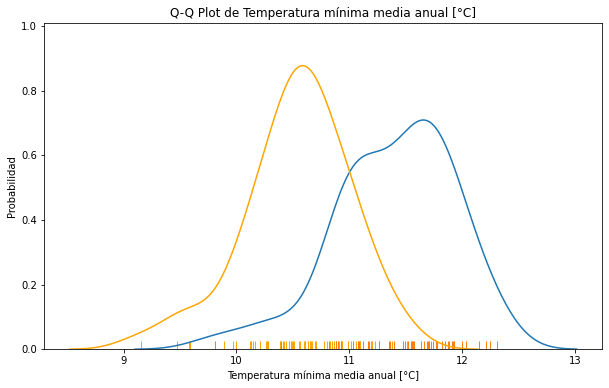

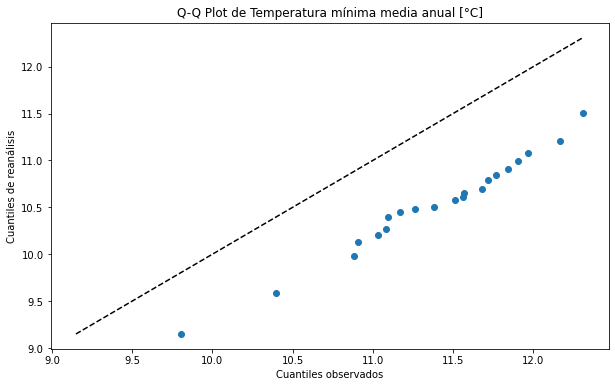

Kolmogorov_Smirnov: statistic: 0.696 p-value: 0.000
Observado: media: 11.401 mediana: 11.511 sd: 0.522
Reanálisis: media: 10.539 mediana: 10.583 sd: 0.466

Variable: tmin
Estación: Marcos Juarez INTA


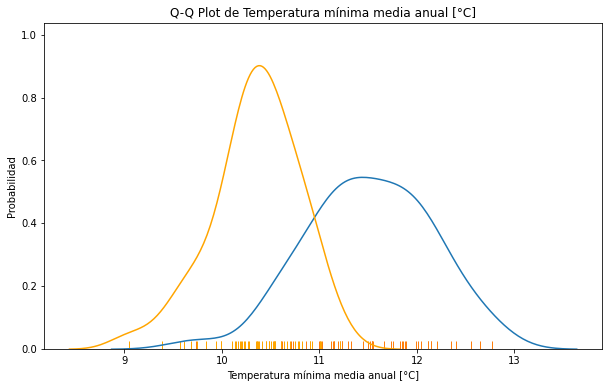

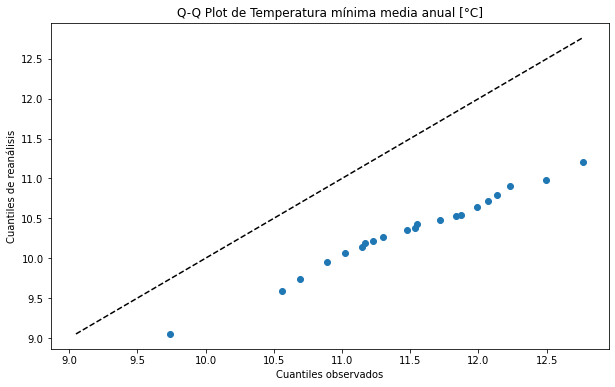

Kolmogorov_Smirnov: statistic: 0.776 p-value: 0.000
Observado: media: 11.509 mediana: 11.535 sd: 0.625
Reanálisis: media: 10.347 mediana: 10.375 sd: 0.439

Variable: tmin
Estación: Rio Cuarto Aero


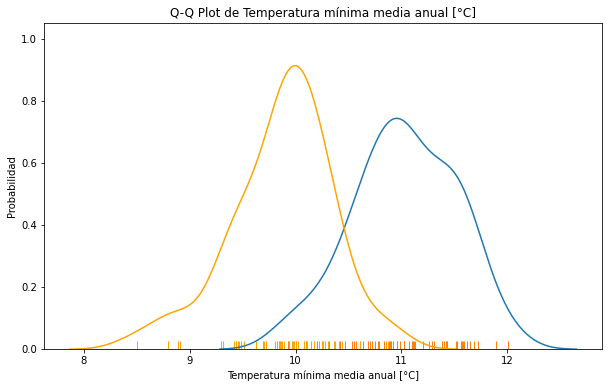

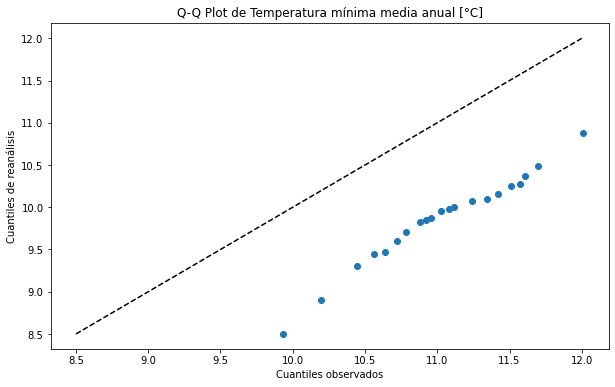

Kolmogorov_Smirnov: statistic: 0.839 p-value: 0.000
Observado: media: 11.030 mediana: 11.023 sd: 0.476
Reanálisis: media: 9.871 mediana: 9.954 sd: 0.469

Variable: tmin
Estación: La Florida
No hay datos observados para esta variable: tmin

Variable: vmed
Estación: Pilar Obs.


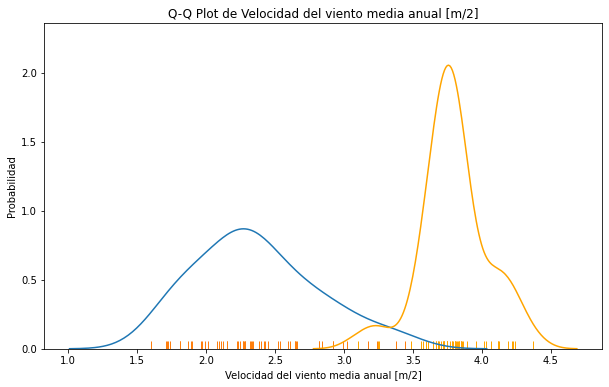

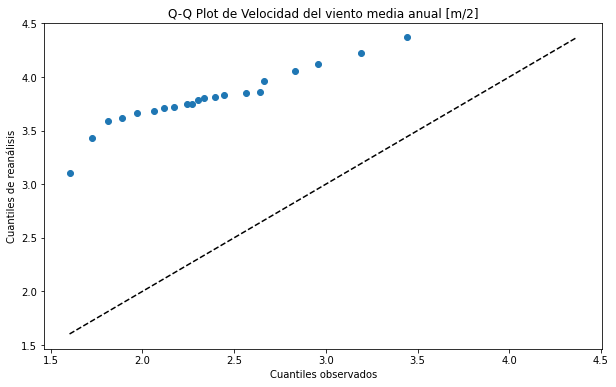

Kolmogorov_Smirnov: statistic: 0.946 p-value: 0.000
Observado: media: 2.363 mediana: 2.301 sd: 0.438
Reanálisis: media: 3.795 mediana: 3.783 sd: 0.237

Variable: vmed
Estación: Marcos Juarez INTA


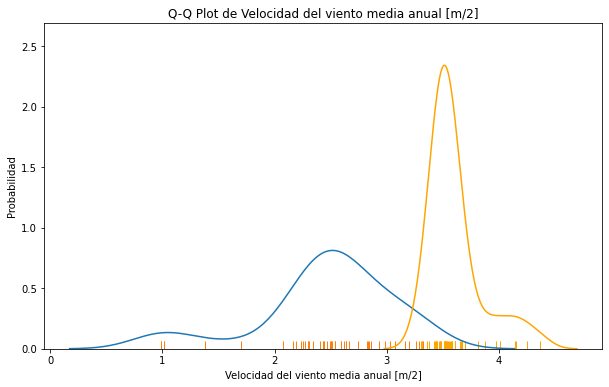

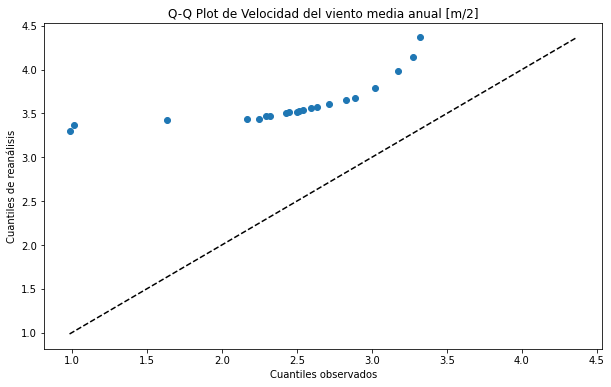

Kolmogorov_Smirnov: statistic: 0.959 p-value: 0.000
Observado: media: 2.464 mediana: 2.515 sd: 0.583
Reanálisis: media: 3.604 mediana: 3.531 sd: 0.234

Variable: vmed
Estación: Rio Cuarto Aero


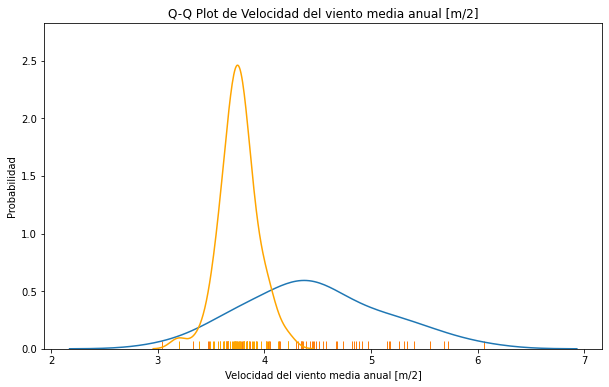

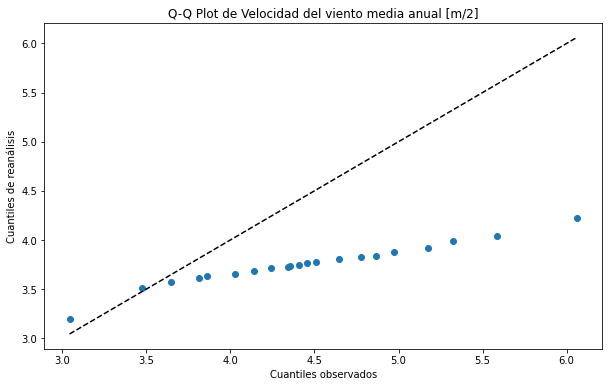

Kolmogorov_Smirnov: statistic: 0.696 p-value: 0.000
Observado: media: 4.464 mediana: 4.411 sd: 0.643
Reanálisis: media: 3.759 mediana: 3.750 sd: 0.175

Variable: vmed
Estación: La Florida
No hay datos observados para esta variable: vmed


In [ ]:
# Comparación de variables observadas y derivadas de TerraClimate
for variable_index in range(len(variable_df)):
  variable_obs = variable_df.at[variable_index,'variable_obs']
  variable_terra = variable_df.at[variable_index,'variable_terra']
  variable_titulo = variable_df.at[variable_index,'variable_titulo']

  data_points = merged_dataset_yearly[['omm_id', variable_obs, variable_terra]]

  for station in omm_id:
    station_name = stations_filtered[stations_filtered['omm_id'] == station].nombre.item()
    print(f'\nVariable: {variable_obs}')
    print(f'Estación: {station_name}')
    
    station_data = data_points[data_points['omm_id'] == station].dropna()

    if (~station_data[variable_obs].isnull().values.all()):

      # Densidad empírica
      plt.figure(figsize=(10,6))
      sns.kdeplot(station_data[variable_obs], label = 'Observado')
      sns.rugplot(station_data[variable_obs])
      sns.kdeplot(station_data[variable_terra], label = "Reanálisis", color = 'orange')
      sns.rugplot(station_data[variable_terra], color = 'orange')
      plt.ylabel('Probabilidad')
      plt.xlabel(variable_titulo)
      plt.title('Q-Q Plot de %s' % (variable_titulo))
      #plt.title('Densidad empírica de: %s' % (variable_titulo))
      plt.show()
      
      # Q-Q Plot
      plt.figure(figsize=(10,6))
      percs = np.linspace(0,100,21)
      qn_a = np.percentile(station_data[variable_obs], percs)
      qn_b = np.percentile(station_data[variable_terra], percs)
    
      plt.plot(qn_a,qn_b, ls="", marker="o")
      x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
      plt.plot(x,x, color="k", ls="--")
      plt.ylabel('Cuantiles de reanálisis')
      plt.xlabel('Cuantiles observados')
      plt.title('Q-Q Plot de %s' % (variable_titulo))
      plt.show()

      
      # Shapiro test for two samples
      resultado = stats.ks_2samp(station_data[variable_obs], station_data[variable_terra])
      print('Kolmogorov_Smirnov: statistic: %.3f p-value: %.3f'  % (resultado[0], resultado[1])) 
    
      # Metricas generales
      print('Observado: media: %.3f mediana: %.3f sd: %.3f' % (np.mean(station_data[variable_obs]), np.median(station_data[variable_obs]), np.std(station_data[variable_obs])))
      print('Reanálisis: media: %.3f mediana: %.3f sd: %.3f' % (np.mean(station_data[variable_terra]), np.median(station_data[variable_terra]), np.std(station_data[variable_terra])))

      # Media de las diferencias (geometric mean difference)
      # Calculo:  raíz n-ésima del producto de todos los números
      # Al ser la diferencia un valor proximo a cero indican mayor similitud. 
      # Esta metrica es más robusta que la media aritmética y se comporta mejor 
      # con datos autocorrelacionados.
      media_diff = hs.g_mean_diff(station_data[variable_obs], station_data[variable_terra])

      # Coeficiente de correlacion de Pearson
      # Range: -1, 1.
      # Interpretación: Valor positivos indican correlación positiva, negativos correlación negativa
      # y valores próximos a 0, ninguna correlación
      corr, _ = stats.pearsonr(station_data[variable_obs], station_data[variable_terra])

      # Correlacion de las anomlias
      # Range: -1 ≤ ACC ≤ 1. -1 indicates perfect negative correlation of the 
      # variation pattern of the anomalies, 0 indicates complete randomness of 
      # the variation patterns of the anomalies, 1 indicates perfect correlation 
      # of the variation pattern of the anomalies.
      acc = hs.acc(station_data[variable_obs], station_data[variable_terra])

      # Kling-Gupta efficiency
      # Rango: -inf < KGE (2012) < 1
      kge = hs.kge_2012(station_data[variable_obs], station_data[variable_terra])

      # Nash-Sutcliffe Efficiency
      # Range: -inf < NSE < 1, does not indicate bias, larger is better.
      # Notes: The Nash-Sutcliffe efficiency metric compares prediction values to 
      # naive predictions (i.e. average value). One major flaw of this metric 
      #is that it punishes a higher variance in the observed values (denominator). 
      nse = hs.nse(station_data[variable_obs], station_data[variable_terra])

      # Distancia euclidia
      # Range 0 ≤ ED < inf, smaller is better. 
      #dist_euclidia = hs.ed(station_data[variable_obs], station_data[variable_terra])

      # Distancia euclidia normalizada
      # Range 0 ≤ ED < inf, smaller is better. 
      ned = hs.ned(station_data[variable_obs], station_data[variable_terra])

      # Concordancia d
      # Range: 0 ≤ d < 1, does not indicate bias, larger is better.
      d = hs.d(station_data[variable_obs], station_data[variable_terra])

      # Mean absolute error
      # Range: 0 ≤ MAE < inf, data units, smaller is better.
      # measures the absolute difference between the simulated data and the observed data. 
      # For the mean abolute error, a smaller number indicates a better fit to 
      # the original data. 
      mae = hs.mae(station_data[variable_obs], station_data[variable_terra])

      # Mean error
      # Range -inf < MdE < inf, closer to zero is better.
      me = hs.me(station_data[variable_obs], station_data[variable_terra])

      # Median error
      # Range -inf < MdE < inf, closer to zero is better.
      # Notes This metric indicates bias. It is similar to the mean error (ME)
      mde = hs.mde(station_data[variable_obs], station_data[variable_terra])

      # Root mean square error 
      # Range 0 ≤ RMSE < inf, smaller is better.
      # Notes: The standard deviation of the residuals. A lower spread indicates 
      # that the points are better concentrated around the line of best fit (linear). 
      # Random errors do not cancel. This metric will highlights larger errors.
      rmse = hs.rmse(station_data[variable_obs], station_data[variable_terra])

      # Range normalized root mean square error
      # Range: 0 ≤ NRMSE < inf.
      # Notes: This metric is the RMSE normalized by the range of the observed time series (x).
      # Normalizing allows comparison between data sets with different scales. 
      #The NRMSErange is the most sensitive to outliers of the three normalized rmse metrics.
      nrmse_range = hs.nrmse_range(station_data[variable_obs], station_data[variable_terra])

      # IQR normalized root mean square error 
      # Range: 0 ≤ NRMSE < inf.
      # Notes: This metric is the RMSE normalized by the interquartile range of the
      # observed time series (x). Normalizing allows comparison between data sets 
      # with different scales. The NRMSEquartile is the least sensitive to outliers 
      # of the three normalized rmse metrics.
      nrmse_iqr = hs.nrmse_iqr(station_data[variable_obs], station_data[variable_terra])

      # Mean normalized root mean square error
      # Range: 0 ≤ NRMSE < inf.
      # Notes: This metric is the RMSE normalized by the mean of the observed time 
      # series (x). Normalizing allows comparison between data sets with different scales.
      nrmse_mean = hs.nrmse_mean(station_data[variable_obs], station_data[variable_terra])

      # Inertial root mean square error 
      # Range: 0 ≤ IRMSE < inf, lower is better.
      # Notes: This metric is the RMSE devided by by the standard deviation of 
      # the gradient of the observed timeseries data. This metric is meant to 
      # be help understand the ability of the model to predict changes in observation.
      irmse = hs.irmse(station_data[variable_obs], station_data[variable_terra])

      metrics = metrics.append({'variables':variable_obs, 'omm_id':station, 'g_mean_diff':media_diff, 'pearsonr':corr, 'acc':acc, 'kge_2012':kge, 'nse':nse,
                      'ned':ned, 'd':d, 'mae':mae, 'me':me, 'mde':mde, 'rmse':rmse, 'nrmse_range':nrmse_range, 'nrmse_iqr':nrmse_iqr,
                      'nrmse_mean':nrmse_mean, 'irmse':irmse}, 
                 ignore_index = True) 
    
    else:
      print('No hay datos observados para esta variable:', variable_obs)



### Comparación de variables:

Las distintas variables se compararon a través de métodos gráficos como los gráficos de densidad y los Q-Q plots y analíticamente a través de la media, mediana y desvío estándar así como una prueba de Kolmogorov-Smirnov para comprobar si las distribuciones son las mismas o no

* Precipitación: Para las estaciones que fueron incluidas en el proceso de reánalisis como son Pilar y Río Cuarto, las medias son bastante consistentes entre los dos datasets, aunque con un subestimación sistemática en ambos casos. Marcos Juarez INTA al estar bastante cerca de la estacion del SMN de la isma localidad tuvo resultados similares. Para el caso de La Florida las diferencias son muy marcadas, tanto a nivel de media como de todos los percentiles como se observa en el Q-Q Plot. 
Las variancias fueron subestimadas en todos los casos al igual que los valores extremos que tuvieron una densidad significativamente menor para los datos de reanálisis. 

Las demás variables solo pudieron ser comparadas para las estaciones de Pilar, Rio Cuarto y Marcos Juarez. 

* Temperatura máxima: Para las estaciones de Pilar y Río Cuarto la media de la distribución estuvo bien capturada por el producto.Sin embargo, la variabilidad siempre fue menor para el dataset de TerraClimate. En Maecos Juarez la comparación mostró un sesgo **"frío"**, es decir, medias menores a los observadas y se observa una menor densidad en la cola derecha de la distribución.  
* Temperatura mínima: Esta variable fue subestimada sistemáticamente para todas las estaciones. Las diferencias son notables y de más de un grado centígrado. 
* Viento: El viento es una variable muy difícil de modelar por lo que los resultados deben ser usados con cautela. 

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


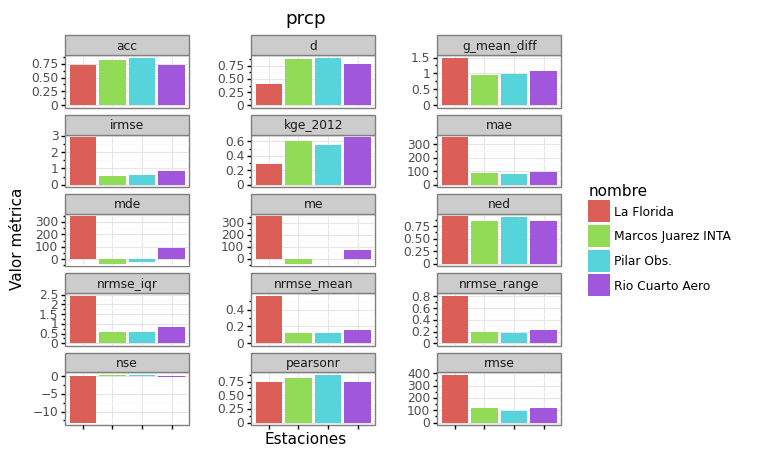

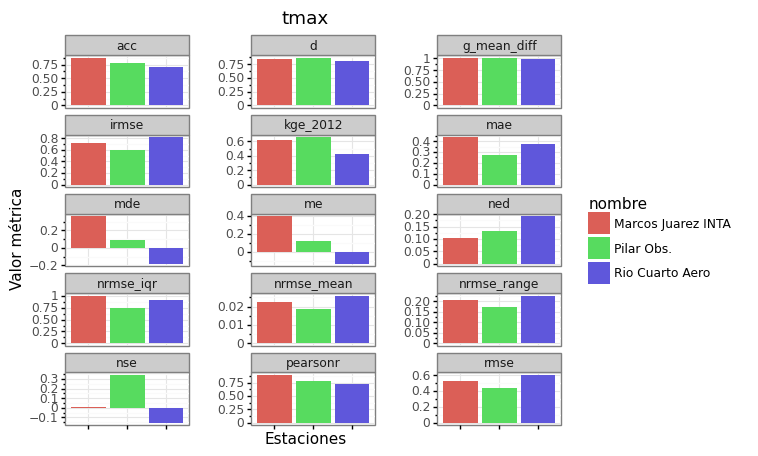

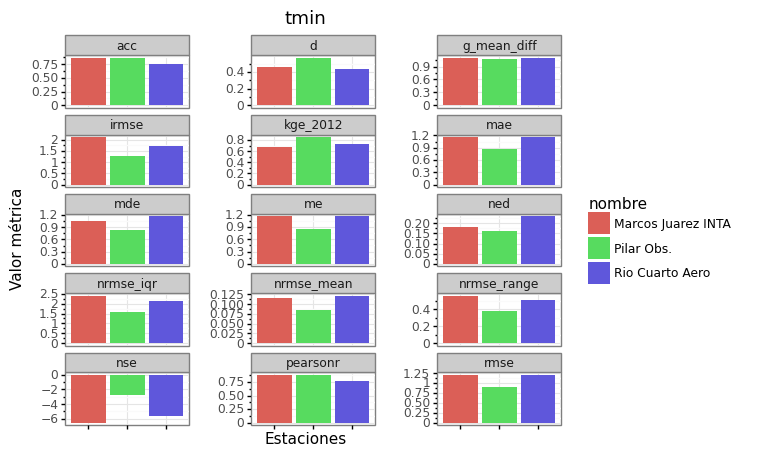

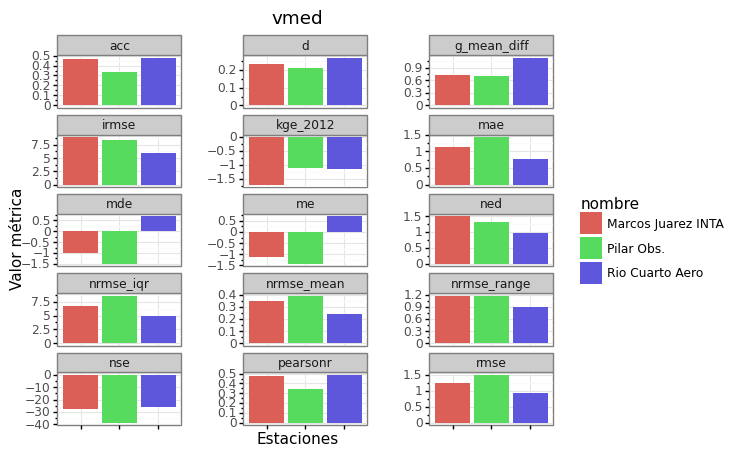

In [ ]:
# Grafico con las métricas de bondad para cada par de métricas
metric_by_variable = pd.melt(metrics, id_vars=['variables', 'omm_id'], value_vars=['g_mean_diff', 'pearsonr', 'acc', 'kge_2012', 'nse', 
           'ned', 'd', 'mae', 'me', 'mde', 'rmse', 'nrmse_range', 'nrmse_iqr', 'nrmse_mean', 'irmse'])

metric_by_variable = pd.merge(metric_by_variable, stations_filtered, on = 'omm_id')

for variable in metric_by_variable.variables.unique():
  metric_per_variable = metric_by_variable[metric_by_variable['variables'] == variable]


  g = ggplot(metric_per_variable, aes(x = 'nombre', y='value', fill= 'nombre')) + \
      geom_bar(stat='identity') + \
      facet_wrap(['variable'], scales = 'free_y', ncol = 3) + \
      theme_bw() + \
      theme(axis_text_x = element_blank(), subplots_adjust={'wspace': .5}) + \
      labs(title = variable, x='Estaciones', y='Valor métrica')
  g.draw()
  #print('Comparación de la variable: ', variable)


### Comparación métricas

Para comparar las series de las variables temporales se utilizaron una serie de métricas que consideran distintas propiedades de las mismas. Las figuras muestran los distintos valores que tomaron las métricas.

* La correlación entre las series se evalúo a través del coeficiente de correlación de Pearson (pearsonr) y las anomalías (acc) de dicho indicador. Ambos indicadores tienen la misma interpretación, valores próximos a |1| están altamente relacionados y valores próximos a 0 indican la ausencia de asociación. Al utilizar ambos indicadores se puede evaluar la asociación lineal en toda la serie y  evaluar si tmbién hay una asociación en el patrón de variación.
* La concordancia se evaluó a través del índice de concordancia (d), no indica el sesgo pero mientras más alto sea el valor, mejor. 
* Los erroes se evaluaron a través del Error Medio Absoluto (mae), Mediana del Error (mde), Error medio (me), Distancia Euclidia Normalizada (ned), Raíz del error cuadrático medio (rmse), Raíz del Error Cuadrático Medio Normalizado por distintas métricas, IQR, media, rango (nrmse_iqr, nrmse_mean, nrmse_range).
* La eficiencia se valuó a través del índice de eficiencia Nash-Sutcliffe (nde) y del Kling-Gupta  (kge_2012).

### Resultados

* Precipitación: Las estaciones mostraron una buena asociación con el reanálisisa de alrededor del 70%.  Con respecto a los errores, aquellas  que participaron del reanálisis mostraron mejores resultados que para la estacion de La Florida. Para todos los indicadores de error, La Flroida se destaco por las grandes diferencias que se observaron. Esto está en relación con los mostrados por las curvas de densidad y los Q-Q plots para dicha estación
* Temperatura máxima: Las tres estaciones mostrron una aceptable relación para una variable continua como es la temperatura. Los errores fueron variables pero relativamente pequeños con máximos de 1°C. Las diferencias entre las medias geométricas indica que la diferencia concuerda con lo anterior para las tres estaciones evaluadas.
* Temperatura mínima: Como se mencionó anteriormente existe un sesgo importante para todas las estaciones meteorológicas y superior al de la temperatura máxima. 
* Velocidsad de viento: Tal como se menciono, una variable con tanta variabilidad es my dificil de modelar motivo por el cual las métricas son tan dispares entre sí. Sin embargo, no existe una metodología mejor para modelar el viento y más en condiciones con tan pocas estaciones meterológicas disponibles. 


In [ ]:
# Agregar columnas con mes y año para combinar con TerraClimate que es mensual
# Dataset opbservado
dataset_filtered.loc[:,'fecha'] = pd.to_datetime(dataset_filtered.loc[:,'fecha'])
dataset_filtered.loc[:,'mes'] = dataset_filtered.loc[:,'fecha'].dt.month
dataset_filtered.loc[:,'ano'] = dataset_filtered.loc[:,'fecha'].dt.year

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [ ]:
# Dataset TerraClimate
dataset_terraclimate.loc[:,'Date'] = pd.to_datetime(dataset_terraclimate['Date'])
dataset_terraclimate.loc[:,'mes'] = dataset_terraclimate['Date'].dt.month
dataset_terraclimate.loc[:,'ano'] = dataset_terraclimate['Date'].dt.year

Procesando la estación:  Pilar Obs.


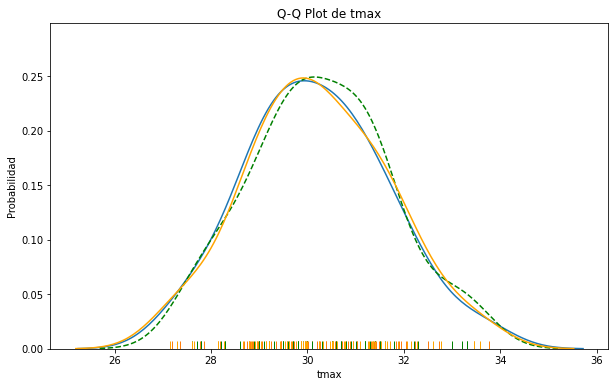

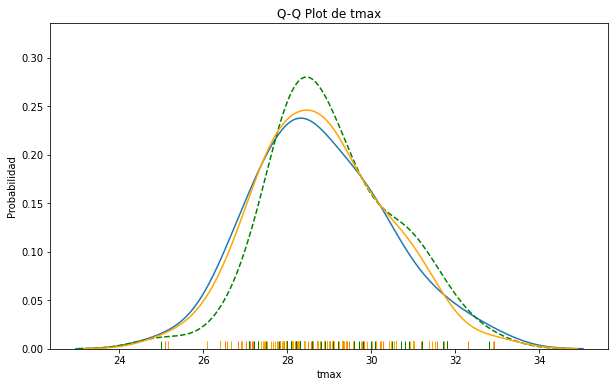

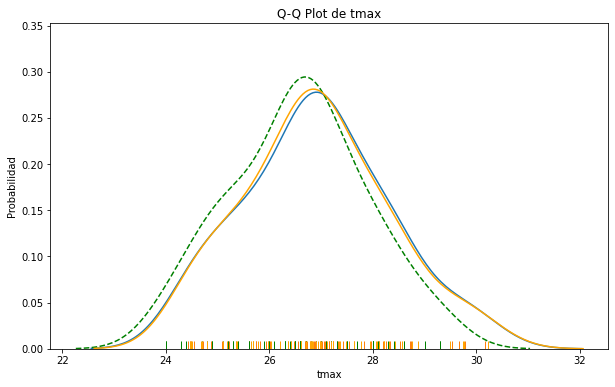

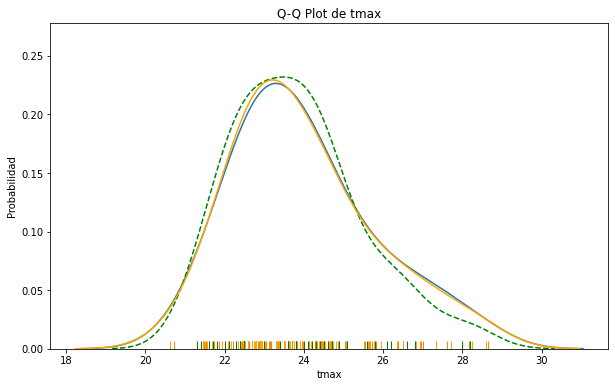

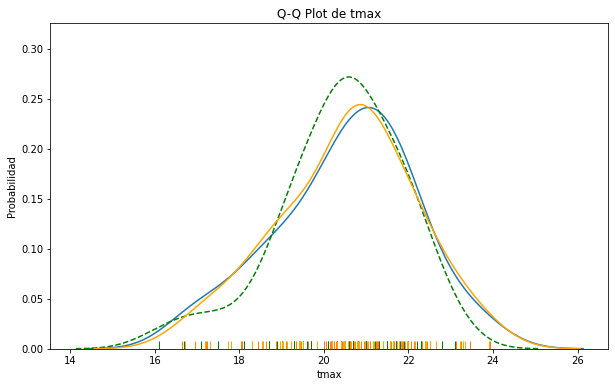

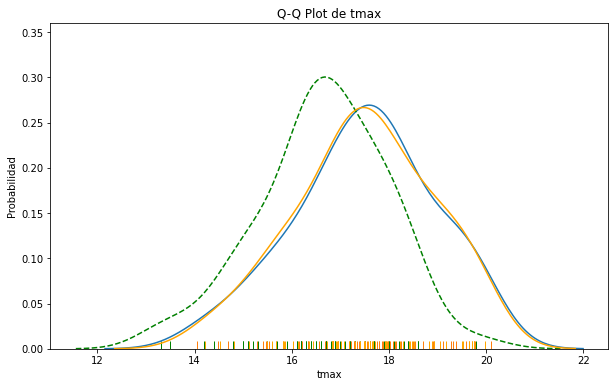

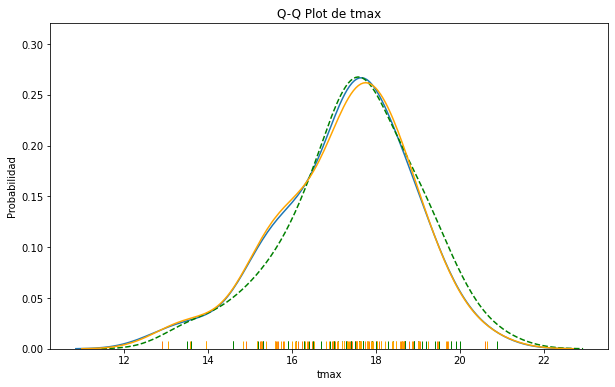

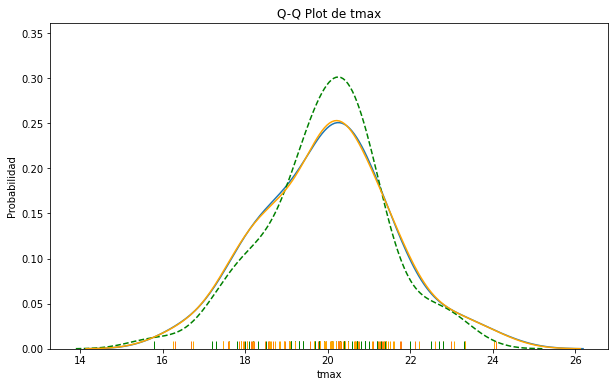

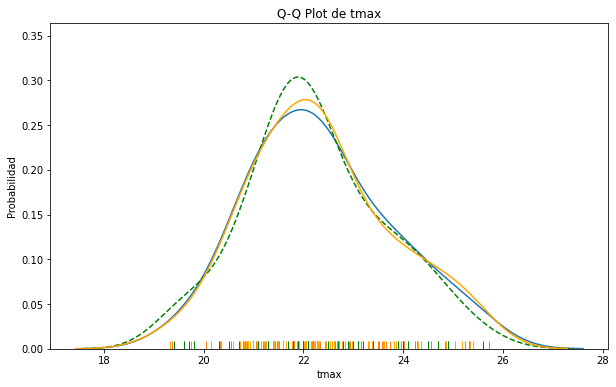

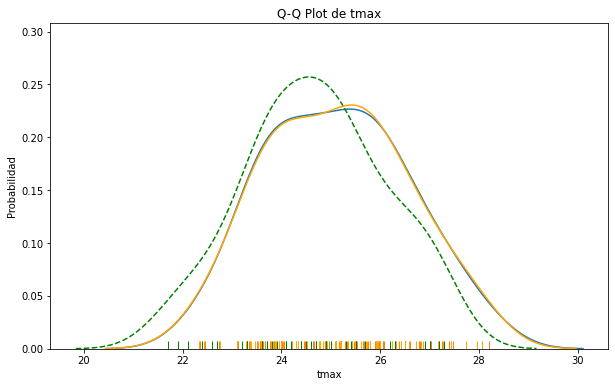

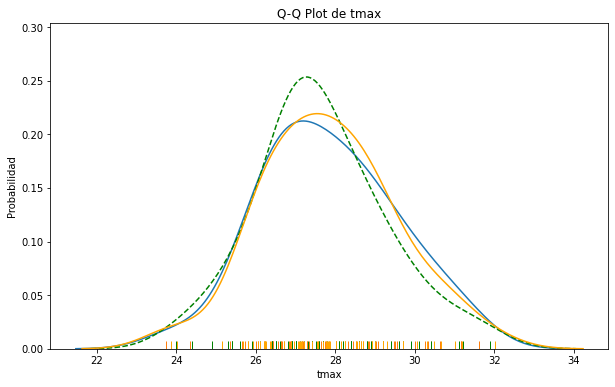

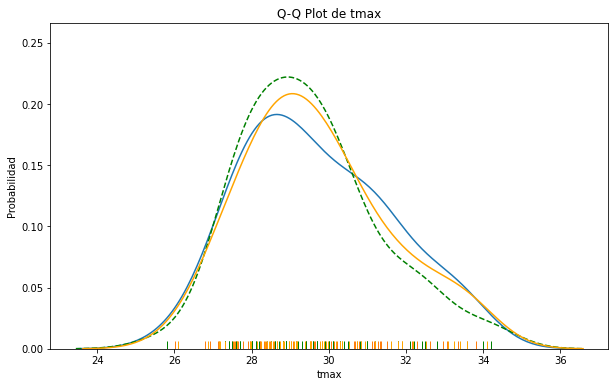

Procesando la estación:  Rio Cuarto Aero


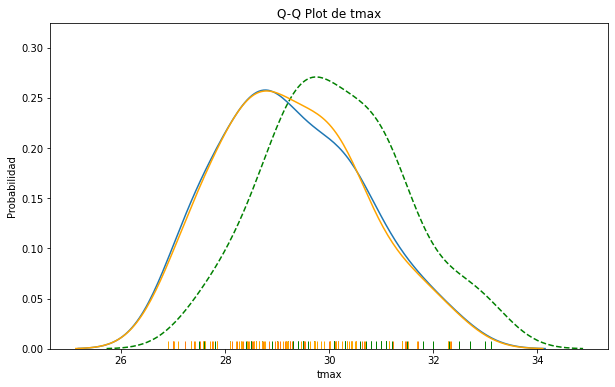

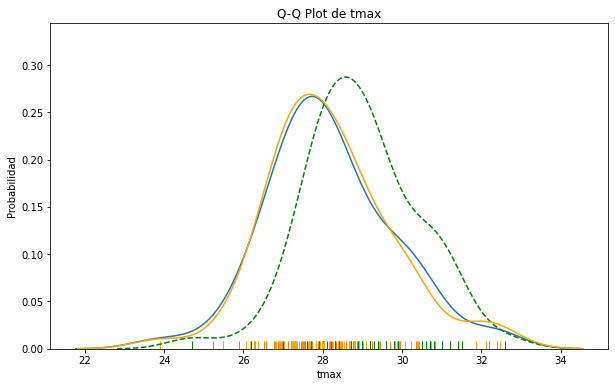

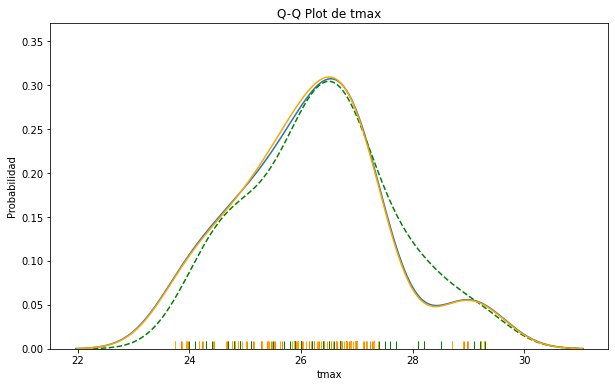

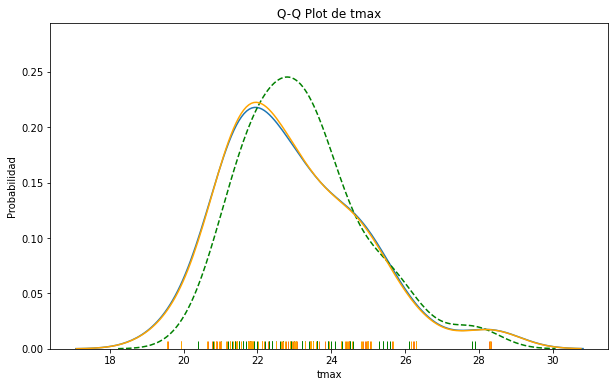

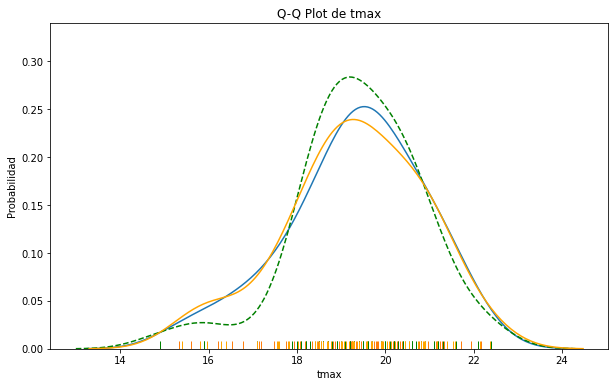

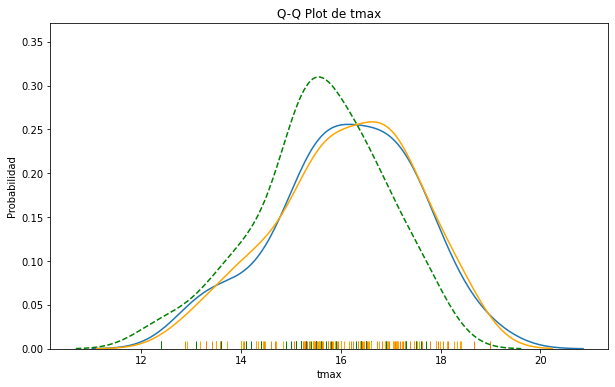

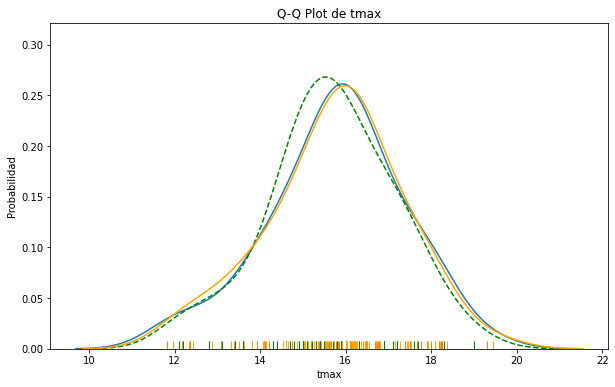

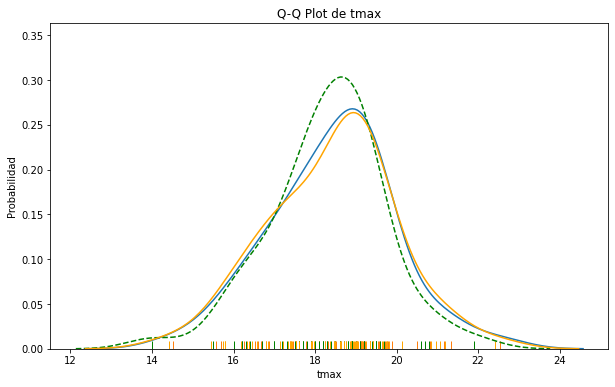

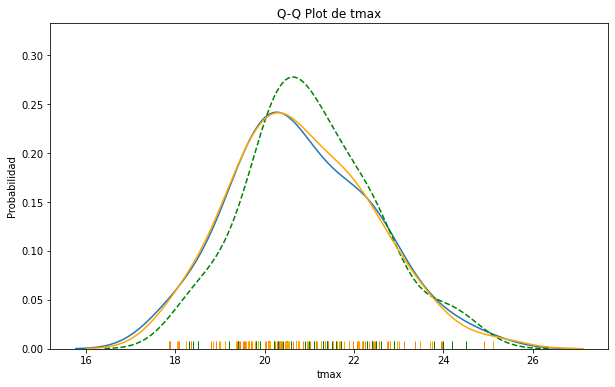

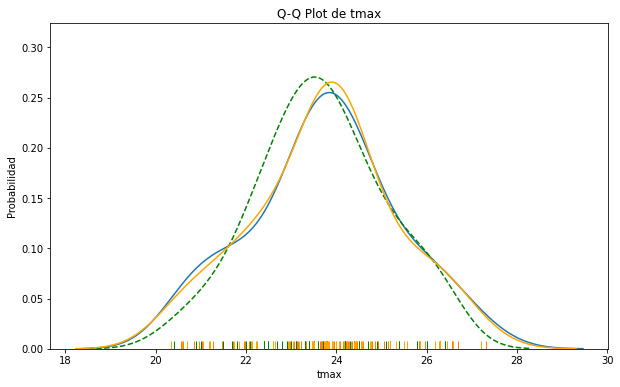

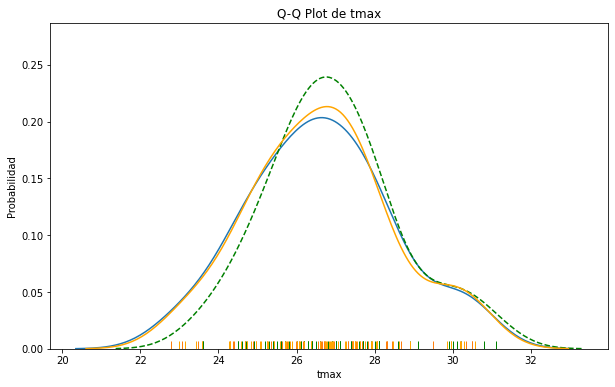

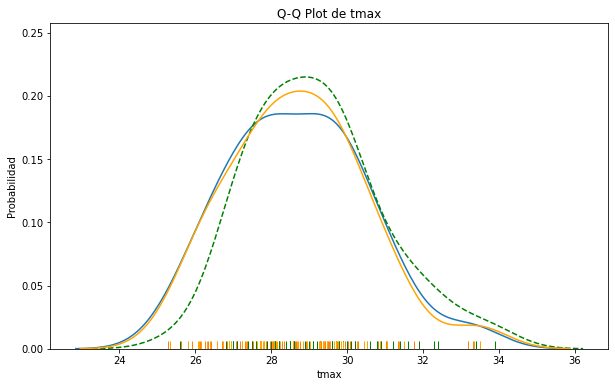

Procesando la estación:  Marcos Juarez INTA


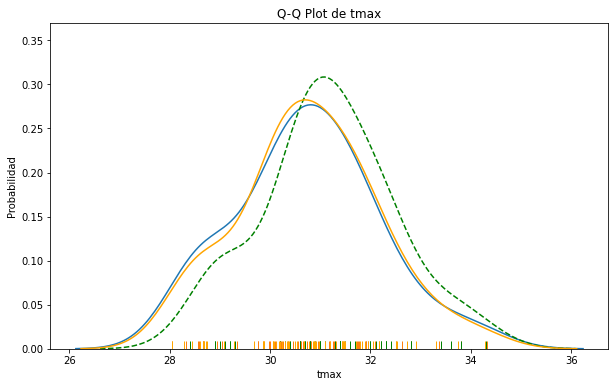

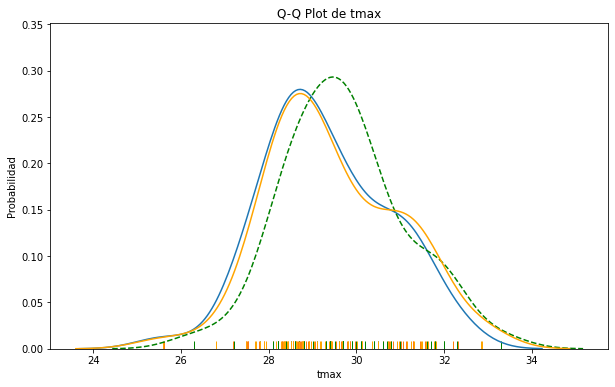

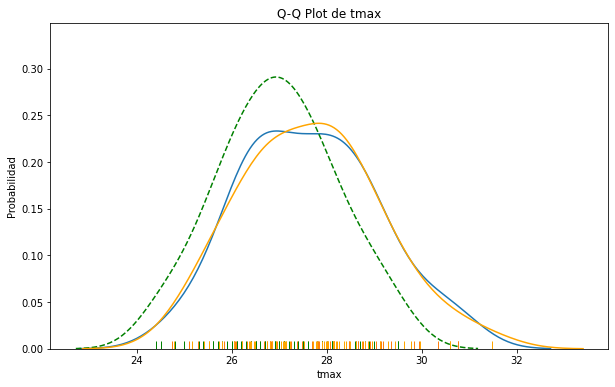

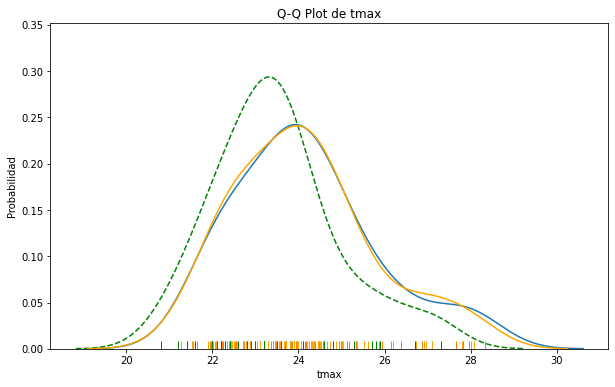

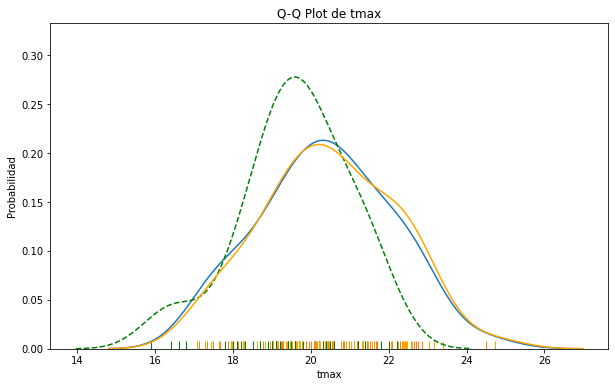

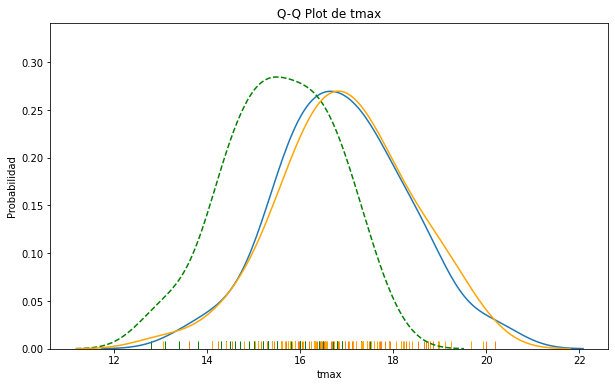

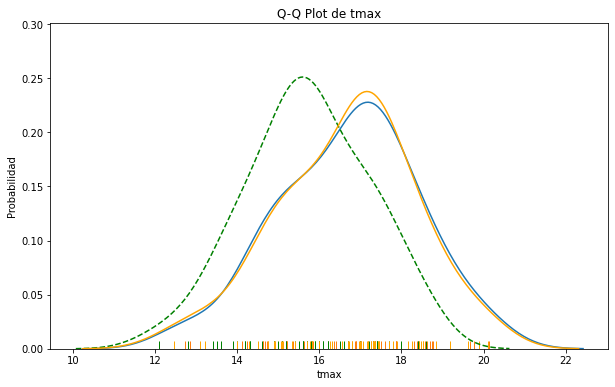

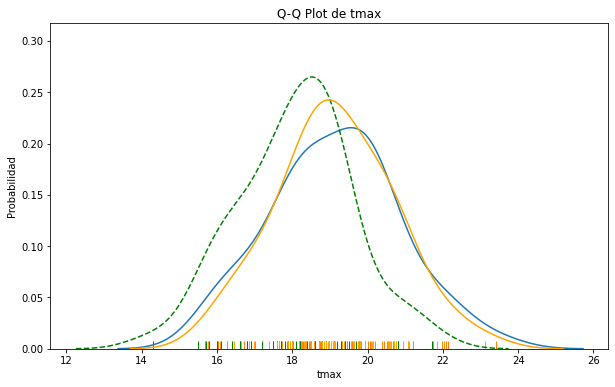

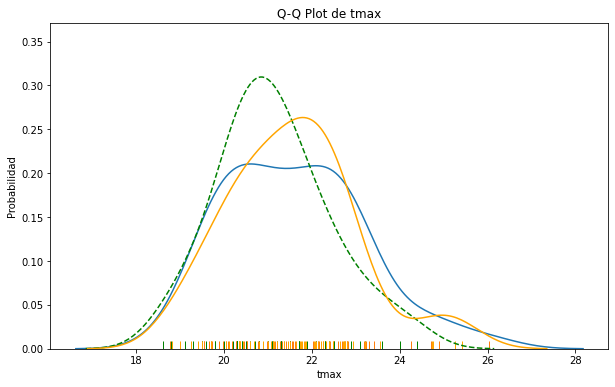

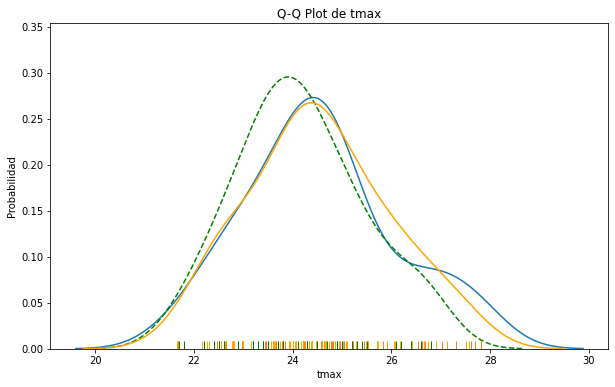

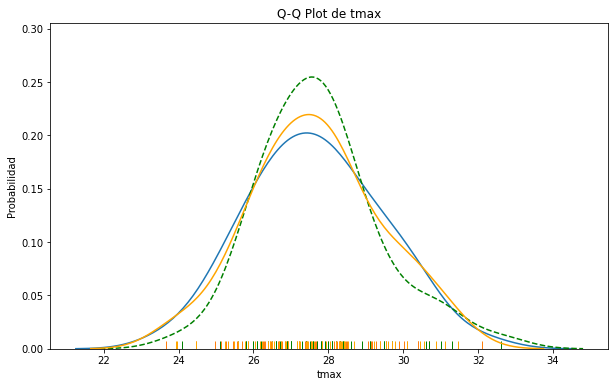

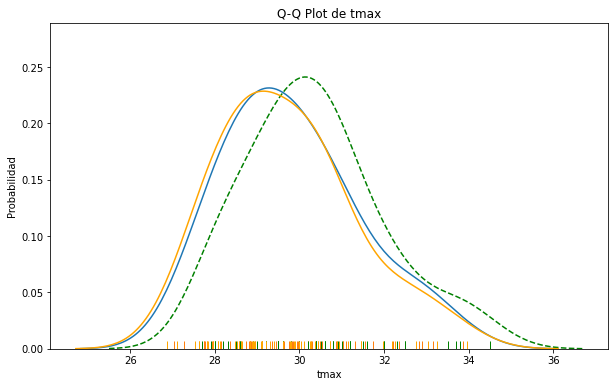

Procesando la estación:  Pilar Obs.


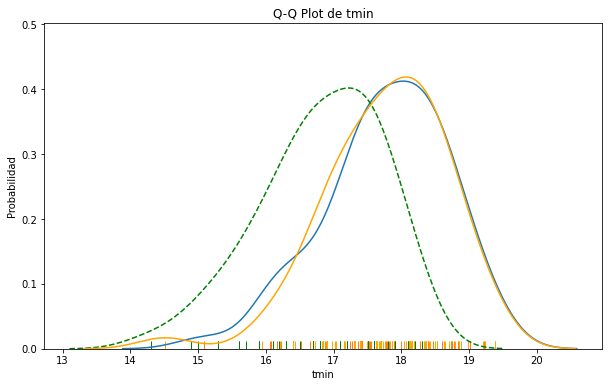

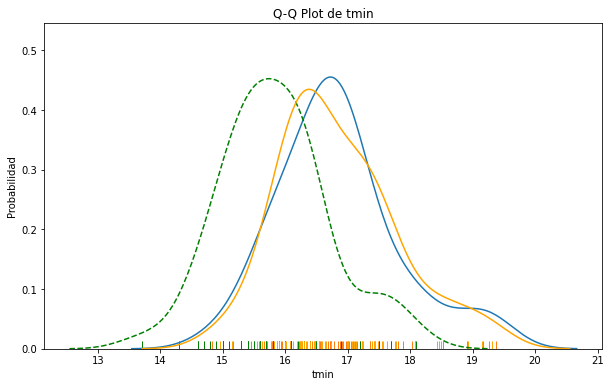

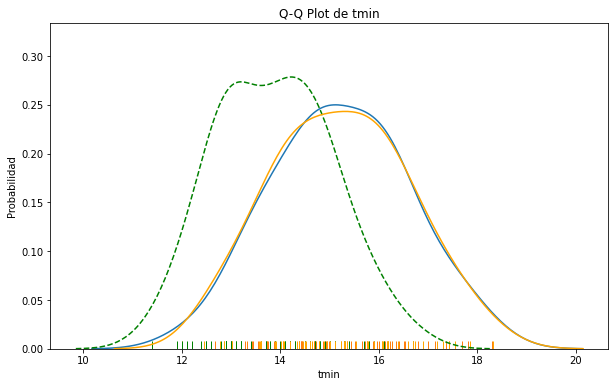

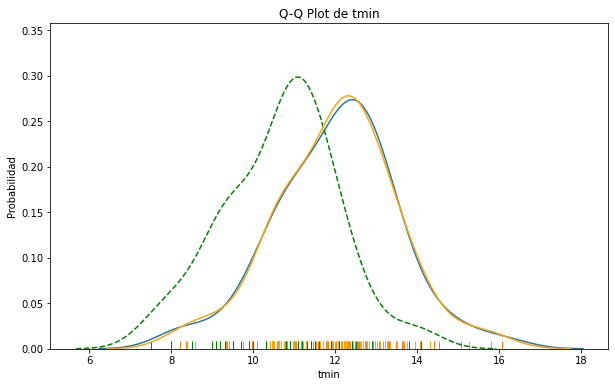

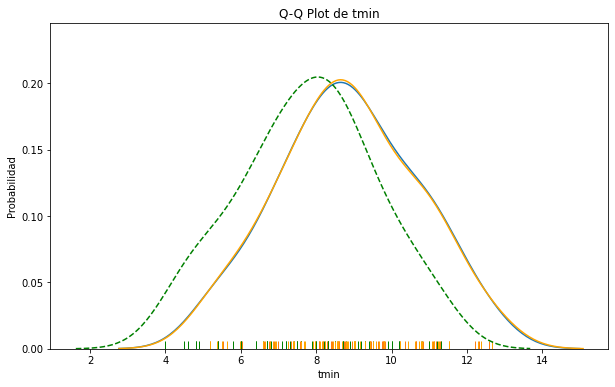

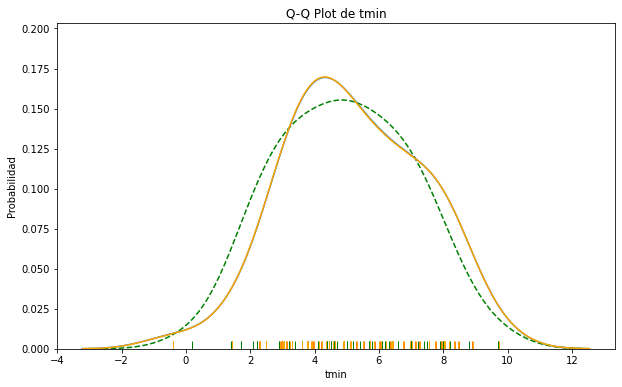

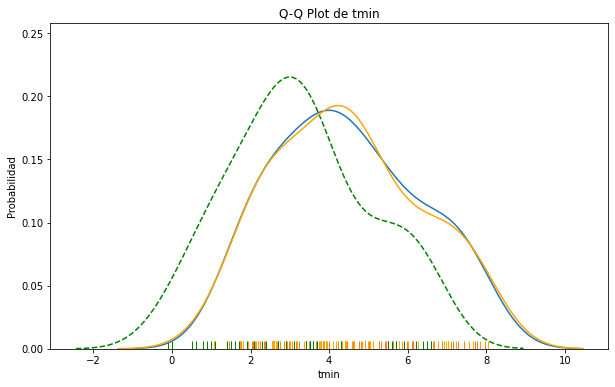

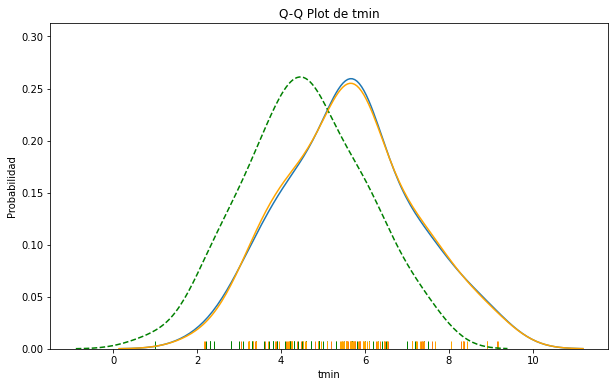

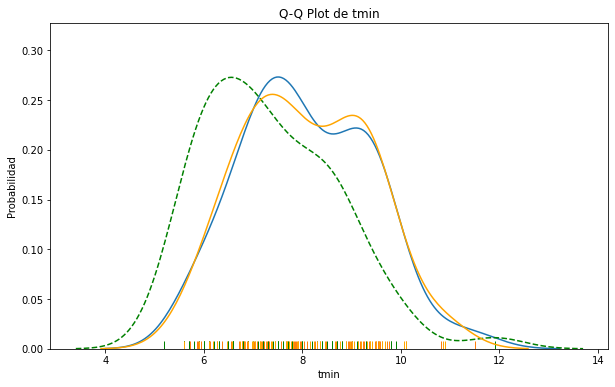

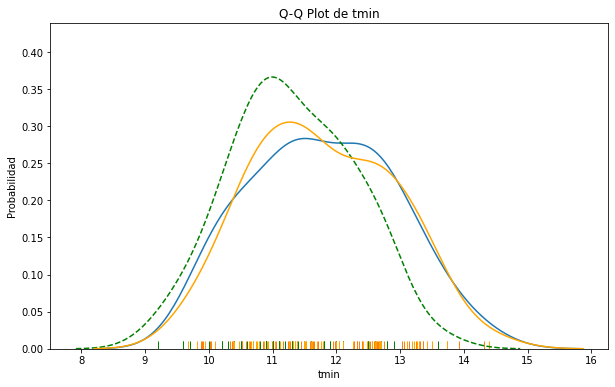

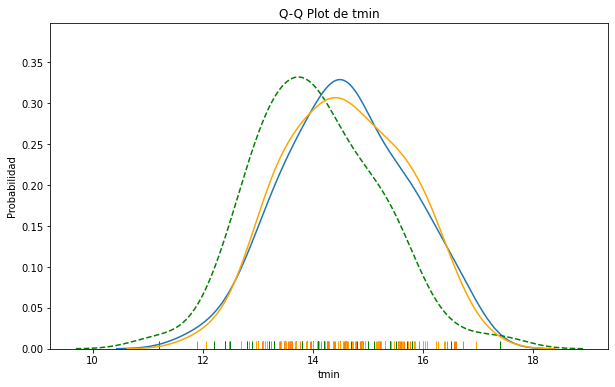

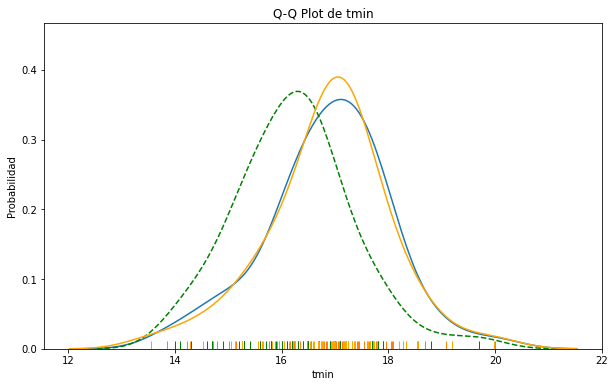

Procesando la estación:  Rio Cuarto Aero


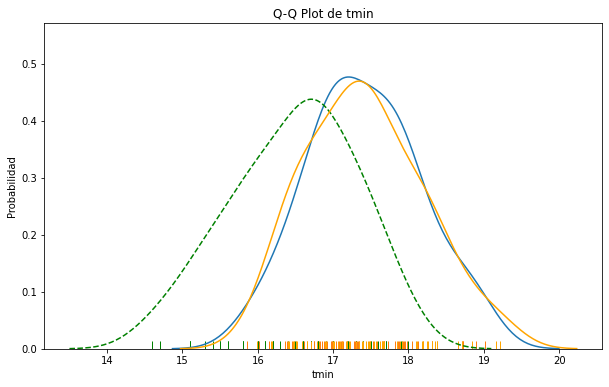

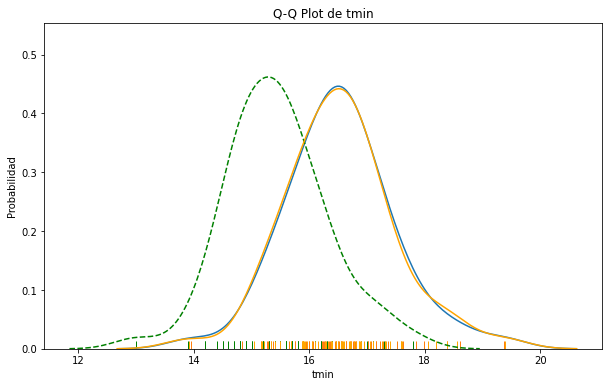

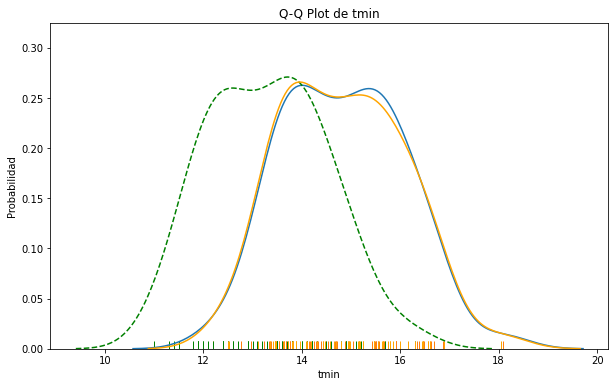

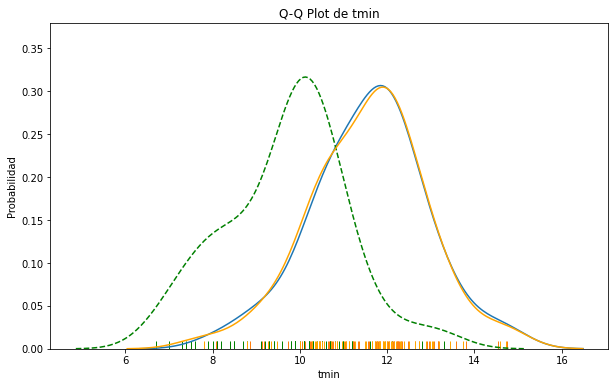

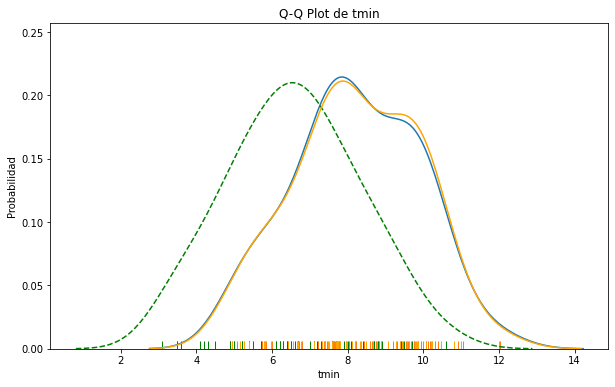

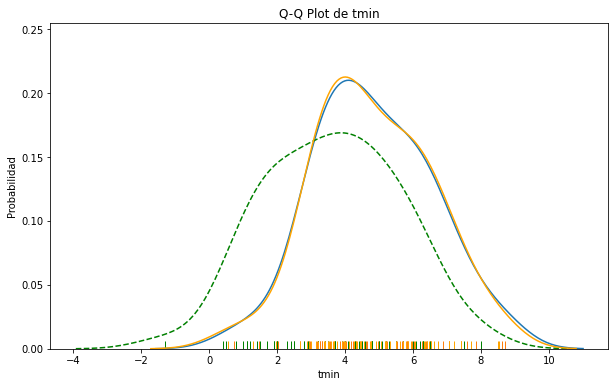

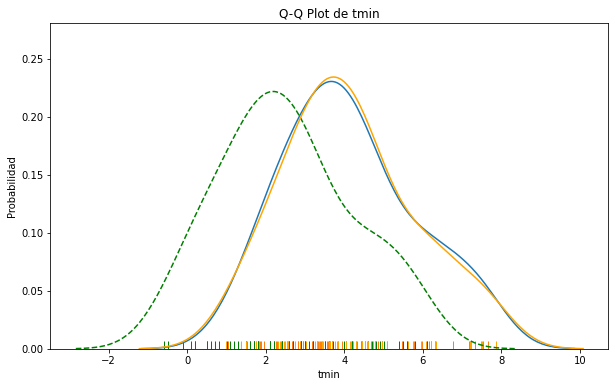

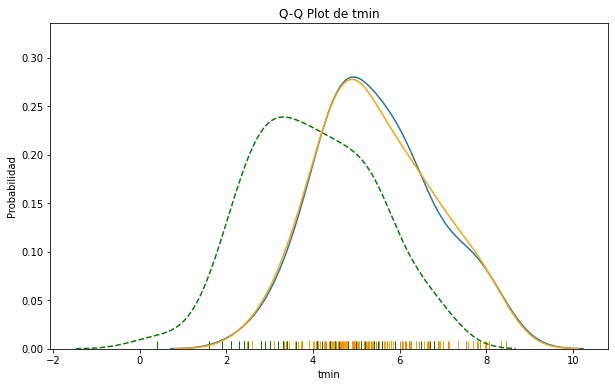

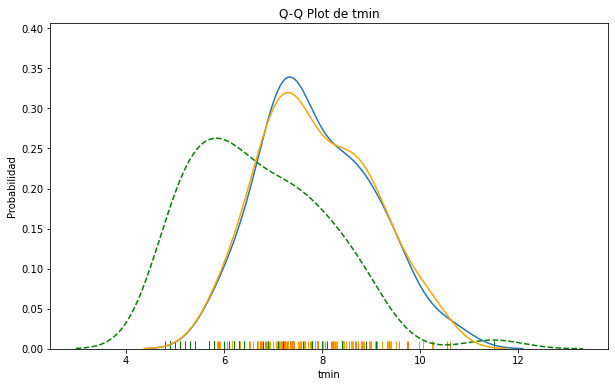

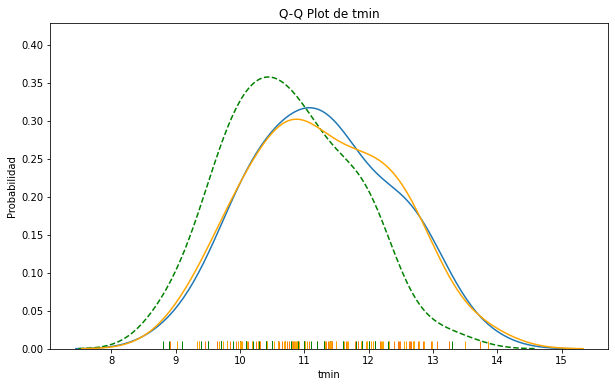

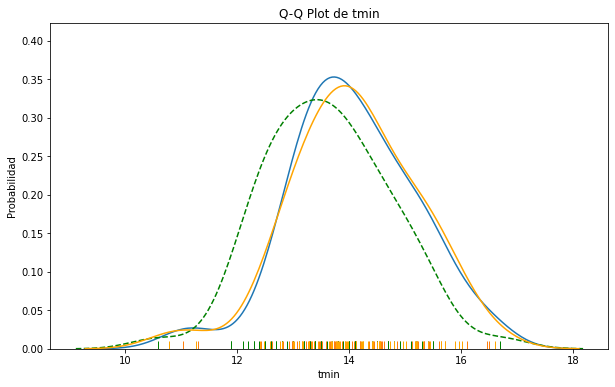

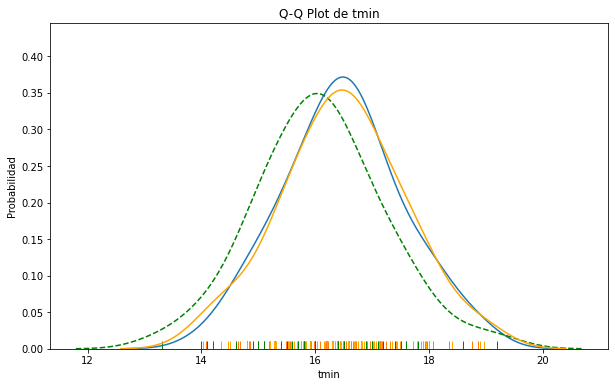

Procesando la estación:  Marcos Juarez INTA


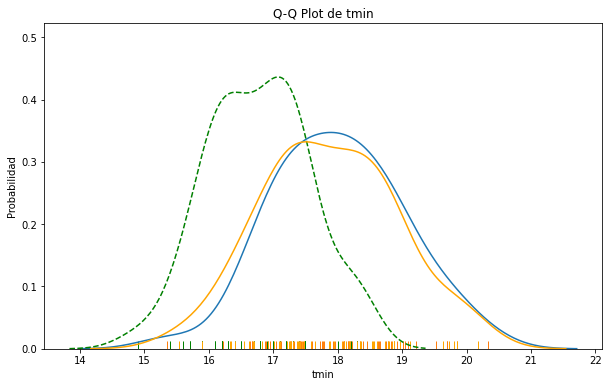

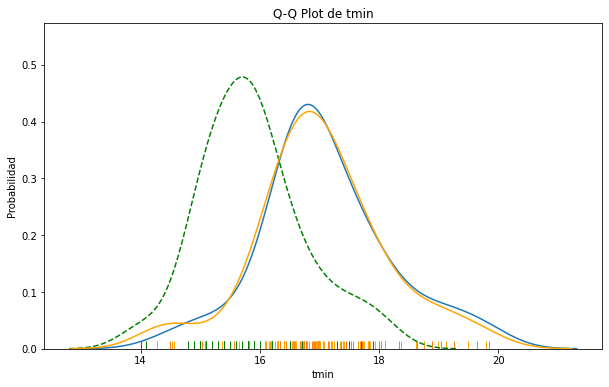

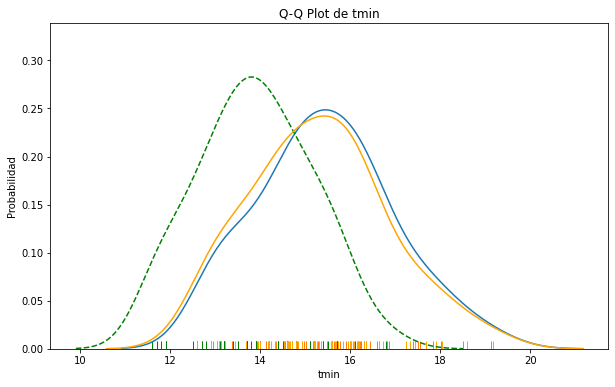

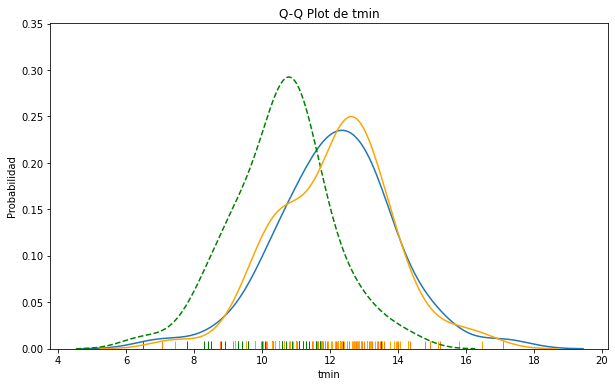

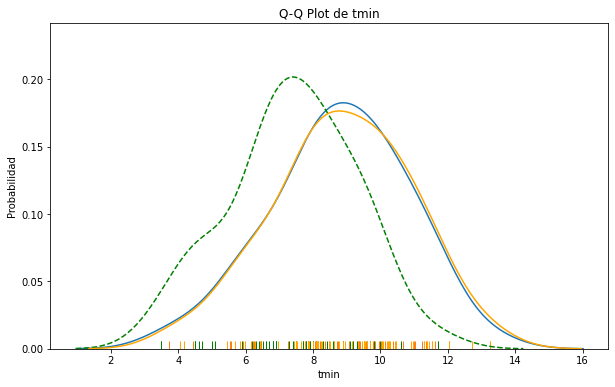

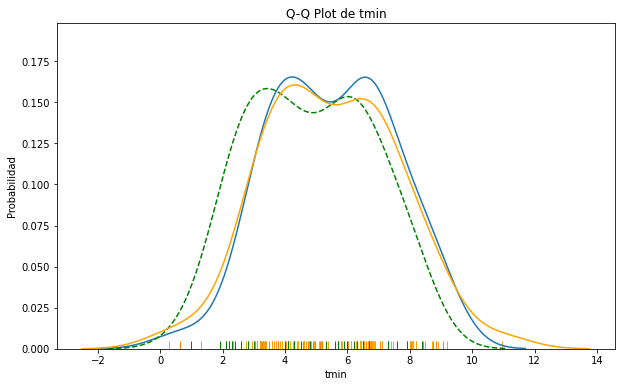

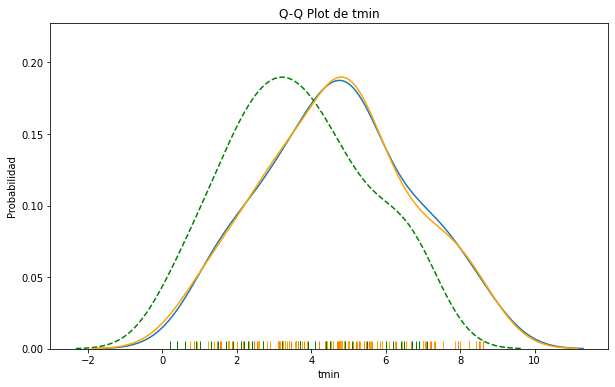

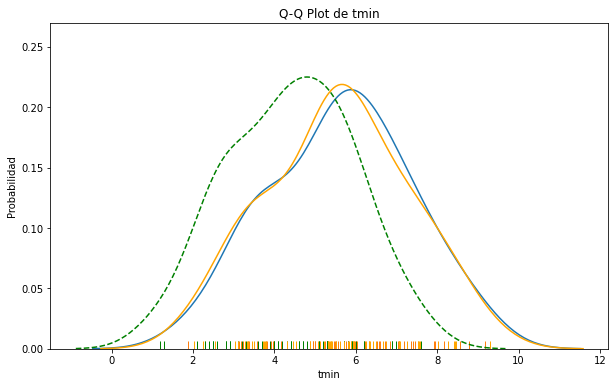

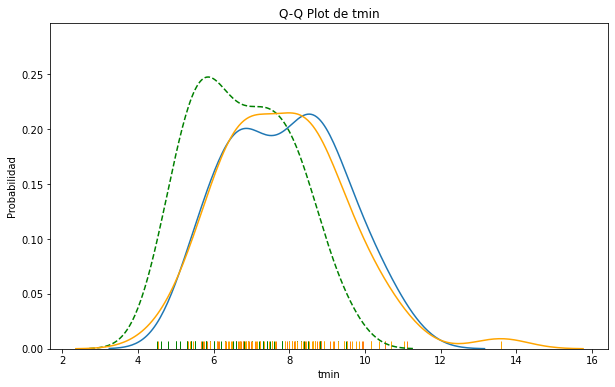

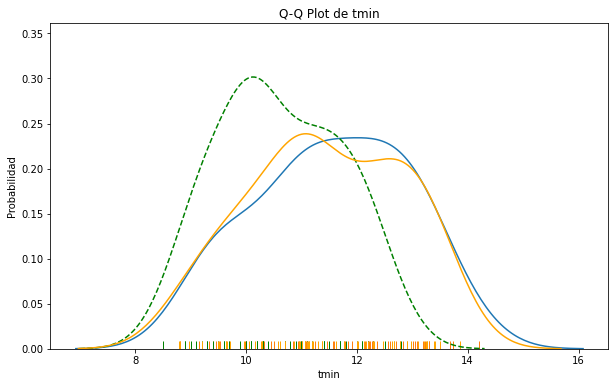

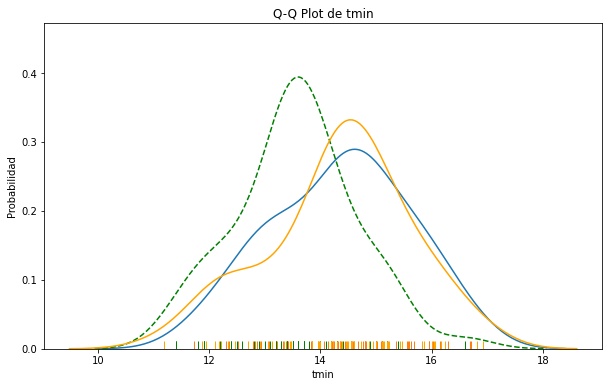

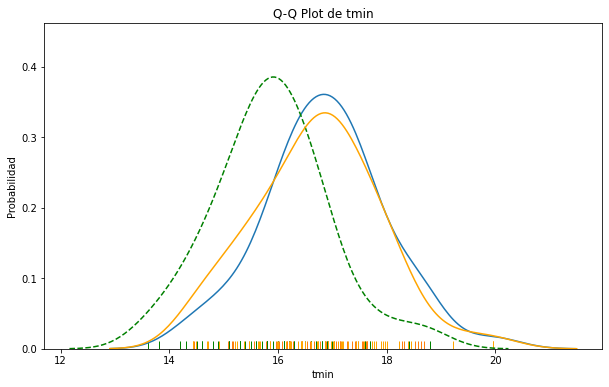

In [ ]:
# Corregir sesgo (Bias correction)
variables_corregir = [('tmax', 'Temp_Max'), ('tmin', 'Temp_Min')]

# Dataframe cpara guardar los resultados
corrected_variables = dataset_terraclimate.loc[:,('ano', 'mes', 'omm_id')]


for variable in range(0, 2):
  # Extraer datos del dataset Terraclimate
  dataset_terraclimate_corregir = dataset_terraclimate.copy()

  #dataset_terraclimate_corregir.reset_index(inplace=True)
  dataset_terraclimate_corregir = dataset_terraclimate_corregir.loc[:,('ano', 'mes', 'omm_id', variables_corregir[variable][1])]

  # Extraer datos del dataset observado
  dataset_observado = dataset_filtered.copy()
  dataset_observado['mes'] = dataset_observado['fecha'].dt.month
  dataset_observado['ano'] = dataset_observado['fecha'].dt.year

  # Calculo de valores acumulados de precipitacion y medios de las demás variables
  dataset_observado = dataset_observado.groupby(['ano', 'mes', 'omm_id']).agg({'prcp':'sum', 
                                                                                  'tmax':'mean', 
                                                                                  'tmin':'mean'})
  dataset_observado.reset_index(inplace=True)
  dataset_observado = dataset_observado.loc[:,('ano', 'mes', 'omm_id', variables_corregir[variable][0])]
  

  for station in [87349,87453,87466]:
    # Filtrar TerraClimate por estacion
    dataset_terraclimate_estacion = dataset_terraclimate_corregir[dataset_terraclimate_corregir['omm_id']  == station]
    
    anos = dataset_terraclimate_estacion.ano.unique()
    # Filtrar dataset observado
    dataset_observado_estacion = dataset_observado[dataset_observado.omm_id == station]
    
    station_name = stations_filtered[stations_filtered['omm_id'] == station].nombre.item()
    print('Procesando la estación:  %s' % (station_name))

    for mes in range(1, 13):
        
      # Filtrar TerraClimate por mes
      dataset_terraclimate_estacion_mes = dataset_terraclimate_estacion[dataset_terraclimate_estacion['mes'] == mes]
      # Filtrar dataset observado
      dataset_observado_estacion_mes = dataset_observado_estacion[dataset_observado_estacion['mes'] == mes]

      dataset_merged_correct = pd.merge(dataset_terraclimate_estacion_mes, dataset_observado_estacion_mes, on = ['ano', 'mes', 'omm_id']).dropna()


      bc = BiasCorrection(dataset_merged_correct[variables_corregir[variable][0]], dataset_merged_correct[variables_corregir[variable][1]], dataset_terraclimate_estacion_mes[variables_corregir[variable][1]])
      corrected = bc.correct(method='normal_mapping')
     
      
      corrected_variables.loc[(corrected_variables["ano"].isin(anos)) & (corrected_variables["mes"] == mes) & (corrected_variables['omm_id'] == station), variables_corregir[variable][1]] = corrected
      
      # Densidad empírica
      plt.figure(figsize=(10,6))
      sns.kdeplot(dataset_merged_correct[variables_corregir[variable][0]], label = 'Observado')
      sns.rugplot(dataset_merged_correct[variables_corregir[variable][0]])
      sns.kdeplot(dataset_merged_correct[variables_corregir[variable][1]], label = "Reanálisis original", color = 'green', linestyle = '--')
      sns.rugplot(dataset_merged_correct[variables_corregir[variable][1]], color = 'green')
      sns.kdeplot(corrected, label = "Reanálisis corregido", color = 'orange')
      sns.rugplot(corrected, color = 'orange')
      plt.ylabel('Probabilidad')
      plt.xlabel(variables_corregir[variable][0])
      plt.title('Q-Q Plot de %s' % (variables_corregir[variable][0]))
      #plt.title('Densidad empírica de: %s' % (variable_titulo))
      plt.show()

Para corregir los sesgos mostrados en el punto anterior se utilizó un normal mapping, es decir, una técnica que intenta hacer coincidir los cuantiles de la distribución de probabilidad de una variable observada con aquellos del resultado del reanálisis. Solamente se corregirán las temperaturas máximas y minimas. Como el dataset de TerraClimate tiene una resolución temporal mensual se calcularon los cuantiles para cada uno de los meses del año y se corrigieron los valores por mes. Se usó una distribución dado que la temperatura se distribuye normamlente.  Esta técnica permite corregir parte de las diferencias en dnesaidad en los extremos de la distribución que son de particular interés para este tipo de estudios. 

In [ ]:
# Crear copia para La Florida que no fue corregida
dataset_terraclimate_florida = dataset_terraclimate[dataset_terraclimate['omm_id'] == 1].copy()

anos = dataset_terraclimate_florida.ano
meses = dataset_terraclimate_florida.mes

corrected_variables.loc[(corrected_variables['ano'].isin(anos)) & (corrected_variables['mes'].isin(meses)) & (corrected_variables['omm_id'] == 1), 'Temp_Max'] = dataset_terraclimate_florida.Temp_Max
corrected_variables.loc[(corrected_variables['ano'].isin(anos)) & (corrected_variables['mes'].isin(meses)) & (corrected_variables['omm_id'] == 1), 'Temp_Min'] = dataset_terraclimate_florida.Temp_Min
#corrected_variables.loc[(corrected_variables['ano'].isin(anos)) & (corrected_variables['mes'].isin(meses)) & (corrected_variables['omm_id'] == 1), 'VelViento_mps'] = dataset_terraclimate_florida.VelViento_mps


# Combinar ambos
dataset_terraclimate_uncorrected = dataset_terraclimate.copy()
dataset_terraclimate_uncorrected = dataset_terraclimate_uncorrected.drop(['Temp_Max', 'Temp_Min'], axis=1)


# Combinar dataset
merged_dataset = pd.merge(dataset_filtered, dataset_terraclimate_uncorrected,  how='left', left_on=['omm_id','ano', 'mes'], right_on = ['omm_id', 'ano', 'mes'])
merged_dataset = pd.merge(merged_dataset, corrected_variables,  how='left', left_on=['omm_id','ano', 'mes'], right_on = ['omm_id', 'ano', 'mes'])


## 2.4.	Utilizar el dataset de TerraClimate para rellenar los datos faltantes en "datos_diarios_cordoba.csv" y guardar como un dataset nuevo. Hacer esto para todas las variables salvo para lluvia.

In [ ]:
# Rellenar datos faltantes
merged_dataset.tmax = merged_dataset.tmax.fillna(merged_dataset['Temp_Max'])
merged_dataset.tmin = merged_dataset.tmin.fillna(merged_dataset['Temp_Min'])
merged_dataset.vmed = merged_dataset.vmed.fillna(merged_dataset['VelViento_mps'])


## 2.5. Agregar las demás variables del dataset de TerraClimate al creado en el punto 4. 

In [ ]:
merged_dataset = merged_dataset.drop(columns = 'nombre')
merged_dataset = pd.merge(merged_dataset, stations[['omm_id', 'nombre']], on = 'omm_id')
merged_dataset = merged_dataset[['fecha', 'ano', 'mes', 'omm_id', 'nombre', 'prcp', 'tmax', 'tmin', 'tmed', 'vmax_d', 'vmax_f', 'vmed', 'caudal', 'ETreal_mm', 'HumedadSuelo_mm', 'RadSolar_Wpm2', 'PresionVapor_hPa', 'IndicePalmer_porc' ]]



In [ ]:
merged_dataset.to_csv('datos_diarios_cordoba_terra.csv')

# 3 . Análisis y curación de datos de un Excel y un TXT: CHIRPS

In [ ]:
# Leer dataset CHIRPS 
dataset_chirps = pd.read_csv("https://raw.githubusercontent.com/Rondamon/2020_Mentoria_LluviasExtremas/master/dataset/CHIRPS.txt", sep='\t')

# Convertir variable Date
col = 'Date'
dataset_chirps[col] = pd.to_datetime(dataset_chirps[col])
dataset_chirps = pd.melt(dataset_chirps, id_vars =['Date'], value_vars =['Pilar', 'RioCuarto', 'MarcosJuarez', 'LaFlorida']) 
dataset_chirps = dataset_chirps.rename(columns = {'variable':'nombre', 'value':'Lluvia_mm' })

# Corregir nombre de las estaciones
dataset_chirps["nombre"].replace({"Pilar": "Pilar Obs.", "RioCuarto": "Rio Cuarto Aero", "MarcosJuarez":"Marcos Juarez INTA", "LaFlorida":"La Florida"}, inplace=True)
dataset_chirps = pd.merge(dataset_chirps, stations_filtered[['omm_id', 'nombre']], on = 'nombre')
# Corregir nombre de las variables
dataset_chirps = dataset_chirps.rename(columns = {'Lluvia_mm':'prcp_chirps'})


## 3.1.	En cada año hidrológico, leer los datos de "CHIRPS.txt" y determinar la Precipitaciones Máximas Diarias Anuales (PMDA) y las Precipitaciones Totales Anuales para cada estación.

In [ ]:
# Agregar años hidrológico
dataset_with_hydro_year = dataset_chirps.copy()
dataset_with_hydro_year.reset_index(inplace=True)
dataset_with_hydro_year['hydro_year'] = dataset_with_hydro_year['Date'].apply(lambda fecha: get_hydro_year(fecha))
#dataset_with_hydro_year = pd.merge(dataset_with_hydro_year, stations[['nombre', 'omm_id']], on = ['nombre', 'omm_id'])

# Calculo de variables derivadas
dataset_with_hydro_year['dia_lluvioso_chiprs'] = np.where(dataset_with_hydro_year['prcp_chirps'] > 0.1, 1, 0)

# Calculo de valores acumulados de lluvia acumulada anual y maxima
prcp_chirps_yearly = dataset_with_hydro_year.groupby(['hydro_year', 'omm_id']).agg(
    prcp_chirps_acumulado=('prcp_chirps', sum),
    prcp_chirps_max=('prcp_chirps', max),
    dia_lluvioso_chiprs=('dia_lluvioso_chiprs', sum)
)
prcp_chirps_yearly.reset_index(inplace=True) 
prcp_chirps_yearly.head()



hydro_year  omm_id  ...  prcp_chirps_max  dia_lluvioso_chiprs
0        1980       1  ...           31.218                   53
1        1980   87349  ...           74.631                   51
2        1980   87453  ...           65.068                   59
3        1980   87466  ...           52.395                   57
4        1981       1  ...           53.927                   87

[5 rows x 5 columns]

In [ ]:
# Filtrar estaciones observados que estén dentro de la cuenca
dataset_filtered = Datos[Datos.omm_id.isin(omm_id)]
dataset_filtered.reset_index(inplace=True)
dataset_filtered = dataset_filtered.dropna(subset=['prcp'])
dataset_filtered['hydro_year'] = dataset_filtered['fecha'].apply(lambda fecha: get_hydro_year(fecha))

In [ ]:
# Calculo de variables derivadas
dataset_filtered['dia_lluvioso_obs'] = np.where(dataset_filtered['prcp'] > 0.1, 1, 0) 

# Calculo de valores acumulados de lluvia acumulada anual y maxima
prcp_obs_yearly = dataset_filtered.groupby(['hydro_year', 'omm_id']).agg(    
    prcp_obs_acumulado=('prcp', sum),    
    prcp_obs_max=('prcp', max),    
    dia_lluvioso_obs = ('dia_lluvioso_obs', sum),
    dias_validos = ('prcp', "count")
    )

prcp_obs_yearly.reset_index(inplace=True) 

prcp_obs_yearly.loc[prcp_obs_yearly.dias_validos < 330, ['prcp_obs_acumulado', 'prcp_obs_max', 'dia_lluvioso_obs']] = np.nan
#prcp_obs_yearly.loc[prcp_obs_yearly.dias_validos < 330, 'maximo_obs'] = np.nan
prcp_obs_yearly = prcp_obs_yearly.drop(columns = 'dias_validos')

prcp_obs_yearly.head()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


hydro_year  omm_id  prcp_obs_acumulado  prcp_obs_max  dia_lluvioso_obs
0        1957       1                 NaN           NaN               NaN
1        1958       1                 NaN           NaN               NaN
2        1959       1                 NaN           NaN               NaN
3        1960       1              1085.9          97.0              47.0
4        1960   87349                 NaN           NaN               NaN

## 3.2.	Graficar y comparar los estadísticos de estos datasets con los de cada estación (dataset "datos_diarios_cordoba.csv").

In [ ]:
# Combinar ambos datasets para el periodo comun
merged_dataset_prcp = pd.merge(prcp_chirps_yearly, prcp_obs_yearly,  how='inner', left_on=['omm_id','hydro_year'], right_on = ['omm_id','hydro_year']).iloc[1:-1]

# Se remueve la primera ultima fila porque estos años hidrológicos no están completos
start_year = 1981
end_year = 2018

after_start_date = merged_dataset_prcp["hydro_year"] >= start_year 
before_end_date = merged_dataset_prcp["hydro_year"] < end_year
between_two_dates = after_start_date & before_end_date

merged_dataset_prcp = merged_dataset_prcp.loc[between_two_dates]

merged_dataset_prcp.head()



hydro_year  omm_id  ...  prcp_obs_max  dia_lluvioso_obs
4        1981       1  ...          33.7              69.0
5        1981   87349  ...          49.1              78.0
6        1981   87453  ...          51.2              71.0
7        1981   87466  ...          65.0              64.0
8        1982       1  ...          64.5              69.0

[5 rows x 8 columns]

In [ ]:
# Crear data frame con las variables de ambos dataset
d = {'variable_obs': ['prcp_obs_acumulado', 'prcp_obs_max', 'dia_lluvioso_obs'], 
     'variable_chirps': ['prcp_chirps_acumulado', 'prcp_chirps_max', 'dia_lluvioso_chiprs'],
     'variable_titulo': ['Precipitación acumulada anual [mm]', 'Precipitación máxima diaria anual [mm]', 'Días lluviosos']}
variable_df = pd.DataFrame(data=d)


In [ ]:
# Crear dataframe para guardar los resultados de las metricas de comparación
dtypes = np.dtype([('variables', str), ('omm_id', int), ('g_mean_diff', float), ('pearsonr', float), ('acc', float), ('kge_2012', float),
          ('nse', float), ('ned', float), ('d', float), ('mae', float), ('me', float), ('mde', float), ('rmse', float),
          ('nrmse_range', float), ('nrmse_iqr', float), ('nrmse_mean', float), ('irmse', float)])
data = np.empty(0, dtype=dtypes)
metrics = pd.DataFrame(data)


Variable: prcp_obs_acumulado
Estación: Pilar Obs.


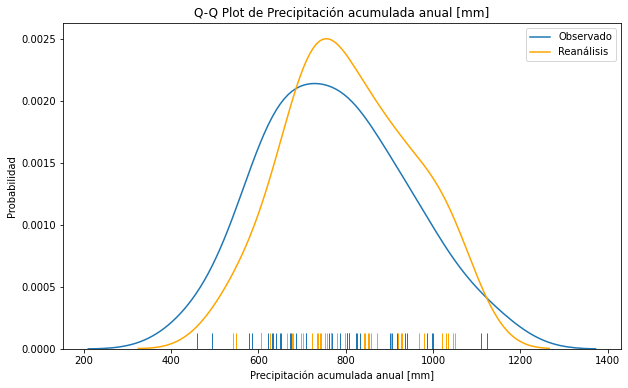

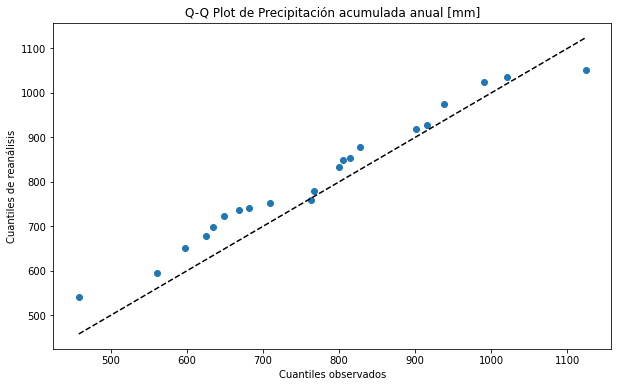

Kolmogorov_Smirnov: statistic: 0.216 p-value: 0.356
Observado: media: 773.354 mediana: 767.700 sd: 158.624
Reanálisis: media: 809.576 mediana: 780.120 sd: 138.045

Variable: prcp_obs_acumulado
Estación: Marcos Juarez INTA


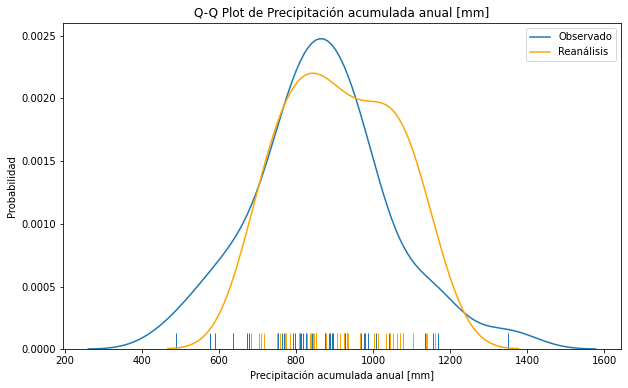

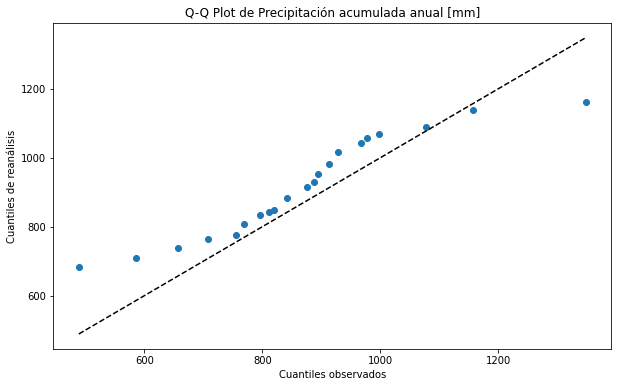

Kolmogorov_Smirnov: statistic: 0.189 p-value: 0.528
Observado: media: 867.905 mediana: 876.200 sd: 171.706
Reanálisis: media: 915.830 mediana: 914.285 sd: 137.542

Variable: prcp_obs_acumulado
Estación: Rio Cuarto Aero


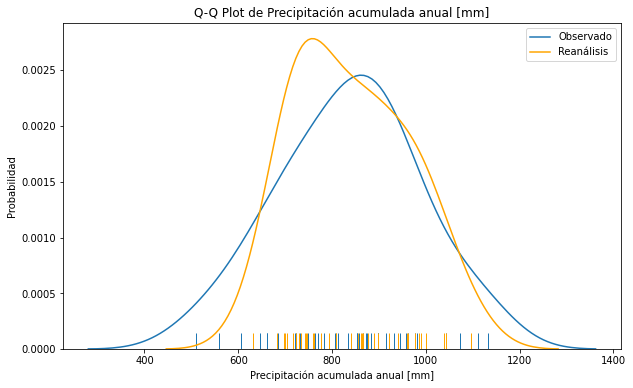

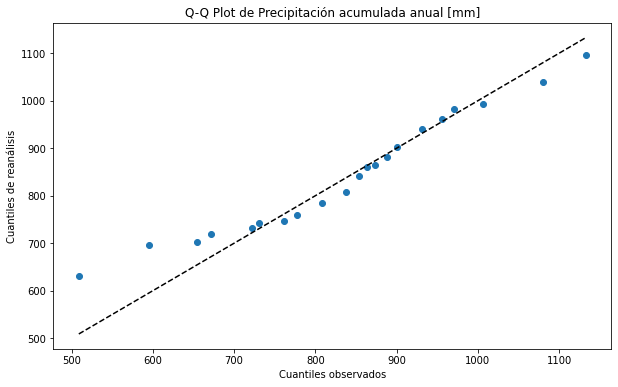

Kolmogorov_Smirnov: statistic: 0.135 p-value: 0.894
Observado: media: 835.265 mediana: 853.500 sd: 146.239
Reanálisis: media: 841.304 mediana: 841.102 sd: 118.206

Variable: prcp_obs_acumulado
Estación: La Florida


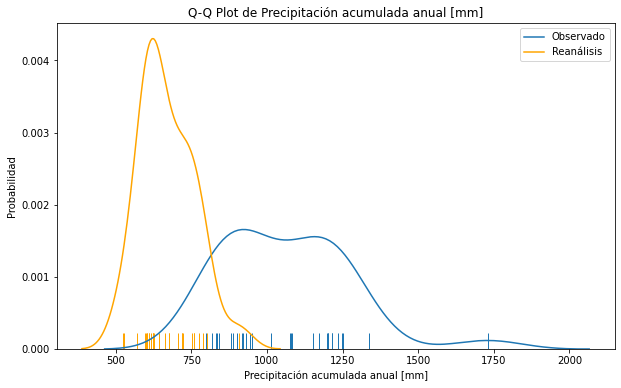

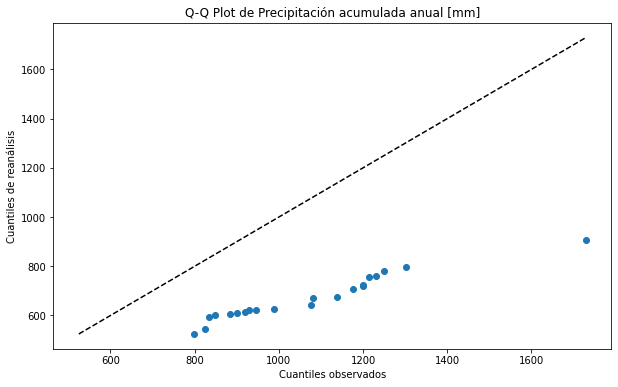

Kolmogorov_Smirnov: statistic: 0.931 p-value: 0.000
Observado: media: 1064.710 mediana: 1076.500 sd: 203.712
Reanálisis: media: 670.084 mediana: 641.813 sd: 87.134

Variable: prcp_obs_max
Estación: Pilar Obs.


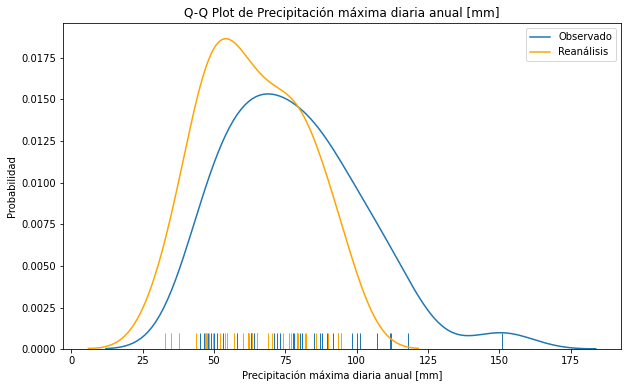

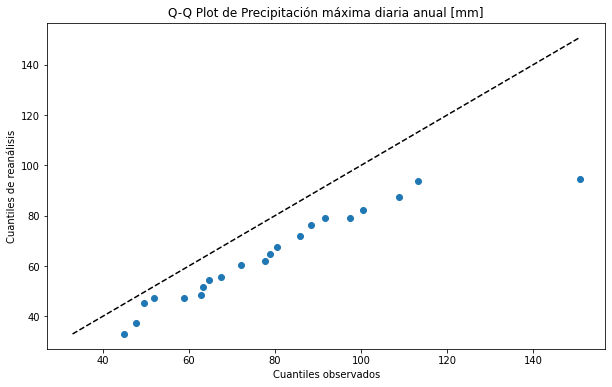

Kolmogorov_Smirnov: statistic: 0.270 p-value: 0.135
Observado: media: 78.135 mediana: 77.800 sd: 23.353
Reanálisis: media: 63.800 mediana: 62.151 sd: 17.229

Variable: prcp_obs_max
Estación: Marcos Juarez INTA


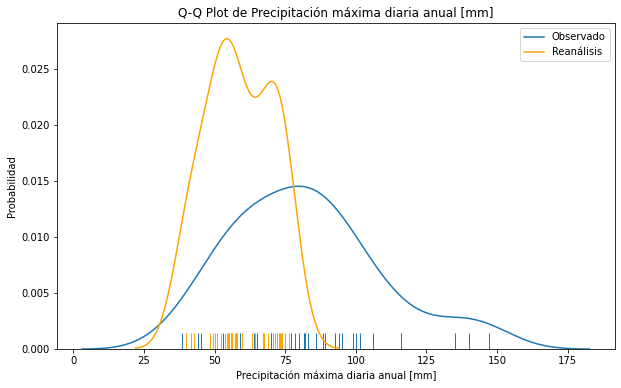

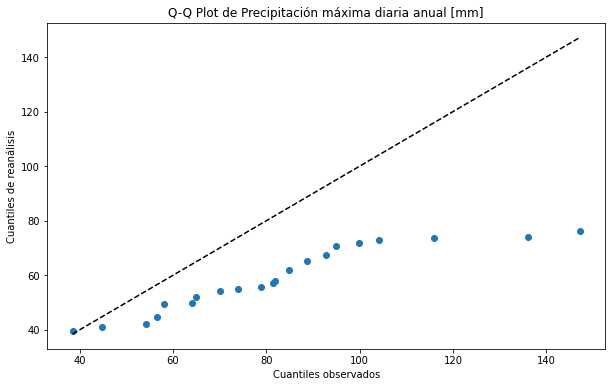

Kolmogorov_Smirnov: statistic: 0.595 p-value: 0.000
Observado: media: 82.192 mediana: 81.500 sd: 25.905
Reanálisis: media: 58.753 mediana: 57.149 sd: 11.359

Variable: prcp_obs_max
Estación: Rio Cuarto Aero


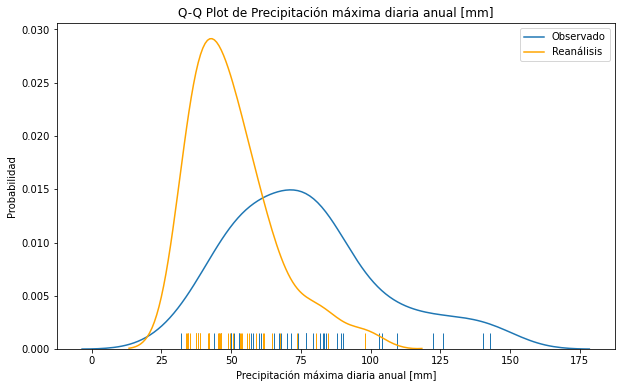

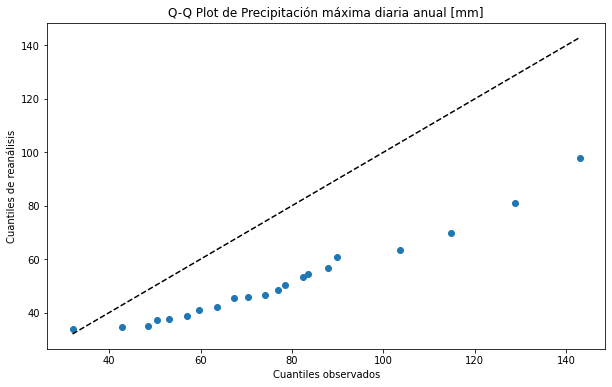

Kolmogorov_Smirnov: statistic: 0.514 p-value: 0.000
Observado: media: 76.424 mediana: 74.000 sd: 26.753
Reanálisis: media: 50.655 mediana: 46.510 sd: 14.997

Variable: prcp_obs_max
Estación: La Florida


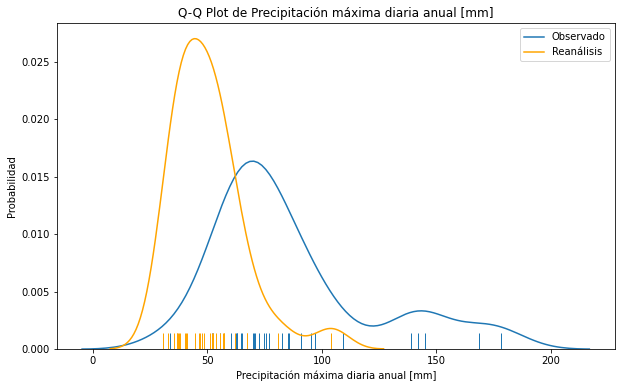

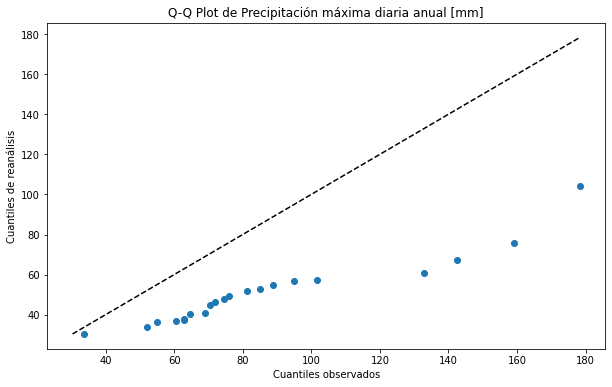

Kolmogorov_Smirnov: statistic: 0.690 p-value: 0.000
Observado: media: 86.228 mediana: 74.500 sd: 35.177
Reanálisis: media: 50.309 mediana: 47.775 sd: 15.394

Variable: dia_lluvioso_obs
Estación: Pilar Obs.


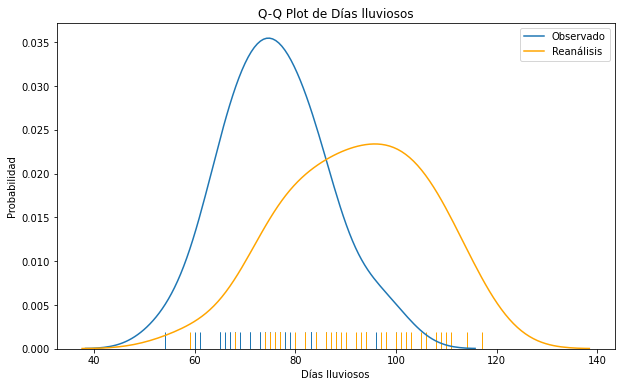

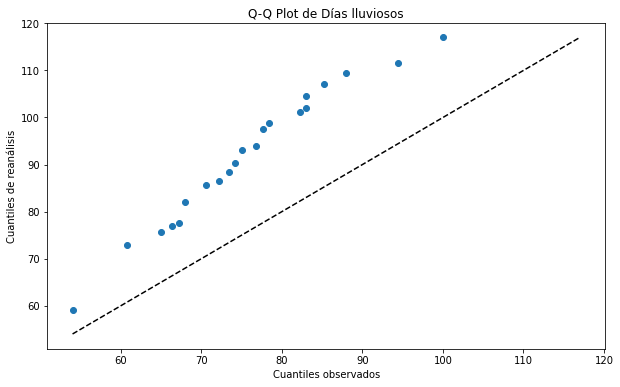

Kolmogorov_Smirnov: statistic: 0.541 p-value: 0.000
Observado: media: 75.973 mediana: 75.000 sd: 10.036
Reanálisis: media: 92.135 mediana: 93.000 sd: 13.674

Variable: dia_lluvioso_obs
Estación: Marcos Juarez INTA


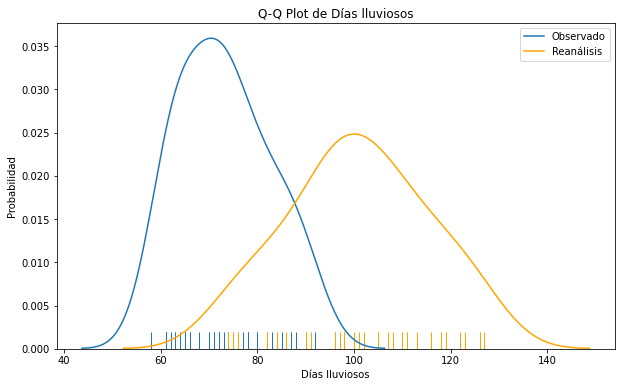

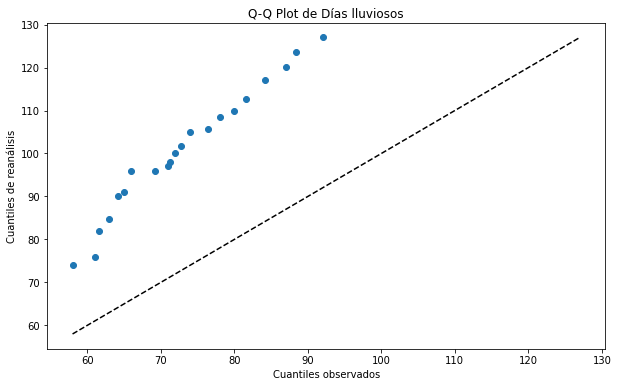

Kolmogorov_Smirnov: statistic: 0.757 p-value: 0.000
Observado: media: 73.135 mediana: 72.000 sd: 9.154
Reanálisis: media: 100.865 mediana: 100.000 sd: 14.106

Variable: dia_lluvioso_obs
Estación: Rio Cuarto Aero


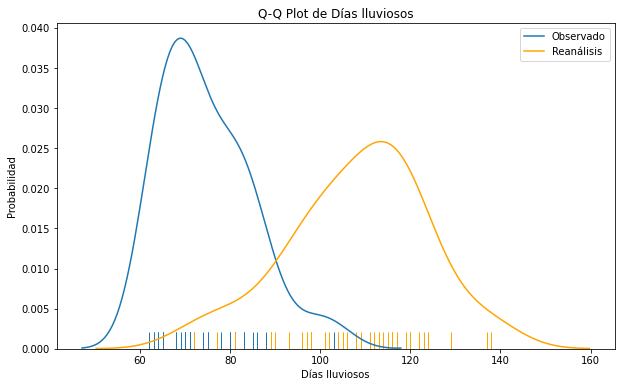

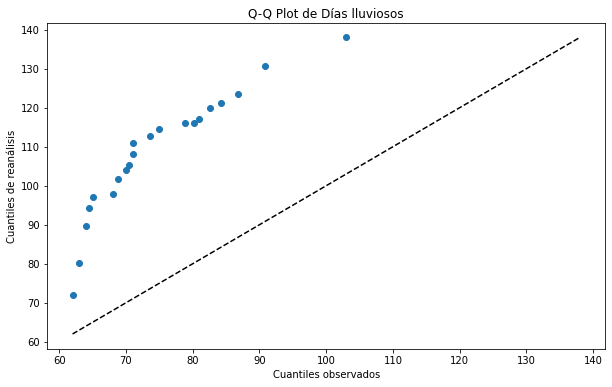

Kolmogorov_Smirnov: statistic: 0.838 p-value: 0.000
Observado: media: 74.757 mediana: 71.000 sd: 9.857
Reanálisis: media: 108.324 mediana: 111.000 sd: 14.912

Variable: dia_lluvioso_obs
Estación: La Florida


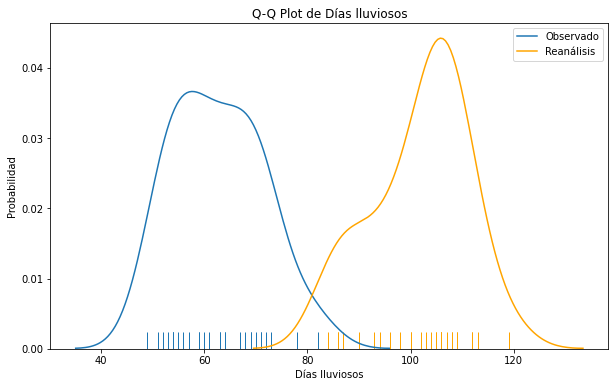

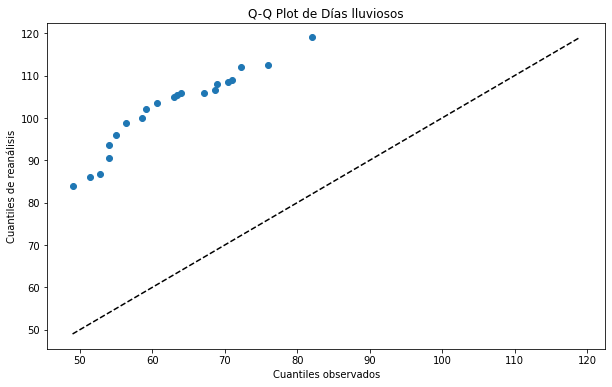

Kolmogorov_Smirnov: statistic: 1.000 p-value: 0.000
Observado: media: 62.690 mediana: 63.000 sd: 8.416
Reanálisis: media: 101.862 mediana: 105.000 sd: 8.908


In [ ]:
# Comparación de variables observadas y derivadas de TerraClimate
for variable_index in range(len(variable_df)):
  variable_obs = variable_df.at[variable_index,'variable_obs']
  variable_chirps = variable_df.at[variable_index,'variable_chirps']
  variable_titulo = variable_df.at[variable_index,'variable_titulo']

  data_points = merged_dataset_prcp[['omm_id', variable_obs, variable_chirps]]

  for station in omm_id:
    station_name = stations_filtered[stations_filtered['omm_id'] == station].nombre.item()
    print(f'\nVariable: {variable_obs}')
    print(f'Estación: {station_name}')
    
    station_data = data_points[data_points['omm_id'] == station].dropna()

    if (~station_data[variable_obs].isnull().values.all()):

      # Densidad empírica
      plt.figure(figsize=(10,6))
      sns.kdeplot(station_data[variable_obs], label = 'Observado')
      sns.rugplot(station_data[variable_obs])
      sns.kdeplot(station_data[variable_chirps], label = "Reanálisis", color = 'orange')
      sns.rugplot(station_data[variable_chirps], color = 'orange')
      plt.ylabel('Probabilidad')
      plt.xlabel(variable_titulo)
      plt.title('Q-Q Plot de %s' % (variable_titulo))
      #plt.title('Densidad empírica de: %s' % (variable_titulo))
      plt.show()
      
      # Q-Q Plot
      plt.figure(figsize=(10,6))
      percs = np.linspace(0,100,21)
      qn_a = np.percentile(station_data[variable_obs], percs)
      qn_b = np.percentile(station_data[variable_chirps], percs)
    
      plt.plot(qn_a,qn_b, ls="", marker="o")
      x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
      plt.plot(x,x, color="k", ls="--")
      plt.ylabel('Cuantiles de reanálisis')
      plt.xlabel('Cuantiles observados')
      plt.title('Q-Q Plot de %s' % (variable_titulo))
      plt.show()

      
      # Shapiro test for two samples
      resultado = stats.ks_2samp(station_data[variable_obs], station_data[variable_chirps])
      print('Kolmogorov_Smirnov: statistic: %.3f p-value: %.3f'  % (resultado[0], resultado[1])) 
    
      # Metricas generales
      print('Observado: media: %.3f mediana: %.3f sd: %.3f' % (np.mean(station_data[variable_obs]), np.median(station_data[variable_obs]), np.std(station_data[variable_obs])))
      print('Reanálisis: media: %.3f mediana: %.3f sd: %.3f' % (np.mean(station_data[variable_chirps]), np.median(station_data[variable_chirps]), np.std(station_data[variable_chirps])))

      # Media de las diferencias (geometric mean difference)
      # Calculo:  raíz n-ésima del producto de todos los números
      # Al ser la diferencia un valor proximo a cero indican mayor similitud. 
      # Esta metrica es más robusta que la media aritmética y se comporta mejor 
      # con datos autocorrelacionados.
      media_diff = hs.g_mean_diff(station_data[variable_obs], station_data[variable_chirps])

      # Coeficiente de correlacion de Pearson
      # Range: -1, 1.
      # Interpretación: Valor positivos indican correlación positiva, negativos correlación negativa
      # y valores próximos a 0, ninguna correlación
      corr, _ = stats.pearsonr(station_data[variable_obs], station_data[variable_chirps])

      # Correlacion de las anomlias
      # Range: -1 ≤ ACC ≤ 1. -1 indicates perfect negative correlation of the 
      # variation pattern of the anomalies, 0 indicates complete randomness of 
      # the variation patterns of the anomalies, 1 indicates perfect correlation 
      # of the variation pattern of the anomalies.
      acc = hs.acc(station_data[variable_obs], station_data[variable_chirps])

      # Kling-Gupta efficiency
      # Rango: -inf < KGE (2012) < 1
      kge = hs.kge_2012(station_data[variable_obs], station_data[variable_chirps])

      # Nash-Sutcliffe Efficiency
      # Range: -inf < NSE < 1, does not indicate bias, larger is better.
      # Notes: The Nash-Sutcliffe efficiency metric compares prediction values to 
      # naive predictions (i.e. average value). One major flaw of this metric 
      #is that it punishes a higher variance in the observed values (denominator). 
      nse = hs.nse(station_data[variable_obs], station_data[variable_chirps])

      # Distancia euclidia
      # Range 0 ≤ ED < inf, smaller is better. 
      #dist_euclidia = hs.ed(station_data[variable_obs], station_data[variable_terra])

      # Distancia euclidia normalizada
      # Range 0 ≤ ED < inf, smaller is better. 
      ned = hs.ned(station_data[variable_obs], station_data[variable_chirps])

      # Concordancia d
      # Range: 0 ≤ d < 1, does not indicate bias, larger is better.
      d = hs.d(station_data[variable_obs], station_data[variable_chirps])

      # Mean absolute error
      # Range: 0 ≤ MAE < inf, data units, smaller is better.
      # measures the absolute difference between the simulated data and the observed data. 
      # For the mean abolute error, a smaller number indicates a better fit to 
      # the original data. 
      mae = hs.mae(station_data[variable_obs], station_data[variable_chirps])

      # Mean error
      # Range -inf < MdE < inf, closer to zero is better.
      me = hs.me(station_data[variable_obs], station_data[variable_chirps])

      # Median error
      # Range -inf < MdE < inf, closer to zero is better.
      # Notes This metric indicates bias. It is similar to the mean error (ME)
      mde = hs.mde(station_data[variable_obs], station_data[variable_chirps])

      # Root mean square error 
      # Range 0 ≤ RMSE < inf, smaller is better.
      # Notes: The standard deviation of the residuals. A lower spread indicates 
      # that the points are better concentrated around the line of best fit (linear). 
      # Random errors do not cancel. This metric will highlights larger errors.
      rmse = hs.rmse(station_data[variable_obs], station_data[variable_chirps])

      # Range normalized root mean square error
      # Range: 0 ≤ NRMSE < inf.
      # Notes: This metric is the RMSE normalized by the range of the observed time series (x).
      # Normalizing allows comparison between data sets with different scales. 
      #The NRMSErange is the most sensitive to outliers of the three normalized rmse metrics.
      nrmse_range = hs.nrmse_range(station_data[variable_obs], station_data[variable_chirps])

      # IQR normalized root mean square error 
      # Range: 0 ≤ NRMSE < inf.
      # Notes: This metric is the RMSE normalized by the interquartile range of the
      # observed time series (x). Normalizing allows comparison between data sets 
      # with different scales. The NRMSEquartile is the least sensitive to outliers 
      # of the three normalized rmse metrics.
      nrmse_iqr = hs.nrmse_iqr(station_data[variable_obs], station_data[variable_chirps])

      # Mean normalized root mean square error
      # Range: 0 ≤ NRMSE < inf.
      # Notes: This metric is the RMSE normalized by the mean of the observed time 
      # series (x). Normalizing allows comparison between data sets with different scales.
      nrmse_mean = hs.nrmse_mean(station_data[variable_obs], station_data[variable_chirps])

      # Inertial root mean square error 
      # Range: 0 ≤ IRMSE < inf, lower is better.
      # Notes: This metric is the RMSE devided by by the standard deviation of 
      # the gradient of the observed timeseries data. This metric is meant to 
      # be help understand the ability of the model to predict changes in observation.
      irmse = hs.irmse(station_data[variable_obs], station_data[variable_chirps])

      metrics = metrics.append({'variables':variable_obs, 'omm_id':station, 'g_mean_diff':media_diff, 'pearsonr':corr, 'acc':acc, 'kge_2012':kge, 'nse':nse,
                      'ned':ned, 'd':d, 'mae':mae, 'me':me, 'mde':mde, 'rmse':rmse, 'nrmse_range':nrmse_range, 'nrmse_iqr':nrmse_iqr,
                      'nrmse_mean':nrmse_mean, 'irmse':irmse}, 
                 ignore_index = True) 
    
    else:
      print('No hay datos observados para esta variable:', variable_obs)



### Comparación de variables:

Las distintas variables se compararon a través de métodos gráficos como los gráficos de densidad y los Q-Q plots y analíticamente a través de la media, mediana y desvío estándar así como una prueba de Kolmogorov-Smirnov para comprobar si las distribuciones son las mismas o no. Las estaciones oficiales (Río Cuarto y Pilar) son utilizadas para corregir la estimación hecha por el sensor remoto infrarrojo. La estación de INTA MArcos Juárez está muy próxima a la oficial de la misma localidad mientras que La Florida no está incluida en la etapa de corrección. 

* Precipitación acumulada anual:  Para las estaciones de Rio Cuarto, Pilar y Marcos Juarez las medias son bastante similares aunque se subestiman sistemáticamente los valores extremos tanto en la cola izquierda como en la derecha de la distribución. La Flroida tiene una distribución bastante percualiar que no es bien representada por el producto de CHIRPS. Esta es severamente subestimada para todos los cuantiles de la distribución. 
* Precipitación máxima diaria: Es subestimada para todas las estaciones, con diferencias en la media del orden de 30 mm. En los Q-Q Plots se observa que en a partir de 60 - 80 mm los cuantiles comienzan a separarse. Esto se debe a que el sensor se satura y no es capaz de identificar la cantidad de lluvia que contiene una nube por encima de un determinado valor. En estos casos es que la corrección de tierra es de vital importancia pero dado que en esta región las estaciones son muy escasas, las correcciones son pobres. 
* Días lluviosos: Los días lluviosos se definen como aquellos con una precipitación mayor a 0.1 mm. CHIRPS sobreestima la cantidad de días por años hidrológica, incluso duplicando la cantidad de días por año. Si se considera que la precipitación acumulada anual no difere tanto, esto quiere decir que hay una mayor cantidad de días con precipitaciones bajas. Es decir, la densidad de probabilidad de acumulados bajos es mayor para CHIRPS que para los datos observados (datos no mostrados). Además, como se mencionó más arriba, las precipitaciones elevadas fueron subestimadas por lo que está diferencia es compensada por la mayor cantidad de días lluviosos. 

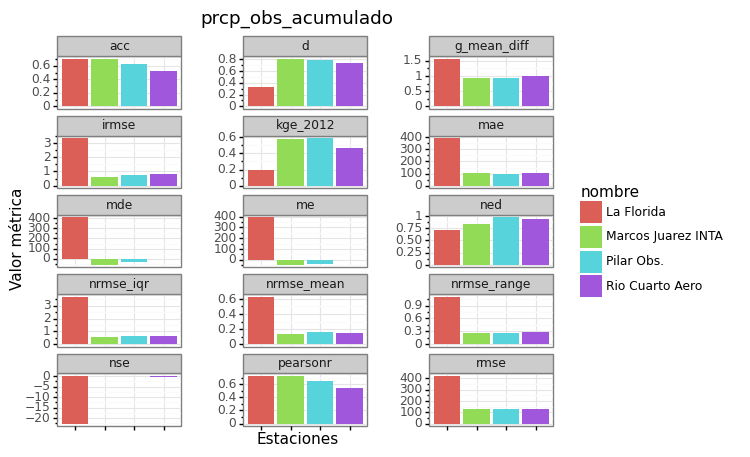

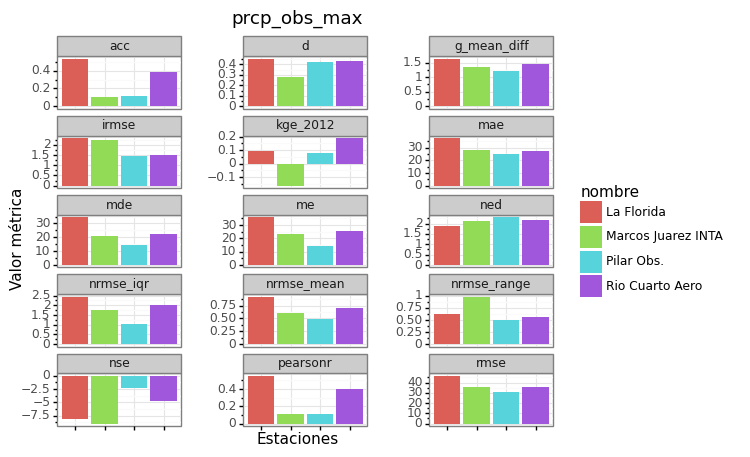

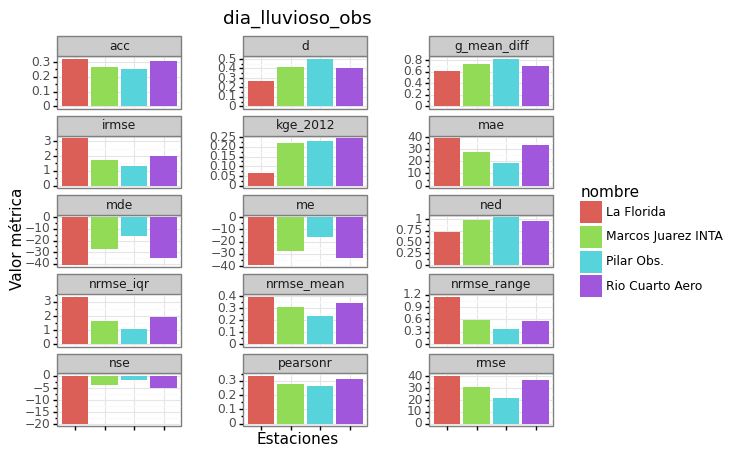

In [ ]:
# Analisis de metricas
metric_by_variable = pd.melt(metrics, id_vars=['variables', 'omm_id'], value_vars=['g_mean_diff', 'pearsonr', 'acc', 'kge_2012', 'nse', 
           'ned', 'd', 'mae', 'me', 'mde', 'rmse', 'nrmse_range', 'nrmse_iqr', 'nrmse_mean', 'irmse'])

metric_by_variable = pd.merge(metric_by_variable, stations_filtered, on = 'omm_id')

for variable in metric_by_variable.variables.unique():
  metric_per_variable = metric_by_variable[metric_by_variable['variables'] == variable]


  g = ggplot(metric_per_variable, aes(x = 'nombre', y='value', fill= 'nombre')) + \
      geom_bar(stat='identity') + \
      facet_wrap(['variable'], scales = 'free_y', ncol = 3) + \
      theme_bw() + \
      theme(axis_text_x = element_blank(), subplots_adjust={'wspace': .5}) + \
      labs(title = variable, x='Estaciones', y='Valor métrica')
  g.draw()
  #print('Comparación de la variable: ', variable)


### Comparación métricas

Para comparar las series de las variables temporales se utilizaron una serie de métricas que consideran distintas propiedades de las mismas. Las figuras muestran los distintos valores que tomaron las métricas.

* La correlación entre las series se evalúo a través del coeficiente de correlación de Pearson (pearsonr) y las anomalías (acc) de dicho indicador. Ambos indicadores tienen la misma interpretación, valores próximos a |1| están altamente relacionados y valores próximos a 0 indican la ausencia de asociación. Al utilizar ambos indicadores se puede evaluar la asociación lineal en toda la serie y  evaluar si tmbién hay una asociación en el patrón de variación.
* La concordancia se evaluó a través del índice de concordancia (d), no indica el sesgo pero mientras más alto sea el valor, mejor. 
* Los erroes se evaluaron a través del Error Medio Absoluto (mae), Mediana del Error (mde), Error medio (me), Distancia Euclidia Normalizada (ned), Raíz del error cuadrático medio (rmse), Raíz del Error Cuadrático Medio Normalizado por distintas métricas, IQR, media, rango (nrmse_iqr, nrmse_mean, nrmse_range).
* La eficiencia se valuó a través del índice de eficiencia Nash-Sutcliffe (nde) y del Kling-Gupta  (kge_2012).

### Resultados

* Precipitación acumulada anual: En este caso es interesante comparar las medidas de correlación con los errores. Por ejemplo, para La FLorida la correlación es las más alta entre las estaciones dado que la relación lineal entre ambas variables es alta. Sin embargo, los errores, alrededor de 400 mm, en esta misma estación son los más altos debido a la severa subestimación de los montos. Esto pone en evidencia que se deben utilizar varias métricas para caracterizar la relación entre variables. Sin emgargo, para las demás estaciones los resultados no fueron superlativos aunque si mejores que para La Florida. 
* Precipitación máxima diaria: Los resultados fueron pobres para todas las estaciones. 
* Días lluviosos: Los resultados fueron pobres para todas las estaciones. 



Procesando la estación:  La Florida
1


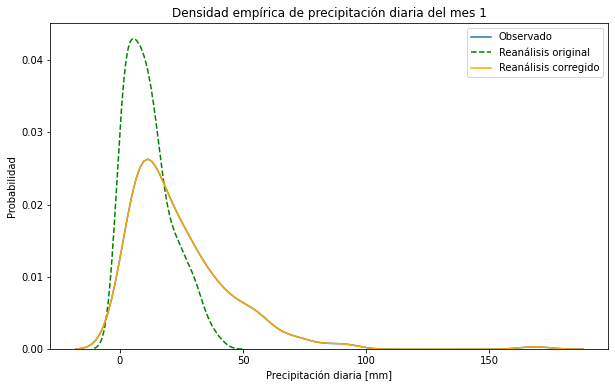

2


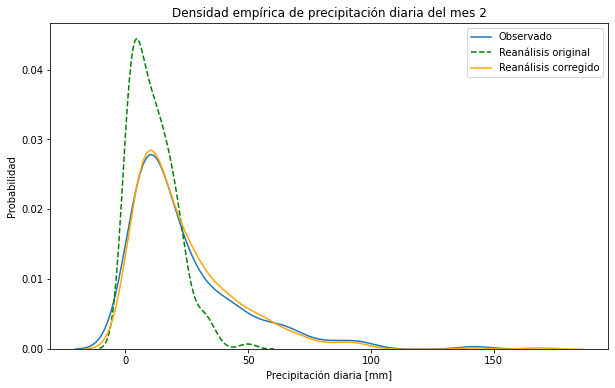

3


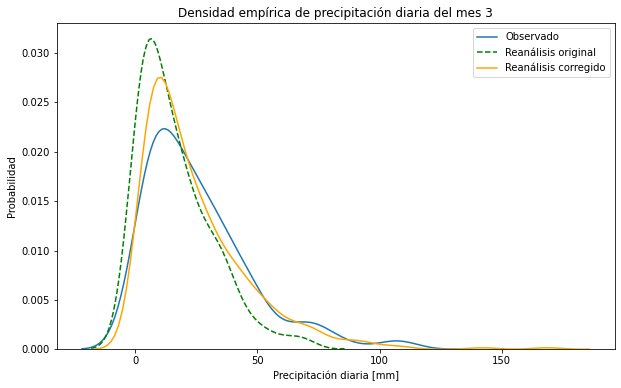

4


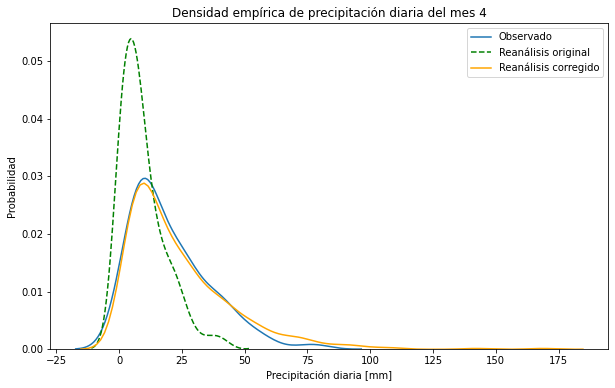

5


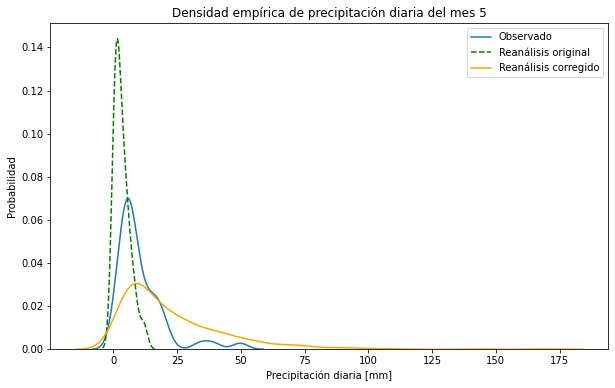

6


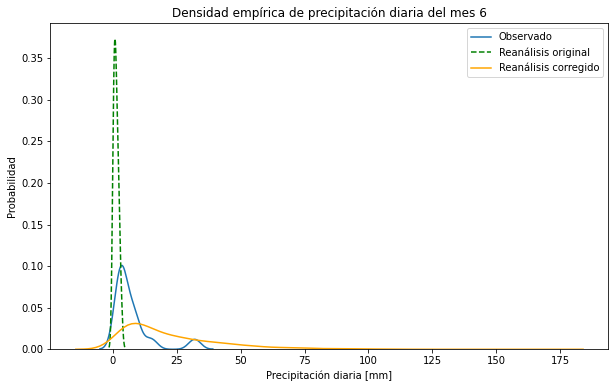

7


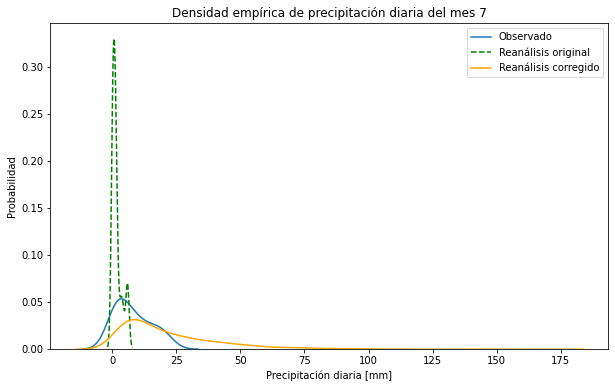

8


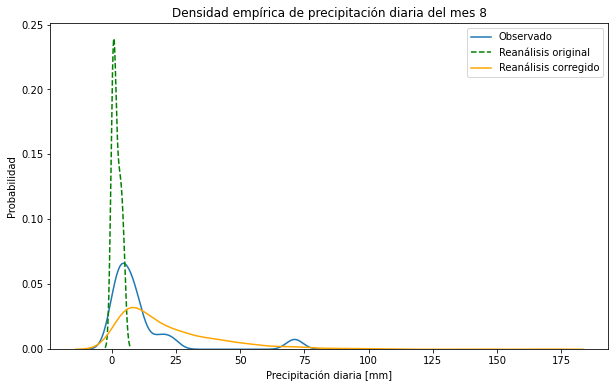

9


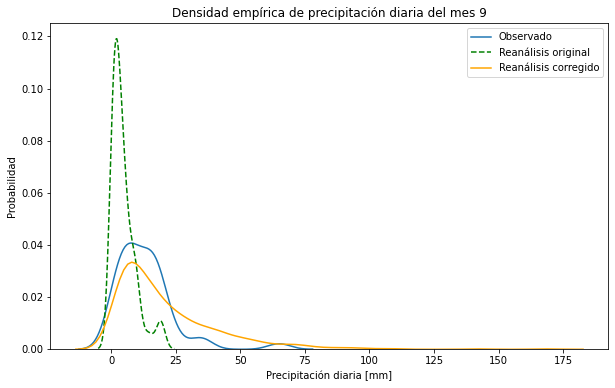

10


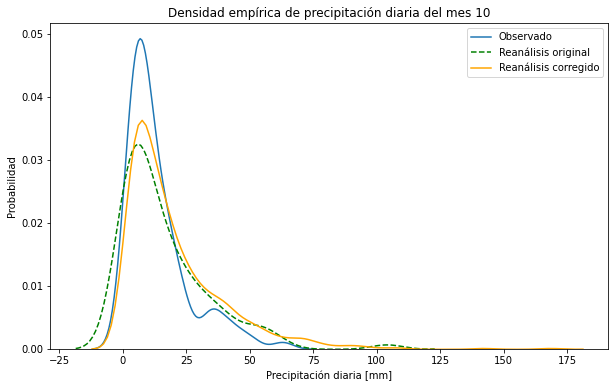

11


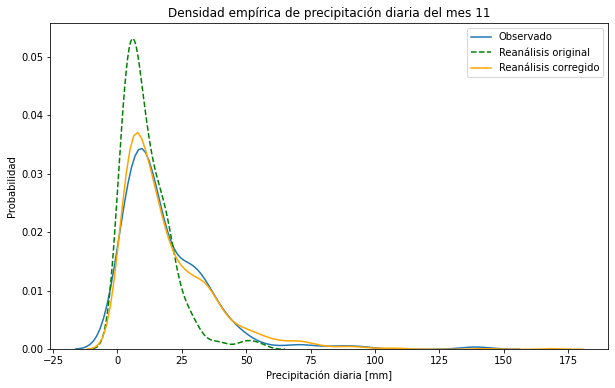

12


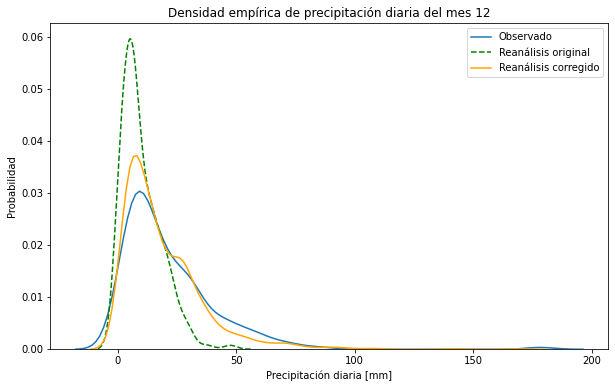

Procesando la estación:  Pilar Obs.
1


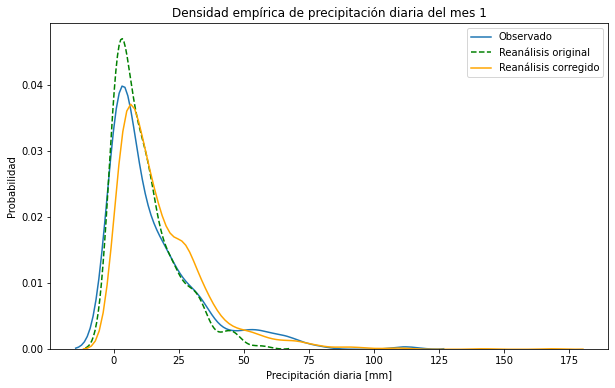

2


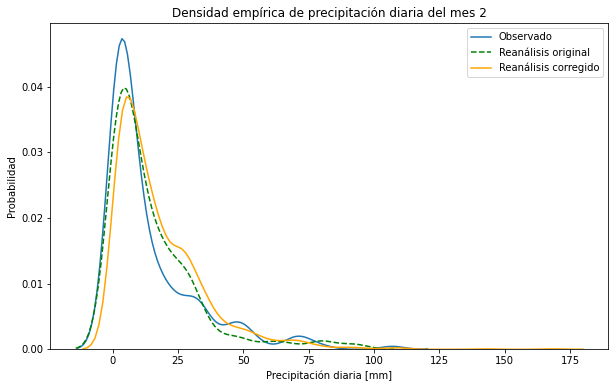

3


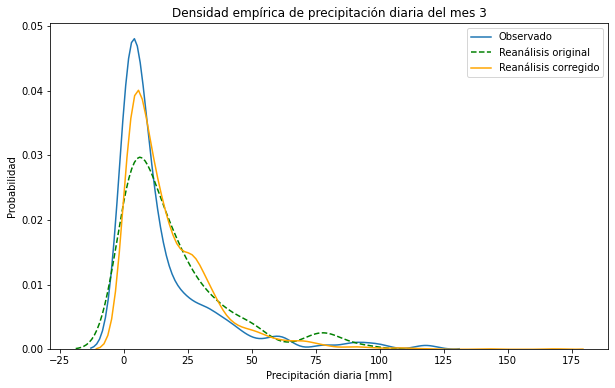

4


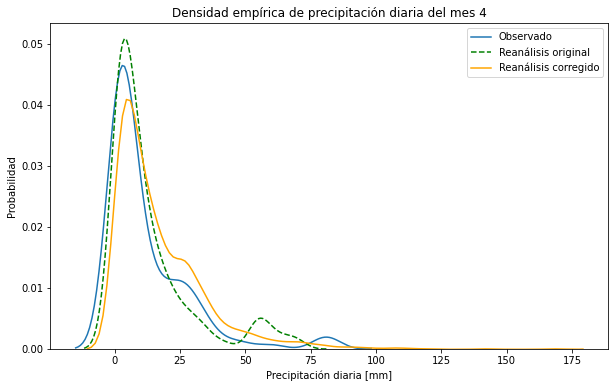

5


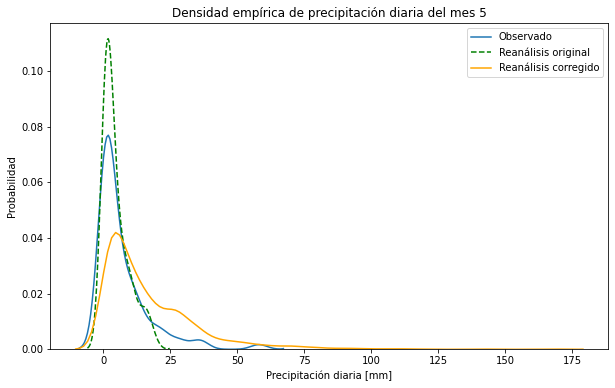

6


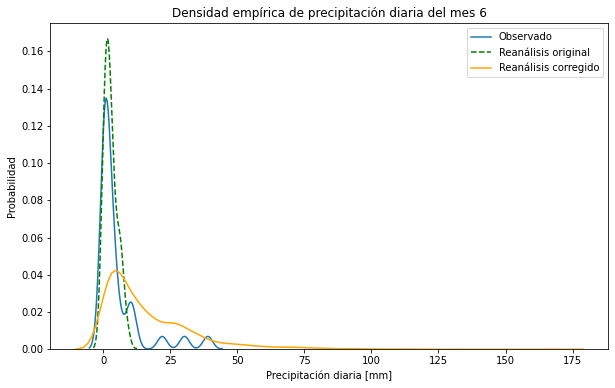

7


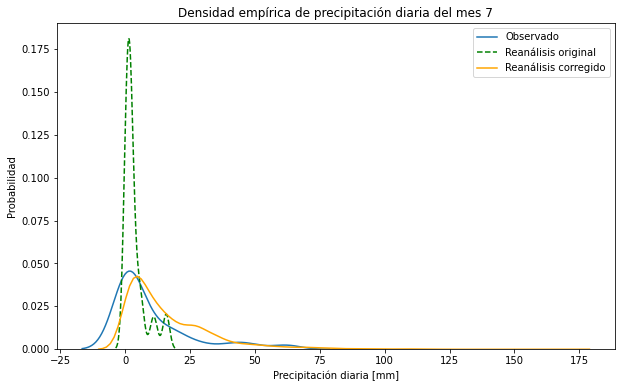

8


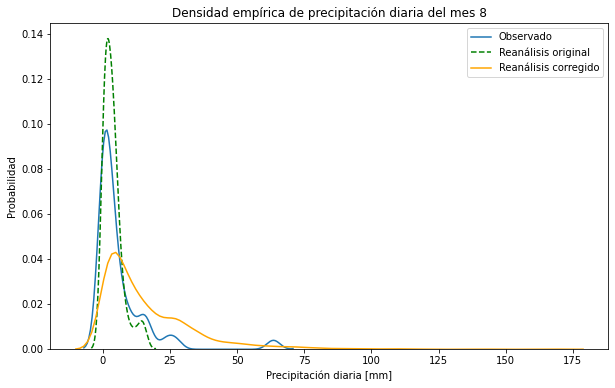

9


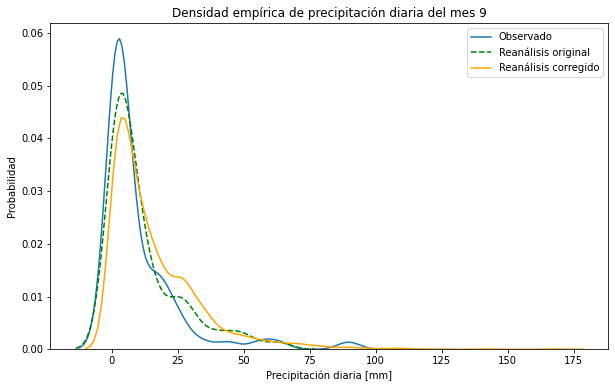

10


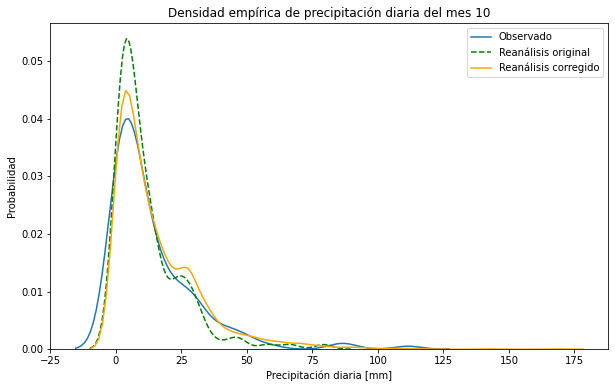

11


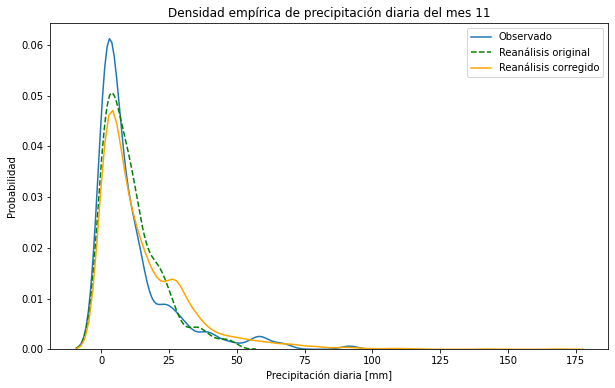

12


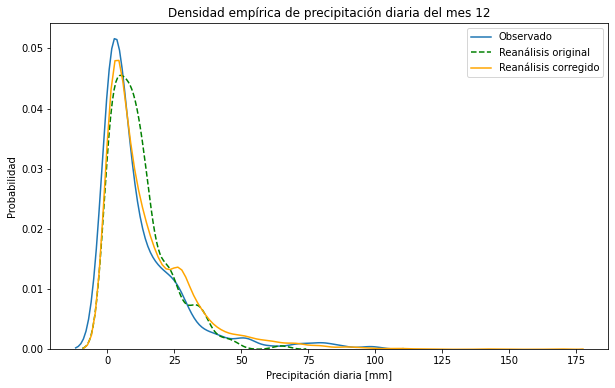

Procesando la estación:  Rio Cuarto Aero
1


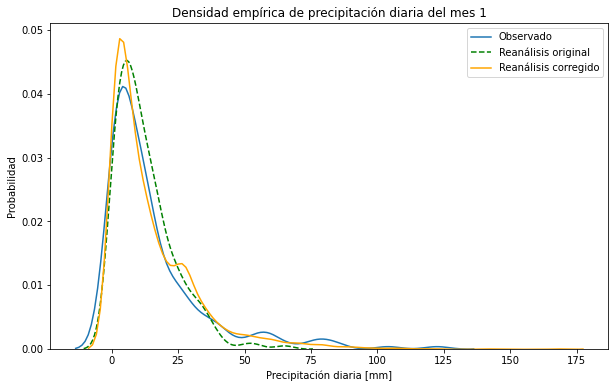

2


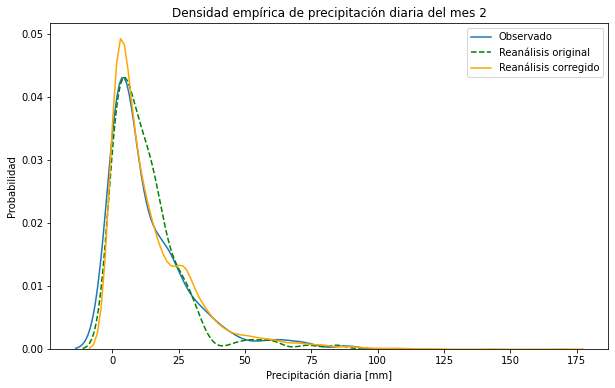

3


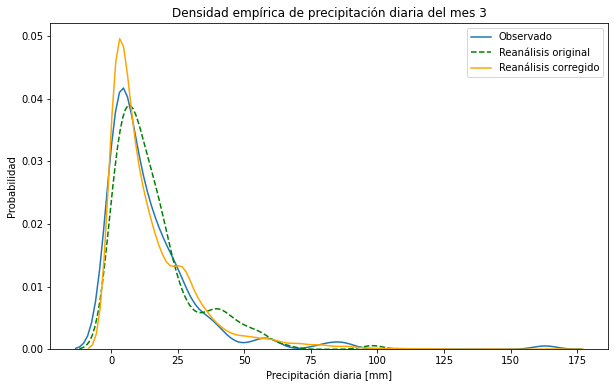

4


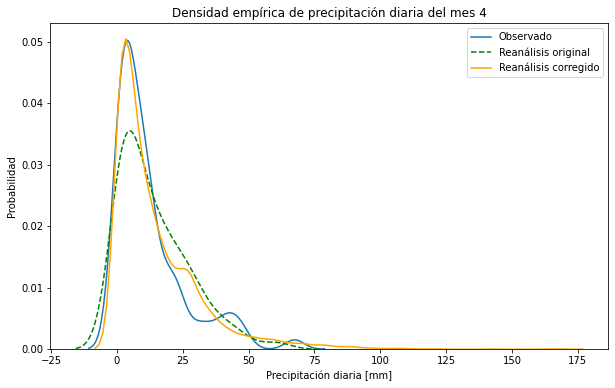

5


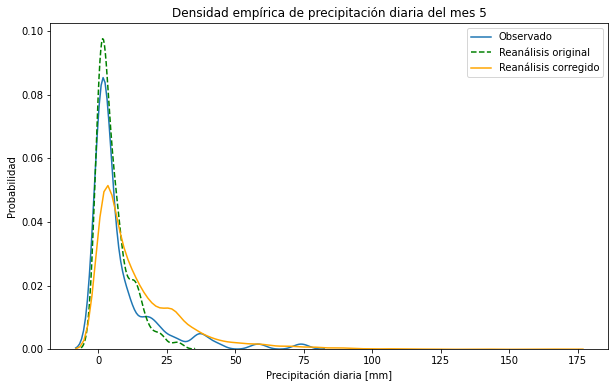

6


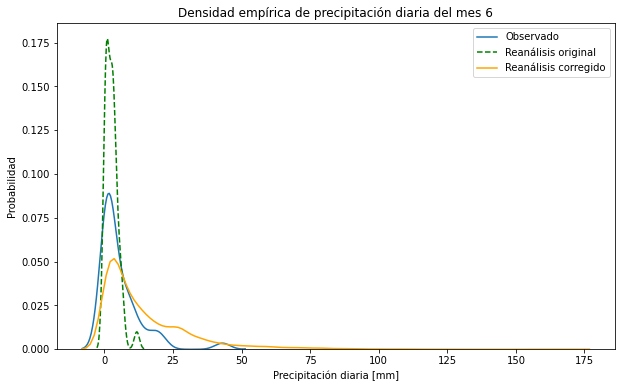

7


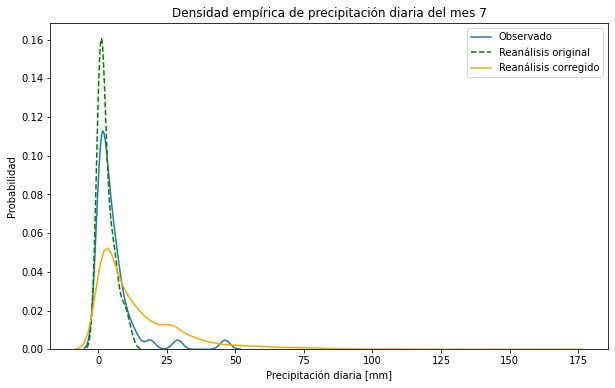

8


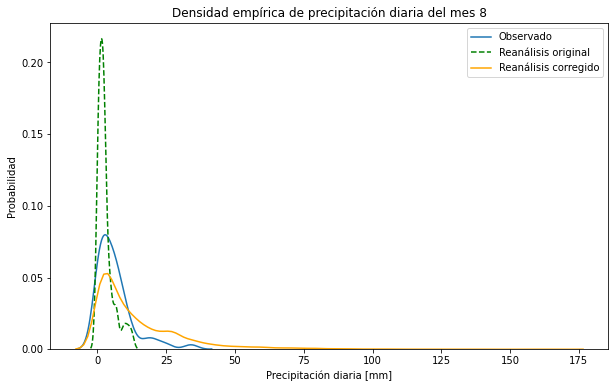

9


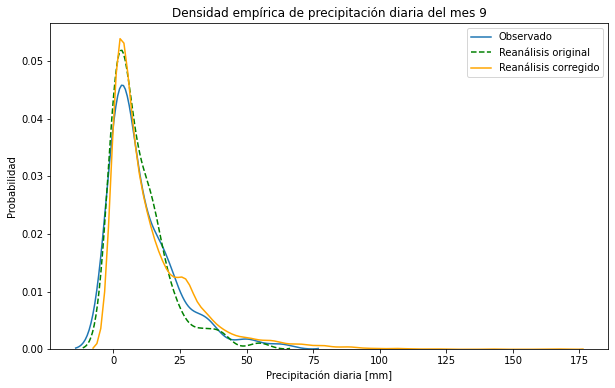

10


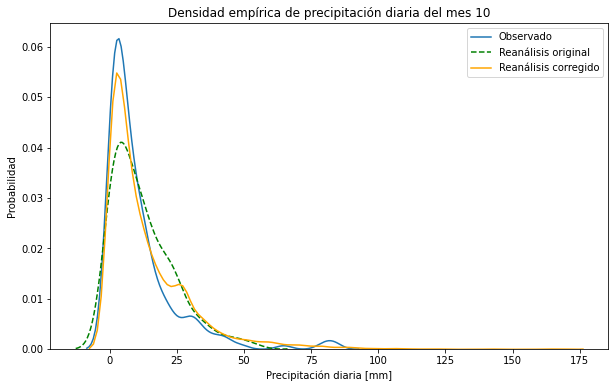

11


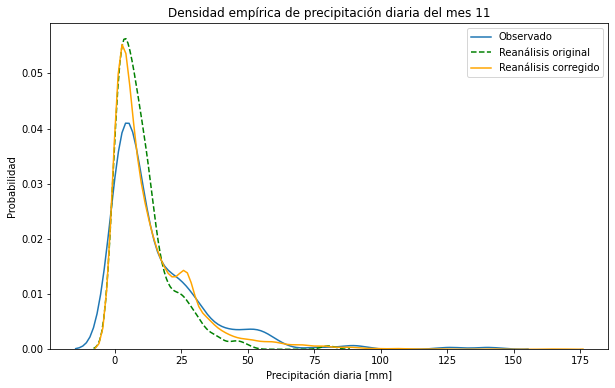

12


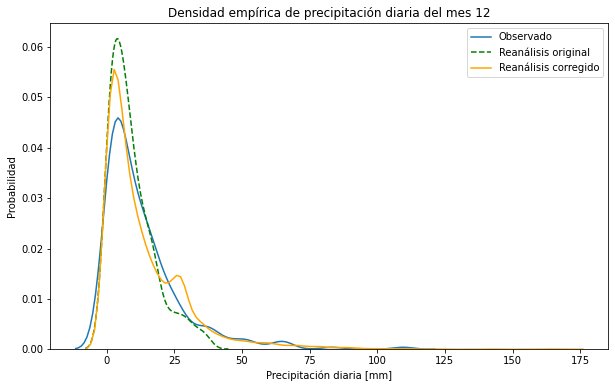

Procesando la estación:  Marcos Juarez INTA
1


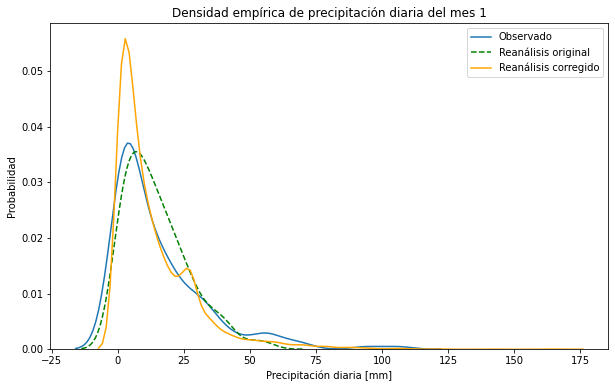

2


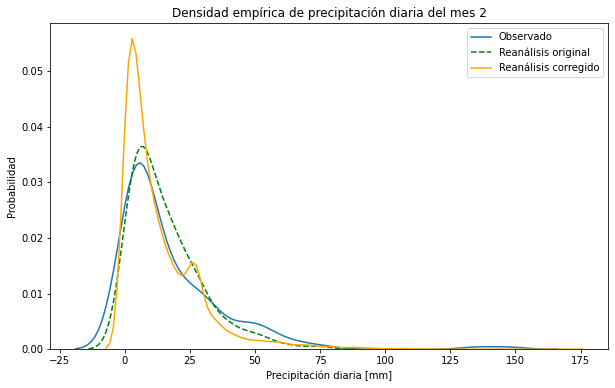

3


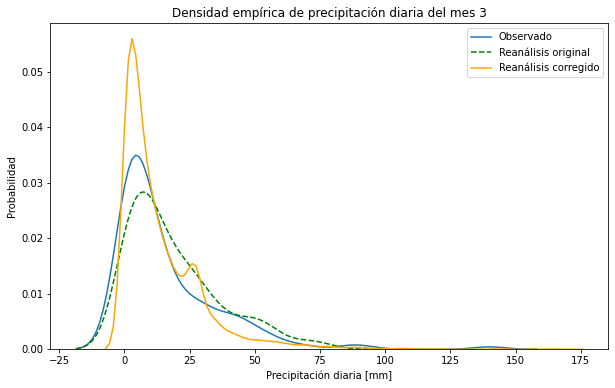

4


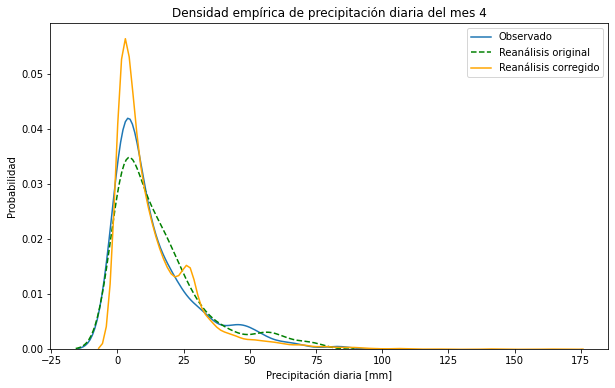

5


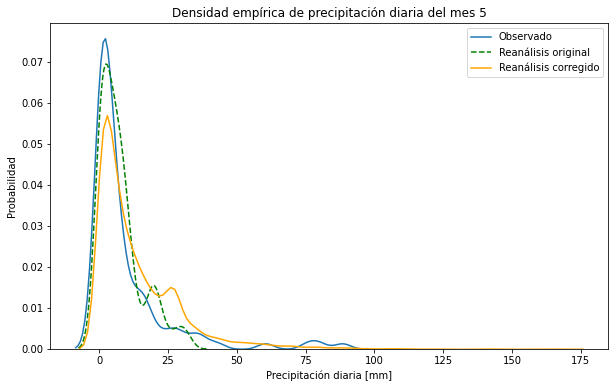

6


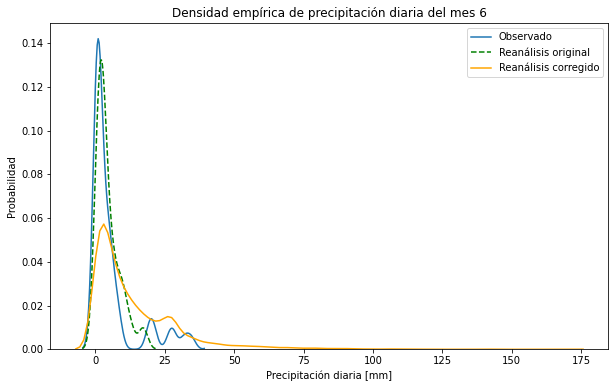

7


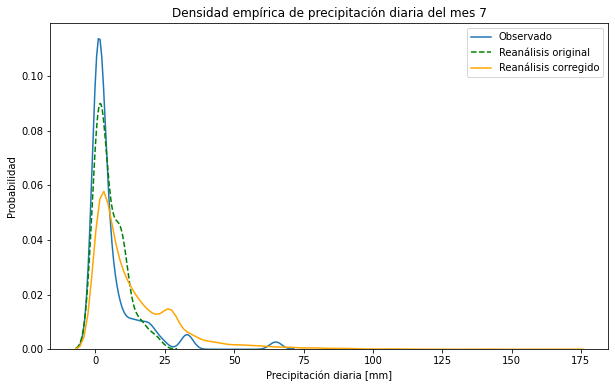

8


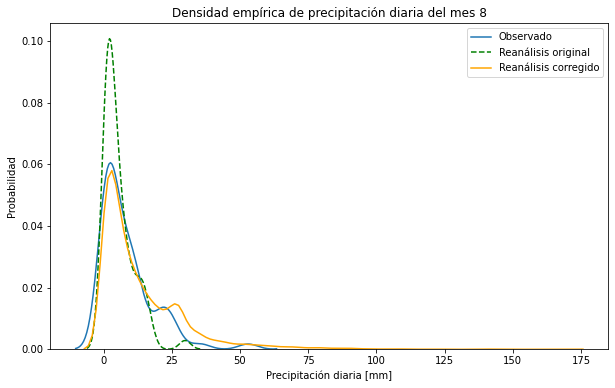

9


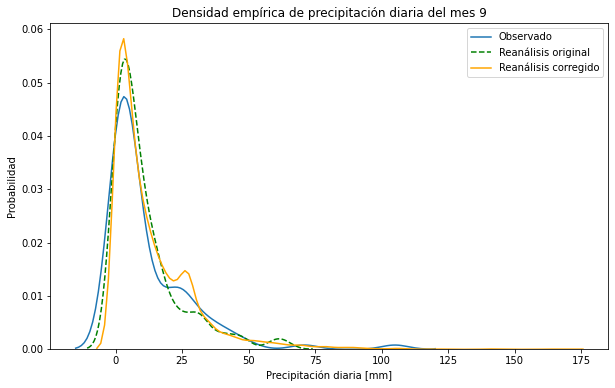

10


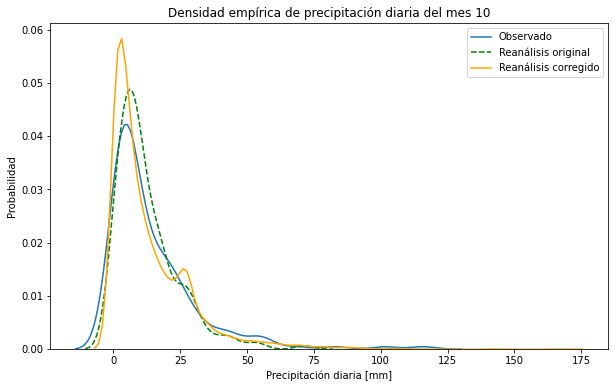

11


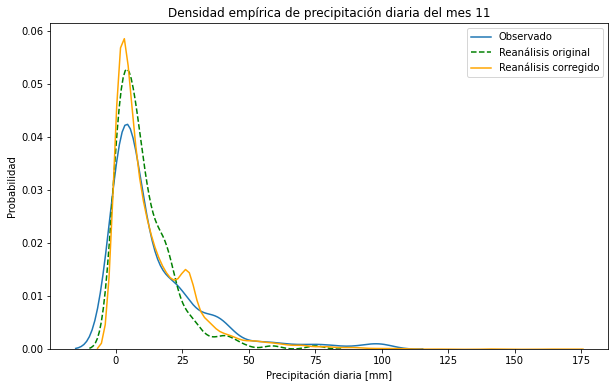

12


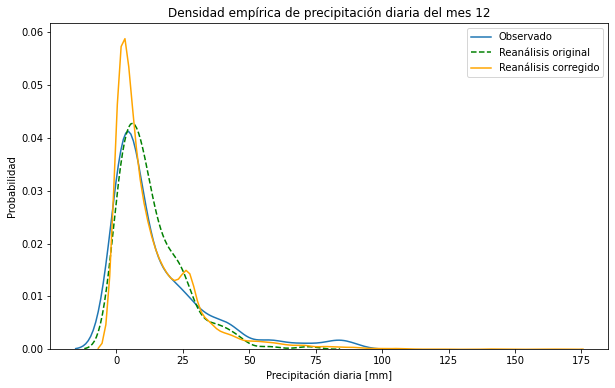

In [ ]:
# Corregir sesgo (Bias correction)
#variables_corregir = [('prcp', 'prcp_chirps'), ('tmin', 'Temp_Min')]

dataset_chirps_corregir = dataset_chirps.copy()
dataset_chirps_corregir = dataset_chirps_corregir[dataset_chirps_corregir['prcp_chirps'] > 0.1]

dataset_obs_corregir = dataset_filtered.copy()
dataset_obs_corregir = dataset_obs_corregir[dataset_obs_corregir['prcp'] > 0.1]
dataset_obs_corregir = dataset_obs_corregir[['fecha', 'omm_id', 'prcp']] 

dataet_corregir = pd.merge(dataset_obs_corregir, dataset_chirps_corregir, how='inner', left_on=['fecha','omm_id'], right_on = ['Date','omm_id'])
dataet_corregir.dropna()
dataet_corregir['fecha'] = pd.to_datetime(dataet_corregir['fecha'])
dataet_corregir['dia'] = dataet_corregir['fecha'].dt.day
dataet_corregir['mes'] = dataet_corregir['fecha'].dt.month
dataet_corregir['ano'] = dataet_corregir['fecha'].dt.year

corrected_variables = dataet_corregir.loc[:,('ano', 'mes', 'dia', 'omm_id')]


for station in [1, 87349,87453,87466]:
  # Filtrar TerraClimate por estacion
  dataset_corregir_estacion = dataet_corregir[dataet_corregir['omm_id']  == station]
    
  station_name = stations_filtered[stations_filtered['omm_id'] == station].nombre.item()
  print('Procesando la estación:  %s' % (station_name))

  for mes in range(1, 13):

    print(mes)
        
    # Filtrar TerraClimate por mes
    dataset_corregir_estacion_mes = dataset_corregir_estacion[dataset_corregir_estacion['mes'] == mes].dropna()

    bc = BiasCorrection(dataset_corregir_estacion_mes.prcp, dataset_corregir_estacion_mes.prcp_chirps, dataset_corregir_estacion_mes.prcp_chirps)
    corrected = bc.correct(method='gamma_mapping')
     
    anos = dataset_corregir_estacion_mes.ano.unique()
    #meses = dataset_corregir_estacion_mes.mes.unique()
    dias = dataset_corregir_estacion_mes.dia.unique()
    Date = dataset_corregir_estacion_mes.Date

      
    corrected_variables.loc[(corrected_variables["ano"].isin(anos)) & (corrected_variables["mes"] == mes) & (corrected_variables['dia'].isin(dias)) & (corrected_variables['omm_id'] == station), 'prcp_chirps'] = corrected
    corrected_variables.loc[(corrected_variables["ano"].isin(anos)) & (corrected_variables["mes"] == mes) & (corrected_variables['dia'].isin(dias)) & (corrected_variables['omm_id'] == station), 'Date'] = Date


    # Densidad empírica
    plt.figure(figsize=(10,6))
    sns.kdeplot(dataset_corregir_estacion_mes.prcp, label = 'Observado')
    #sns.rugplot(dataet_corregir_mes.prcp)
    sns.kdeplot(dataset_corregir_estacion_mes.prcp_chirps, label = "Reanálisis original", color = 'green', linestyle = '--')
    #sns.rugplot(dataet_corregir_mes.prcp_chirps, color = 'green')
    sns.kdeplot(corrected_variables.prcp_chirps, label = "Reanálisis corregido", color = 'orange')
    #sns.rugplot(corrected_variables.prcp_chirps, color = 'orange')
    plt.ylabel('Probabilidad')
    plt.xlabel('Precipitación diaria [mm]')
    plt.title('Densidad empírica de precipitación diaria del mes %s' % (mes))
    plt.show()

Para corregir los sesgos mostrados en el punto anterior se utilizó un gamma mapping, es decir, una técnica que intenta hacer coincidir los cuantiles de la distribución de probabilidad de una variable observada con aquellos del resultado del reanálisis. Solamente se corregirán los valores diarias de precipitación. La precipitación es usualmente modelada con una distribución gamma por lo que se seleccionó está distribución para mapear los cuantiles. Como la distribución gamma no está definida para el 0, ni para valores negativos, solo se tomaron los montos de precipitación de los dias lluviosos que coincidieran en los dos datasets. Como se mencionó antes, hay muchos dias lluviosos más en el dataset de CHIRPS por lo que la corrección no sería tan buena como para la precipitación. Además, la precipitación es una variables mucxho más difícil de modelar que la temperatura. 

## 3.3.	¿Es posible rellenar la serie del dataset "datos_diarios_cordoba.csv"?

In [ ]:
omm_id_chirps = corrected_variables.omm_id
anos = corrected_variables.ano
mes = corrected_variables.mes
dia = corrected_variables.dia

dataset_chirps_corrected = dataset_chirps.copy()
dataset_chirps_corrected['dia'] = dataset_chirps_corrected['Date'].dt.day
dataset_chirps_corrected['mes'] = dataset_chirps_corrected['Date'].dt.month
dataset_chirps_corrected['ano'] = dataset_chirps_corrected['Date'].dt.year

dataset_chirps_corrected = pd.merge(dataset_chirps_corrected, corrected_variables, on = ['Date', 'omm_id'], how = 'left')
dataset_chirps_corrected.prcp_chirps_y = dataset_chirps_corrected.prcp_chirps_y.fillna(dataset_chirps_corrected['prcp_chirps_x'])
dataset_chirps_corrected = dataset_chirps_corrected.rename(columns = {'Date':'fecha', 'prcp_chirps_y':'prcp_chirps' })
dataset_chirps_corrected = dataset_chirps_corrected[['fecha', 'omm_id', 'prcp_chirps']] 




## 3.4.	Agregar los nuevos features al dataset creado en el punto 5 de la parte 2 y exportar el dataset nuevo en formato csv.

In [ ]:
# Combinar dataset creado con el anterior del punto 2
merged_dataset = pd.merge(merged_dataset, dataset_chirps_corrected[['fecha','omm_id', 'prcp_chirps']],  how='left', left_on=['fecha','omm_id'], right_on = ['fecha','omm_id']).iloc[1:-1]
merged_dataset.prcp = merged_dataset.prcp.fillna(merged_dataset['prcp_chirps'])
merged_dataset = merged_dataset[['fecha', 'ano', 'mes', 'omm_id', 'nombre', 'prcp', 'tmax', 'tmin', 'tmed', 'vmax_d', 'vmax_f', 'vmed', 'caudal', 'ETreal_mm', 'HumedadSuelo_mm', 'RadSolar_Wpm2', 'PresionVapor_hPa', 'IndicePalmer_porc' ]]

merged_dataset.to_csv('datos_diarios_cordoba_terra_chirps.csv')



## 3.5.	A partir del dataset del punto 4, elaborar matrices de correlación entre las diferentes variables y las series de Precipitaciones Máximas Diarias Anuales (PMDA) para cada estación.

#### Comparación de todas contra todas

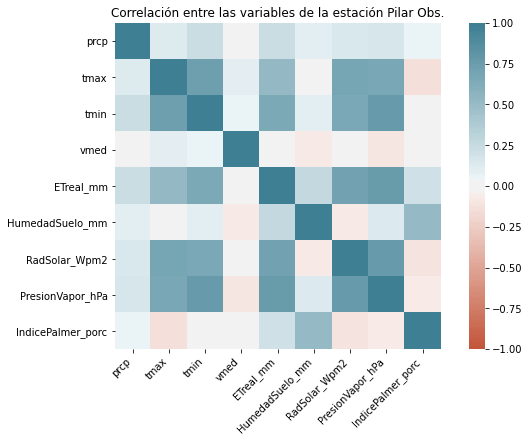

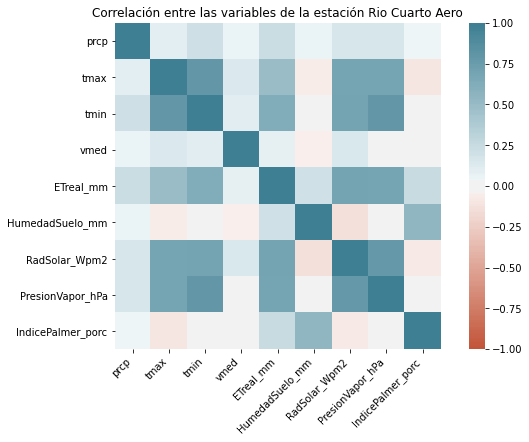

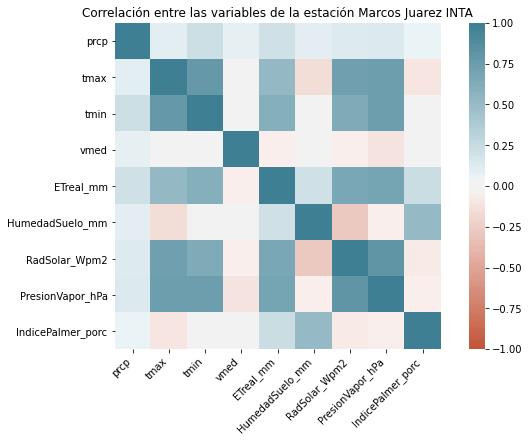

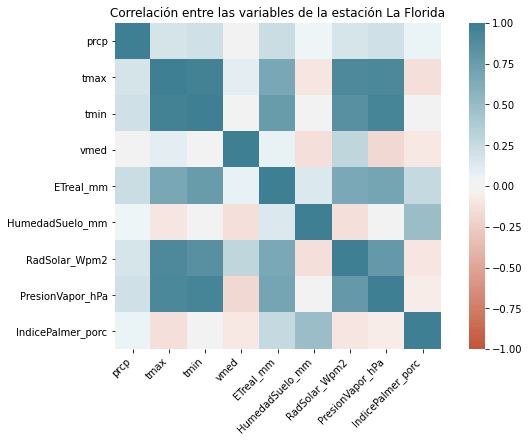

In [ ]:
# Comparacion de las variables
filled_dataset = merged_dataset.copy()


correlation_matrix = filled_dataset.groupby('omm_id')[['prcp', 'tmax', 'tmin', 'ETreal_mm', 'HumedadSuelo_mm', 'RadSolar_Wpm2', 'PresionVapor_hPa', 'IndicePalmer_porc']].corr()

for station in filled_dataset.nombre.unique():
    
    satation_data = filled_dataset[filled_dataset['nombre'] == station]

    plt.figure(figsize=(10,6))    
    corr = satation_data[['prcp', 'tmax', 'tmin', 'vmed', 'ETreal_mm', 'HumedadSuelo_mm', 'RadSolar_Wpm2', 'PresionVapor_hPa', 'IndicePalmer_porc']].corr()
    ax = sns.heatmap(
      corr, 
      vmin=-1, vmax=1, center=0,
      cmap=sns.diverging_palette(20, 220, n=200),
      square=True)
    
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
    plt.title('Correlación entre las variables de la estación %s' % (station))
    plt.show()



In [ ]:
### Correlación entre variables

La mayoría de las variables tienen algun tipo de correlación, ya sea positiva o negativa. El Indice de Palmer que es, basicamente un balance hidrológico de una sola capa de suelo mostró correlaciones con casi todas las variables siendo especialmente significativa para la precipitación, humedad edáfica y la evapotranspiración real. Valores positivos del índice indican condiciones húmedas y valores negativos, de sequías.  Tambien fue interesante la relación negativa entre la temperatura máxima, viento, radiación y presión de vapor. Estas cuatro variables están muy relacionadas a la demanda atmosférica de agua por lo que mayor valores de estas variables implicarían menores valores del índice de Palmer (Sequía). 

SyntaxError: ignored

#### Correlación de PMDA con las demás variables

In [ ]:
filled_dataset['hydro_year'] = filled_dataset['fecha'].apply(lambda fecha: get_hydro_year(fecha))

# Calculo de valores acumulados de lluvia acumulada anual y maxima
yearly_correlation = filled_dataset.groupby(['hydro_year', 'omm_id', 'nombre']).agg(    
    PTA =('prcp', sum),    
    PMDA =('prcp', max),    
    tmax = ('tmax', "mean"),
    tmin = ('tmin', "mean"),
    vmed = ('vmed', "mean"),
    ETreal_mm = ('ETreal_mm', sum),
    HumedadSuelo_mm = ('HumedadSuelo_mm', sum),
    IndicePalmer_porc = ('IndicePalmer_porc', "mean")
    )
yearly_correlation.reset_index(inplace=True)


In [ ]:
for station in yearly_correlation.nombre.unique():
    
    station_data = yearly_correlation[yearly_correlation['nombre'] == station]
    station_data.drop(['hydro_year', 'omm_id', 'PTA'], axis = 1, inplace=True)

    corr_matrix = station_data.corr()
    print('\nCorrelación de variables para la estacion :', station)
    print(corr_matrix["PMDA"].sort_values(ascending=False))




Correlación de variables para la estacion : La Florida
PMDA                 1.000000
IndicePalmer_porc    0.158036
HumedadSuelo_mm      0.086272
ETreal_mm            0.019565
tmin                -0.071848
vmed                -0.136609
tmax                -0.137156
Name: PMDA, dtype: float64

Correlación de variables para la estacion : Pilar Obs.
PMDA                 1.000000
ETreal_mm            0.398333
HumedadSuelo_mm      0.310864
vmed                 0.192572
IndicePalmer_porc    0.177993
tmin                 0.047580
tmax                -0.321161
Name: PMDA, dtype: float64

Correlación de variables para la estacion : Rio Cuarto Aero
PMDA                 1.000000
ETreal_mm            0.249559
IndicePalmer_porc    0.184200
HumedadSuelo_mm      0.137173
tmin                 0.050807
vmed                 0.035351
tmax                -0.163728
Name: PMDA, dtype: float64

Correlación de variables para la estacion : Marcos Juarez INTA
PMDA                 1.000000
HumedadSuelo_mm      0

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Se observa que en términos generales hay una relacion positiva entre la PMDA y le evapotranspiración Real y la humedad de suelo y negativa con la temperatura máxzima. Cabe mencionar que la Evapotranspiración Real y la Humedad de suelo están fuertemente relacionados por lo que la colinealidsad puede llevar a conclusiones erróneas. 

## 4. Análisis y curación de Índices Climáticos en Excel

### 4.1 Leer el archivo "indices_clim.xlsx" y evaluar la cantidad de valores faltantes.

In [4]:
# Leer datos de indices climaticos
dataset_indices = pd.read_excel('https://raw.githubusercontent.com/Rondamon/2020_Mentoria_LluviasExtremas/master/dataset/indices_clim.xlsx')

dataset_indices.isnull().sum()



date                                          0
SOI                                          43
PNA                                          31
NAO                                          31
Jones NAO                                   233
GBI                                          67
EPO                                         101
TNH                                         685
ONI                                          32
NTA                                          35
CAR                                          35
MEI v2                                      379
BEST                                          7
Nino 3                                       31
Nino 1+2                                     31
Nino 3+4                                     31
Nino 4                                       31
Pacific Warm Pool                           145
Tropical Pacific SST EOF                    145
TNA                                           7
TSA                                     

### 4.2 Convertir los datos faltantes en NaN.

In [5]:
dataset_indices.replace(r'^\s*$', np.nan, regex=True, inplace=True)
dataset_indices[dataset_indices.isnull()] = np.nan

### 4.3 Hacer matrices de correlación entre los diferentes índices climáticos y las series de Precipitaciones Máximas Diarias Anuales (PMDA) en las diferentes estaciones. Hacer esto para cada año hidrológico.

In [6]:
def fix_date(df):
    df['year'] = df['date'].astype(int).astype(str)

    df_aux = df.copy()
    i = 1
    for index, row in df_aux.iterrows():
        df.loc[index, 'fix_date'] = datetime.datetime.strptime(f'{row["year"]}/{i}/1', '%Y/%m/%d')
        i += 1
        if i > 12:
            i = 1
    return df

In [10]:
dataset_indices_corregido_fecha = fix_date(dataset_indices)
dataset_indices_with_hydro_year = dataset_indices_corregido_fecha.copy()
dataset_indices_with_hydro_year.reset_index(inplace=True)
dataset_indices_with_hydro_year['hydro_year'] = dataset_indices_with_hydro_year['fix_date'].apply(lambda fecha: get_hydro_year(fecha))



In [11]:
dataset_indices_with_hydro_year.head()

index         date  SOI  PNA  ...  MDR SST Anomalies  year   fix_date  hydro_year
0      0  1948.000000  NaN  NaN  ...               0.19  1948 1948-01-01        1947
1      1  1948.083333  NaN  NaN  ...               0.04  1948 1948-02-01        1947
2      2  1948.166667  NaN  NaN  ...               0.23  1948 1948-03-01        1947
3      3  1948.250000  NaN  NaN  ...              -0.06  1948 1948-04-01        1947
4      4  1948.333333  NaN  NaN  ...               0.03  1948 1948-05-01        1947

[5 rows x 49 columns]

In [ ]:
dataset_indices_with_hydro_year

In [12]:
dataset_indices_with_hydro_year.to_csv('indices_climaticos_corregidos.csv')

In [ ]:
prcp_metrics = yearly_correlation.copy()[['omm_id', 'nombre', 'hydro_year', 'PMDA', 'PTA']]
prcp_metrics.head()

omm_id      nombre  hydro_year   PMDA     PTA
0       1  La Florida        1957  159.0   441.3
1       1  La Florida        1958   85.0   632.1
2       1  La Florida        1959   72.0   724.7
3       1  La Florida        1960   97.0  1085.9
4   87349  Pilar Obs.        1960   48.4   462.1

In [ ]:
mean_indices_hydro_year = dataset_indices_with_hydro_year.groupby(['hydro_year']).mean().reset_index()

In [ ]:
# Función para agregar etqieutas al gráfico
def add_value_labels(ax, spacing=5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      


### Correlación para el año completo de los índices climáticos

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


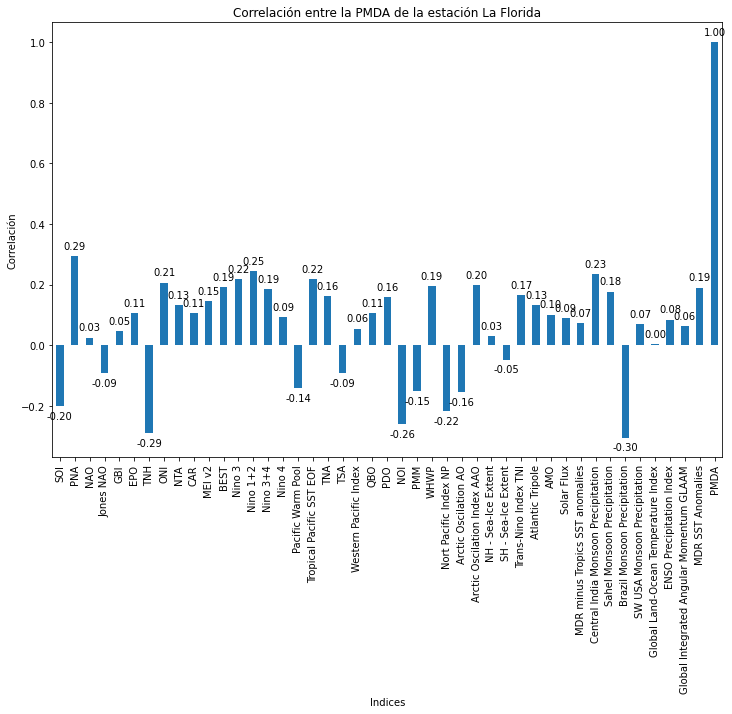

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


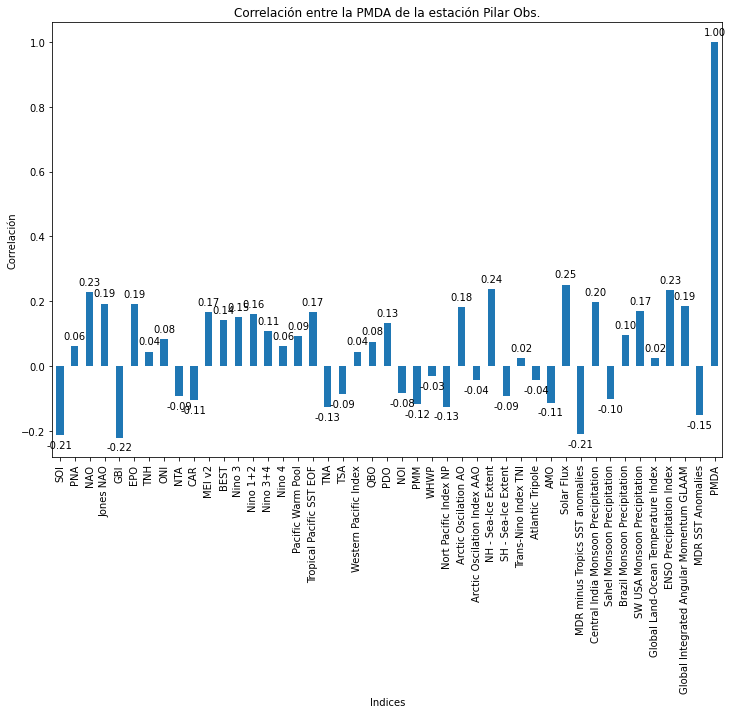

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


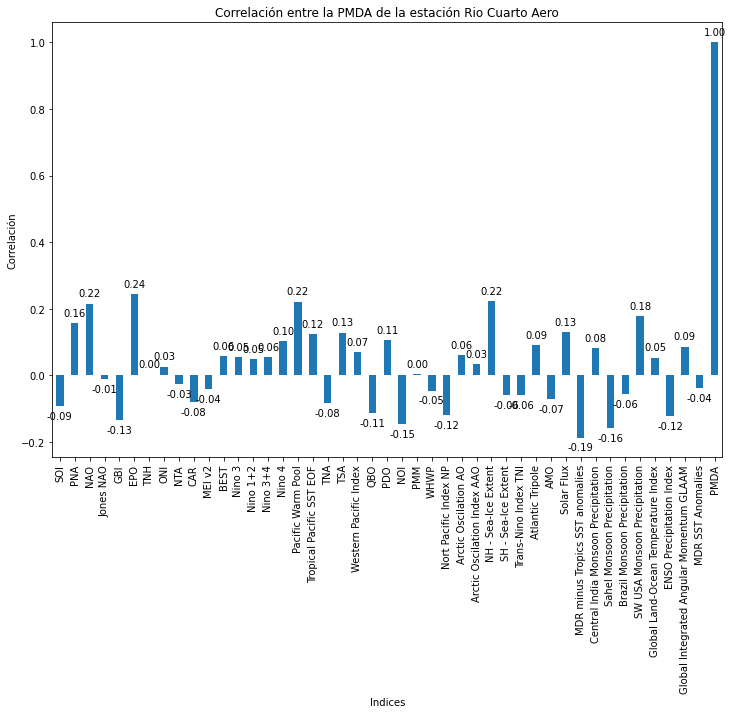

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


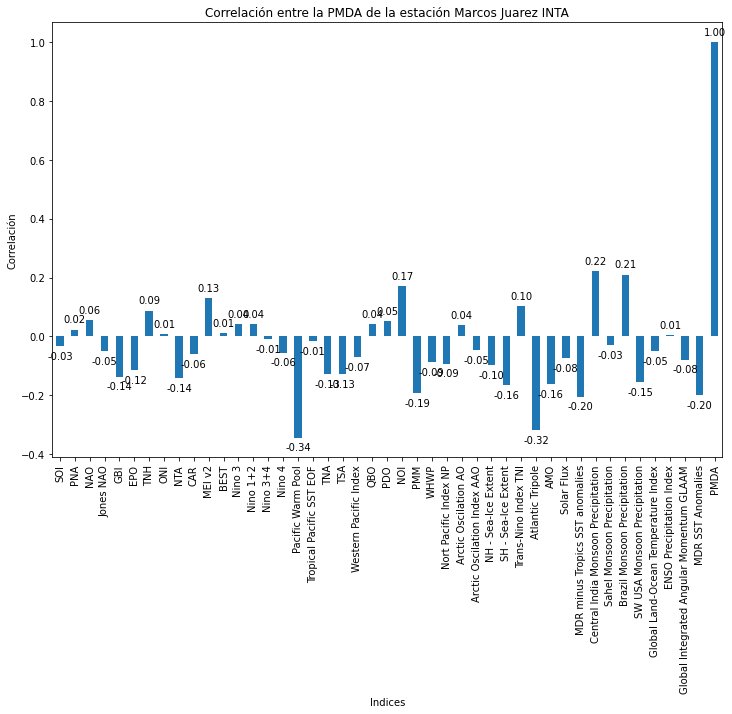

In [ ]:
# crear las matrices de correlacion entre pmda_df y df4_groupby_hy_max
correlation_rainfall = pd.merge(mean_indices_hydro_year, prcp_metrics, on = ['hydro_year'])
correlation_rainfall.drop(['hydro_year', 'index', 'date', 'omm_id'], axis = 1, inplace=True)


for station in correlation_rainfall.nombre.unique():
    
    station_data = correlation_rainfall[correlation_rainfall['nombre'] == station] 
    station_data.drop(['PTA'], axis = 1, inplace=True)

    corr_matrix = station_data.corr()
    correlacion = corr_matrix["PMDA"]
    correlacion = correlacion.to_frame()
    correlacion['indices_climaticos'] = correlacion.index
    
    # Plot the figure
    plt.figure(figsize=(12, 8))
    ax = correlacion.PMDA.plot(kind='bar')
    plt.title('Correlación entre la PMDA de la estación %s' % (station))
    ax.set_xlabel('Indices')
    ax.set_ylabel('Correlación')
    ax.set_xticklabels(correlacion.indices_climaticos)
    # Agregar etiquetas
    add_value_labels(ax)
    plt.show()

#correlation_matrix = correlation_pmda.groupby('omm_id').corr()['PMDA'][:-1]

#correlation_matrix


Hay una importante variación entre la correlación entre la PMDA y los índices climáticos para las distintas estaciones

### Correlación para los valores de los índices correspondientes a octubre, noviembre y diciembre

In [ ]:
trimester = [10, 11, 12]
dataset_indices_with_hydro_year['mes'] = dataset_indices_with_hydro_year.loc[:,'fix_date'].dt.month
dataset_indices_with_hydro_year_trimester = dataset_indices_with_hydro_year[dataset_indices_with_hydro_year.mes.isin(trimester)]

mean_indices_hydro_year_trimester = dataset_indices_with_hydro_year_trimester.groupby(['hydro_year']).mean().reset_index()


Se calcularon los valores de los índices pero agregados para los meses de ocutbre, noviembre y diciembre que es el moomento en que los patrones climáticos condiciones las condiciones estivales en la región. En estos meses es donde ocurren los mayores monton de precipitación y a priori mayor sensibilidad tendrían los índices climáticos para pronosticos las condiciones de humedad en la zona. 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


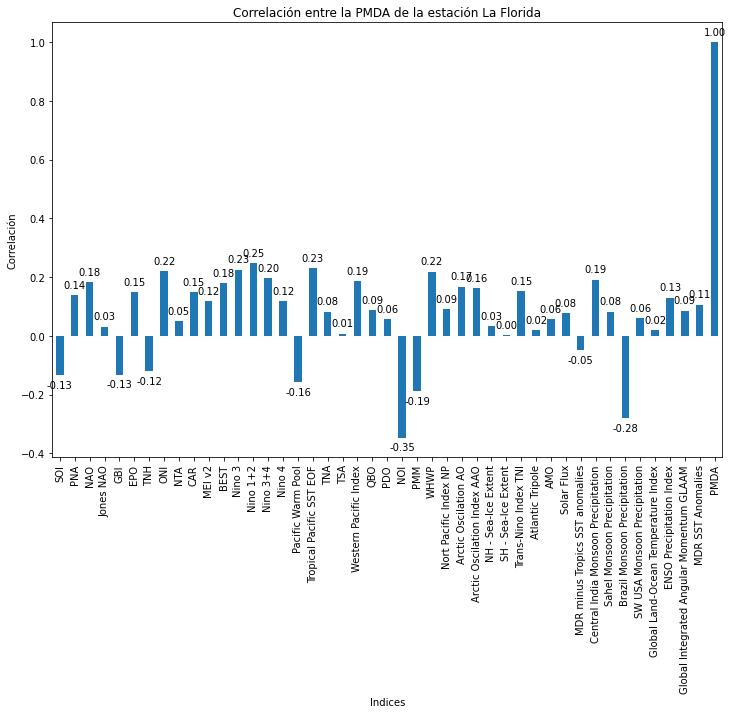

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


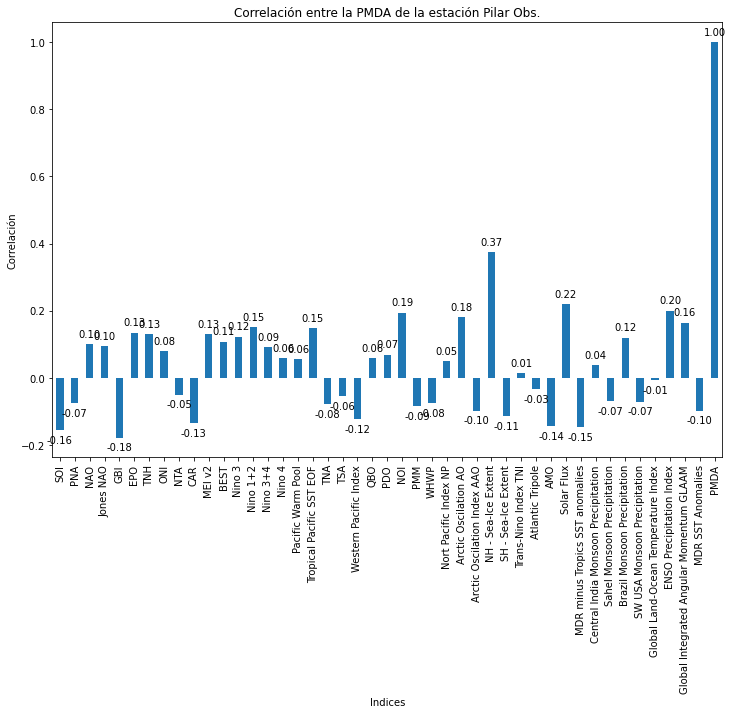

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


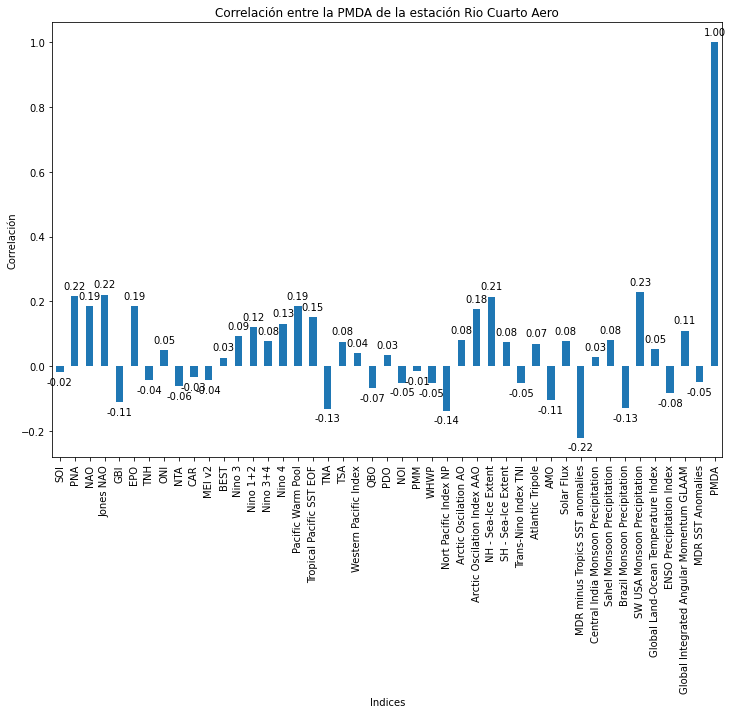

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


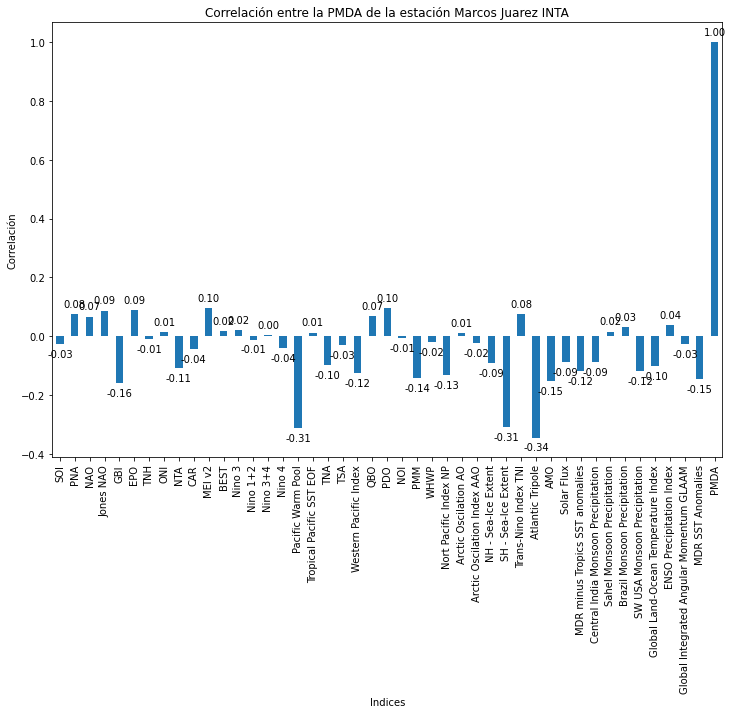

In [ ]:
# crear las matrices de correlacion entre pmda_df y df4_groupby_hy_max
correlation_rainfall = pd.merge(mean_indices_hydro_year_trimester, prcp_metrics, on = ['hydro_year'])
correlation_rainfall.drop(['hydro_year', 'index', 'date', 'mes', 'omm_id'], axis = 1, inplace=True)


for station in correlation_rainfall.nombre.unique():
    
    station_data = correlation_rainfall[correlation_rainfall['nombre'] == station]
    station_data.drop(['PTA'], axis = 1, inplace=True)


    corr_matrix = station_data.corr()
    
    correlacion = corr_matrix["PMDA"]
    
    correlacion = correlacion.to_frame()
    correlacion['indices_climaticos'] = correlacion.index
    
    # Plot the figure.
    plt.figure(figsize=(12, 8))
    ax = correlacion.PMDA.plot(kind='bar')
    plt.title('Correlación entre la PMDA de la estación %s' % (station))
    ax.set_xlabel('Indices')
    ax.set_ylabel('Correlación')
    ax.set_xticklabels(correlacion.indices_climaticos)

    # Call the function above. All the magic happens there.
    add_value_labels(ax)
    plt.show()



Hay una importante variación entre la correlación entre la PMDA y los índices climáticos para las distintas estaciones

##### Evaluación de la correlación con el caudal ## 4.4.	Repetir lo mismo para la serie de caudales máximos diarios anuales (QMDA) en Pueblo Andino.

In [ ]:
dataset_caudal = Datos.copy()
dataset_caudal.reset_index(inplace = True)
dataset_caudal = dataset_caudal[['fecha', 'omm_id', 'caudal']].dropna()
dataset_caudal.head()

fecha  omm_id   caudal
237130 1980-04-01       2   58.724
237131 1980-04-02       2   58.724
237132 1980-04-03       2   58.724
237133 1980-04-05       2   80.629
237134 1980-04-07       2  169.055

In [ ]:
dataset_caudal['hydro_year'] = dataset_caudal['fecha'].apply(lambda fecha: get_hydro_year(fecha))
dataset_caudal = pd.merge(dataset_caudal, stations[['omm_id', 'nombre']], on = 'omm_id', how = 'left')

dataset_caudal_hydro_year = dataset_caudal.groupby(['hydro_year', 'omm_id', 'nombre']).max().reset_index()
dataset_caudal_hydro_year.head()

hydro_year  omm_id         nombre      fecha   caudal
0        1979       2  Pueblo Andino 1980-05-30  219.078
1        1980       2  Pueblo Andino 1981-05-27  371.443
2        1981       2  Pueblo Andino 1982-05-31  754.226
3        1982       2  Pueblo Andino 1983-05-31  158.851
4        1983       2  Pueblo Andino 1984-05-31  974.845

In [ ]:
# crear las matrices de correlacion entre pmda_df y df4_groupby_hy_max
correlation_flow = pd.merge(mean_indices_hydro_year, dataset_caudal_hydro_year, on = ['hydro_year'])
correlation_flow.drop(['hydro_year', 'index', 'date', 'omm_id'], axis = 1, inplace=True)

correlation_flow.head()

SOI       PNA       NAO  ...         nombre      fecha   caudal
0  0.050000  0.343333  0.323333  ...  Pueblo Andino 1980-05-30  219.078
1 -0.141667  0.365833 -0.385000  ...  Pueblo Andino 1981-05-27  371.443
2  0.708333 -0.871667 -0.244167  ...  Pueblo Andino 1982-05-31  754.226
3 -3.091667  0.680000  0.378333  ...  Pueblo Andino 1983-05-31  158.851
4  0.283333  0.636667  0.405833  ...  Pueblo Andino 1984-05-31  974.845

[5 rows x 47 columns]

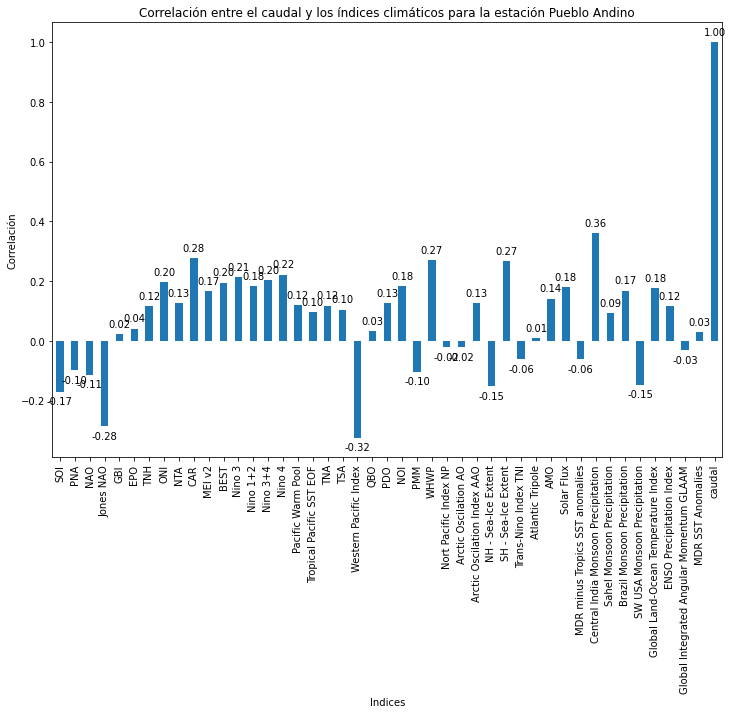

In [ ]:
for station in correlation_flow.nombre.unique():
    
    station_data = correlation_flow[correlation_flow['nombre'] == station]

    corr_matrix = station_data.corr()
    
    correlacion = corr_matrix["caudal"]
    
    correlacion = correlacion.to_frame()
    correlacion['indices_climaticos'] = correlacion.index
    
    # Plot the figure.
    plt.figure(figsize=(12, 8))
    ax = correlacion.caudal.plot(kind='bar')
    plt.title('Correlación entre el caudal y los índices climáticos para la estación %s' % (station))
    ax.set_xlabel('Indices')
    ax.set_ylabel('Correlación')
    ax.set_xticklabels(correlacion.indices_climaticos)

    # Call the function above. All the magic happens there.
    add_value_labels(ax)
    plt.show()



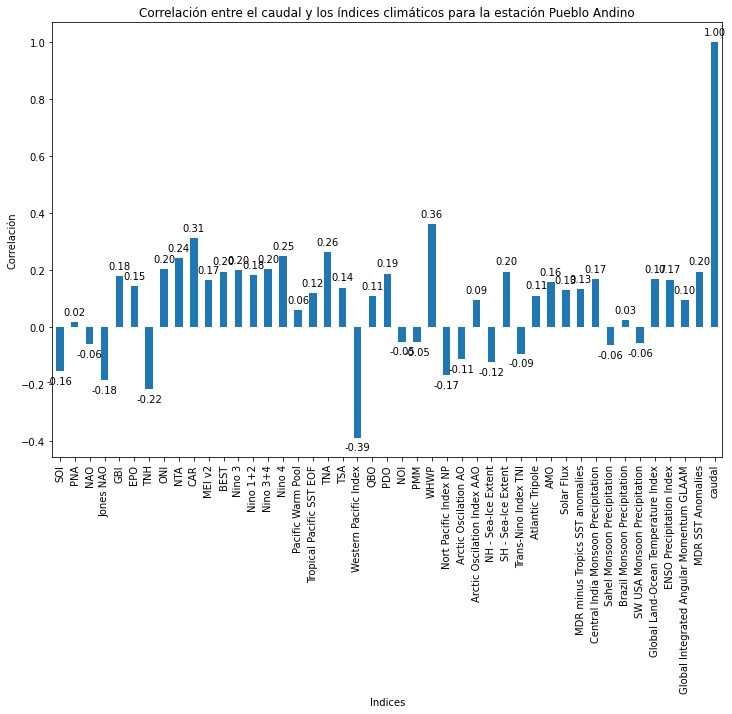

In [ ]:
# crear las matrices de correlacion entre pmda_df y df4_groupby_hy_max
correlation_flow = pd.merge(mean_indices_hydro_year_trimester, dataset_caudal_hydro_year, on = ['hydro_year'])
correlation_flow.drop(['hydro_year', 'index', 'date', 'mes', 'omm_id'], axis = 1, inplace=True)


for station in correlation_flow.nombre.unique():
    
    #station_data = correlation_rainfall[correlation_rainfall['nombre'] == station]

    corr_matrix = correlation_flow.corr()
    
    correlacion = corr_matrix["caudal"]
    
    correlacion = correlacion.to_frame()
    correlacion['indices_climaticos'] = correlacion.index
    
    # Plot the figure.
    plt.figure(figsize=(12, 8))
    ax = correlacion.caudal.plot(kind='bar')
    plt.title('Correlación entre el caudal y los índices climáticos para la estación %s' % (station))
    ax.set_xlabel('Indices')
    ax.set_ylabel('Correlación')
    ax.set_xticklabels(correlacion.indices_climaticos)

    # Call the function above. All the magic happens there.
    add_value_labels(ax)
    plt.show()



Llama la atención la escasa correlación entre las variables y los índices más comúnmente usados para la región como el ONI, SOI, Nino 3-4. 

Sería interesante discriminar entre las fases del ENSO ya que la señal de La Nñña en lios meses de Octubre, Noviembre y Diciembre es mucho más consistente que la de El Niño.  Es decir, los eventos Niña, en general, producen menores acumulados en los mencionados meses, perdiendo intensidad a medida que se transiciona hacia el verano. El Niño, en cambio, puede provocar mayor acumulados en dicho trimestre pero la señal es más dispar dado que se han detectado años secos, normales y humedos durante la fase Niño del ENSO. 